# Credit Card Fraud Detection Capstone Project - By Abhishek Palsodkar 

## Problem Statement: 
Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day.
Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.    
**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.** 


## Data Understanding :

### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set. 

In [4]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
#!pip install scikit-optimize

from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## EDA and Data Preparation

In [6]:
#To read csv File from locally stored file
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [8]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [9]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [10]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [13]:
#check if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

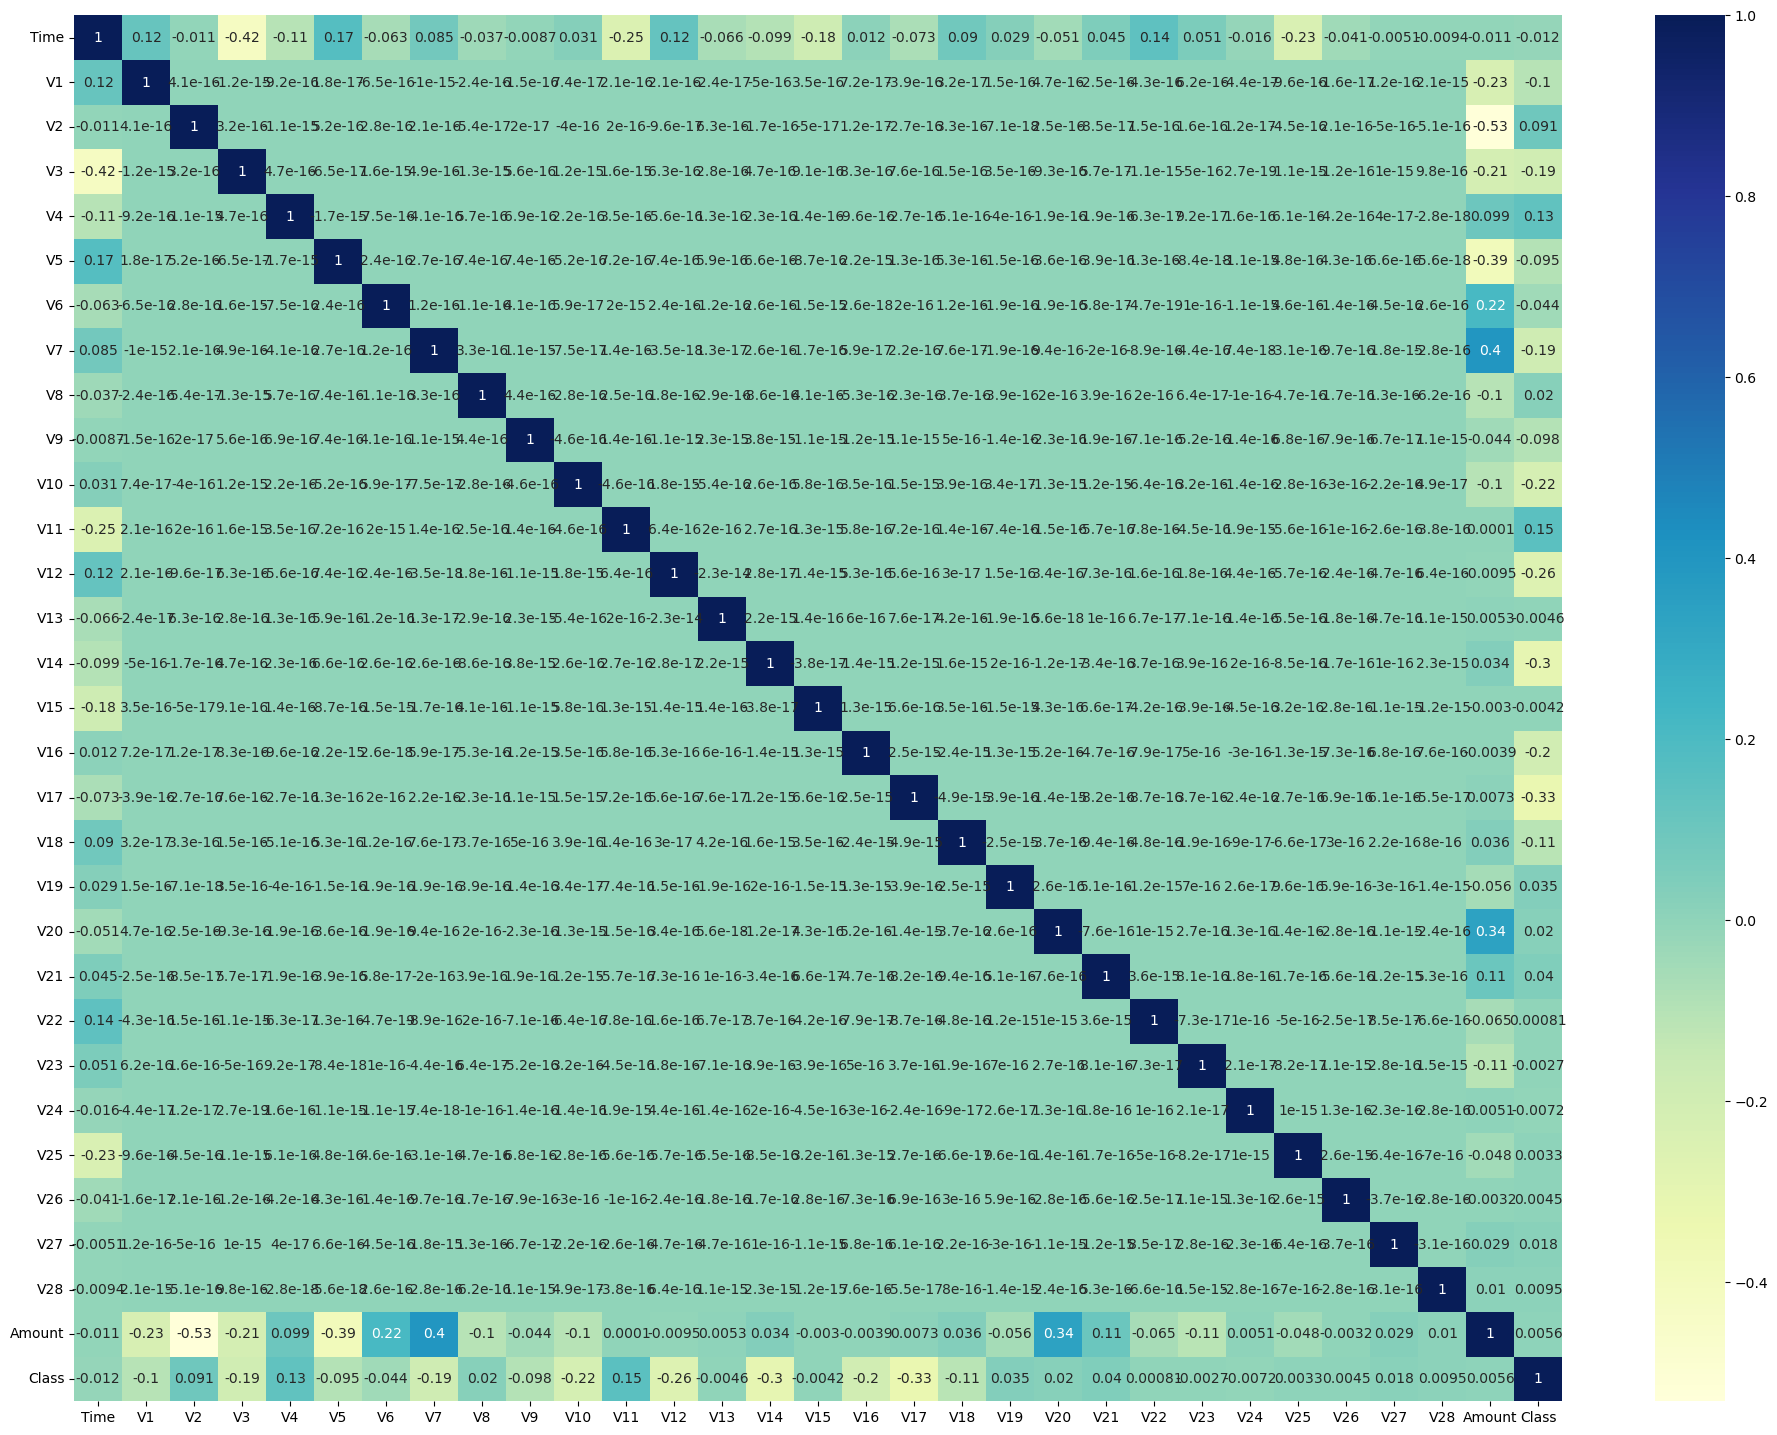

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


Here we will observe the distribution of our classes

In [18]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [19]:
print(classes,normal_share,fraud_share)

Class
0    284315
1       492
Name: count, dtype: int64 99.82725143693798 0.1727485630620034


In [20]:
! python --version

Python 3.12.4


In [21]:
sns.__version__

'0.13.2'

In [22]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

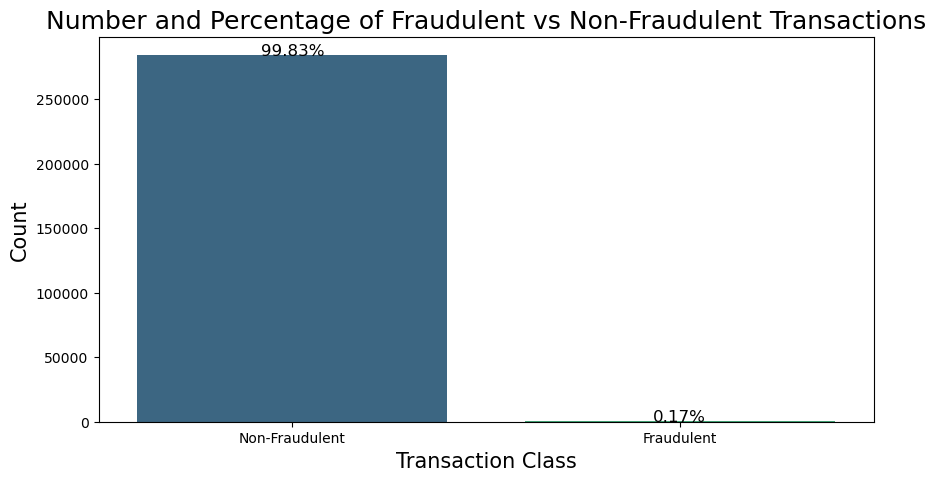

In [23]:
# Assuming df is your DataFrame and 'Class' is the column indicating fraud (1) or non-fraud (0)
counts = df['Class'].value_counts()  # This creates a Series with class counts
percentages = counts / counts.sum() * 100  # This calculates the percentage of each class

# Set up the plot
plt.figure(figsize=(10, 5))

# Plot the counts using seaborn's barplot, ensuring 'counts' is a Series with index and values
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Annotate with percentages
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 50, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.title("Number and Percentage of Fraudulent vs Non-Fraudulent Transactions", fontsize=18)
plt.xlabel("Transaction Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

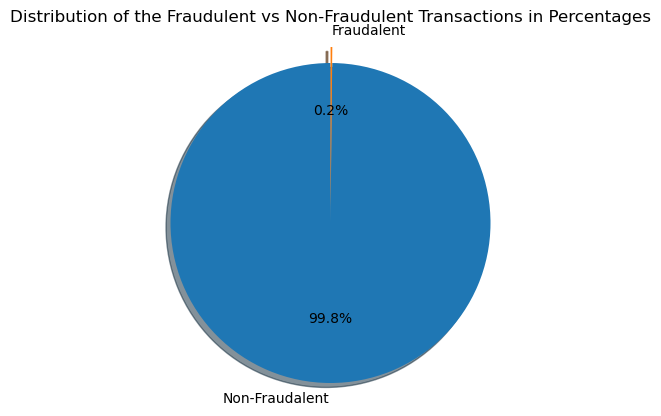

In [25]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Distribution of the Fraudulent vs Non-Fraudulent Transactions in Percentages')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [26]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


### So we have 492 fraudalent transactions out of 284807 total credit card transactions.

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example.
To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [28]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)



Text(0.5, 1.05, 'Time vs Class Distribution')

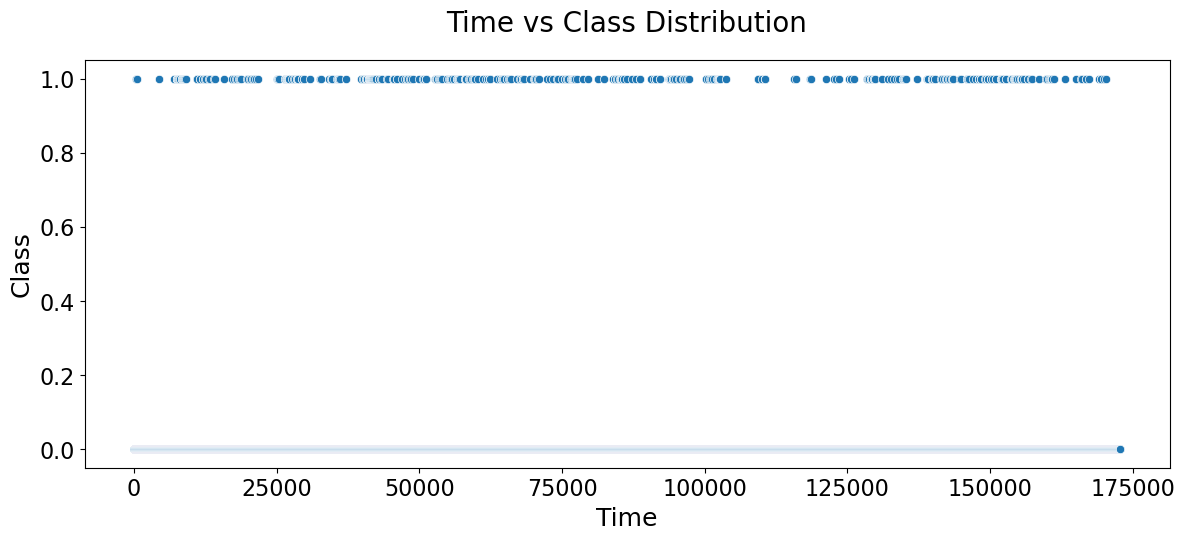

In [29]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)


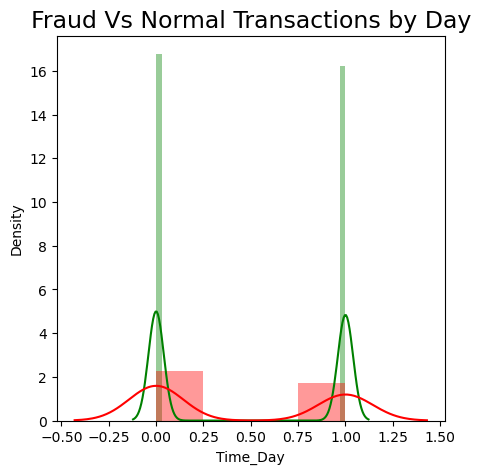

In [30]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

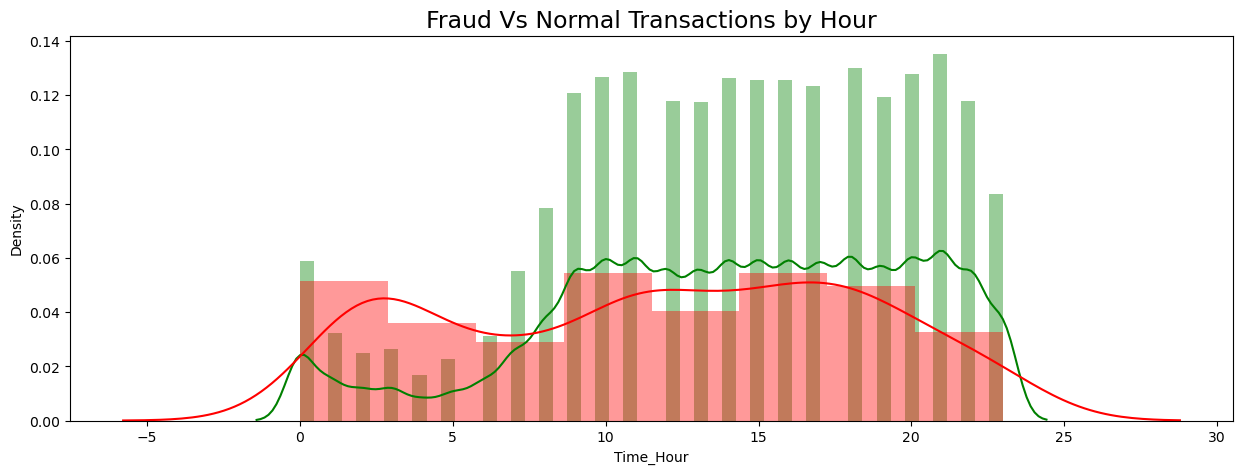

In [31]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

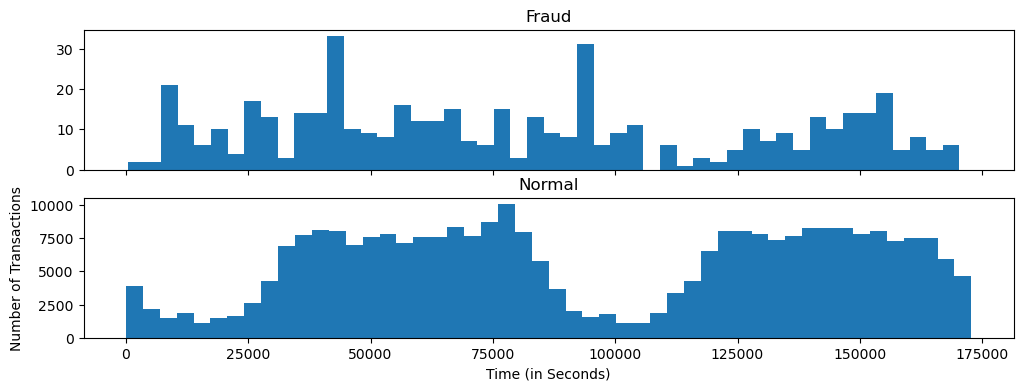

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [33]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [34]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

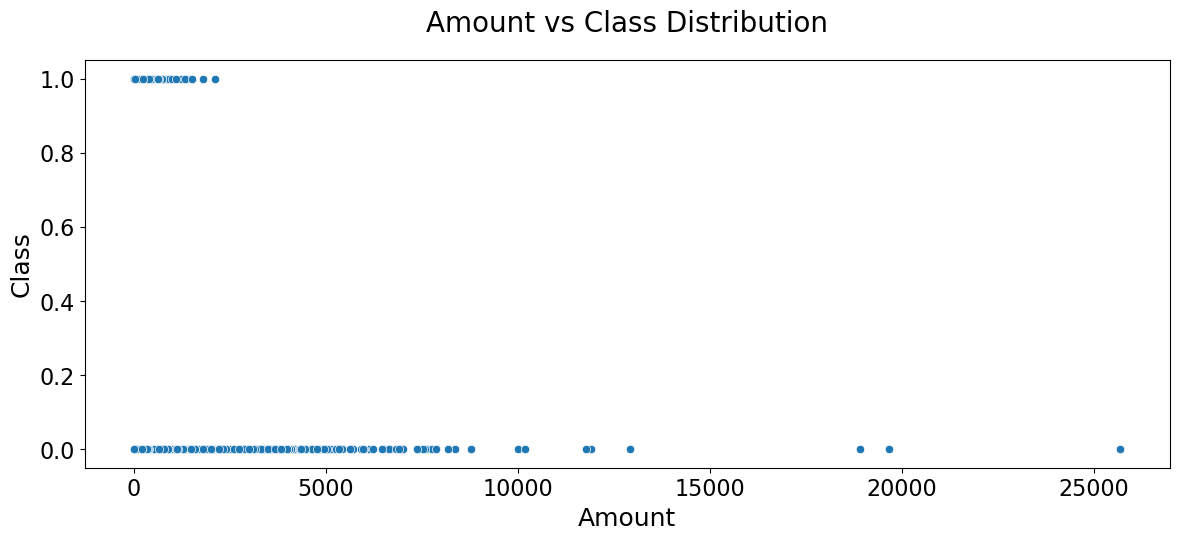

In [35]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


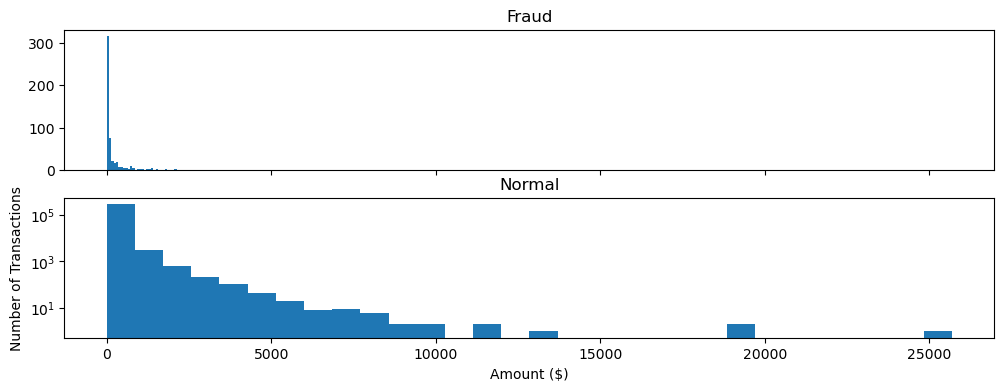

In [36]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [37]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

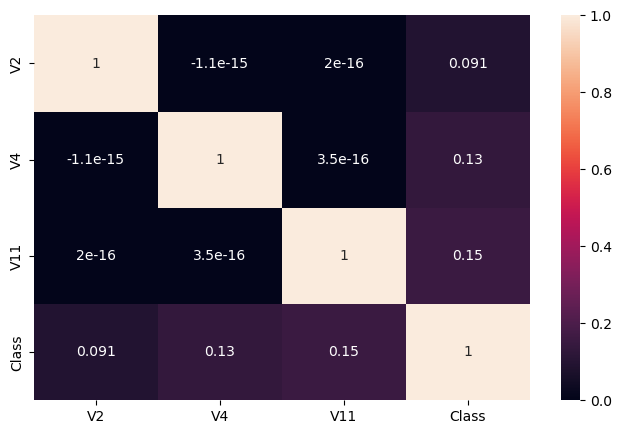

In [38]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

### Plotting the distribution of a variable

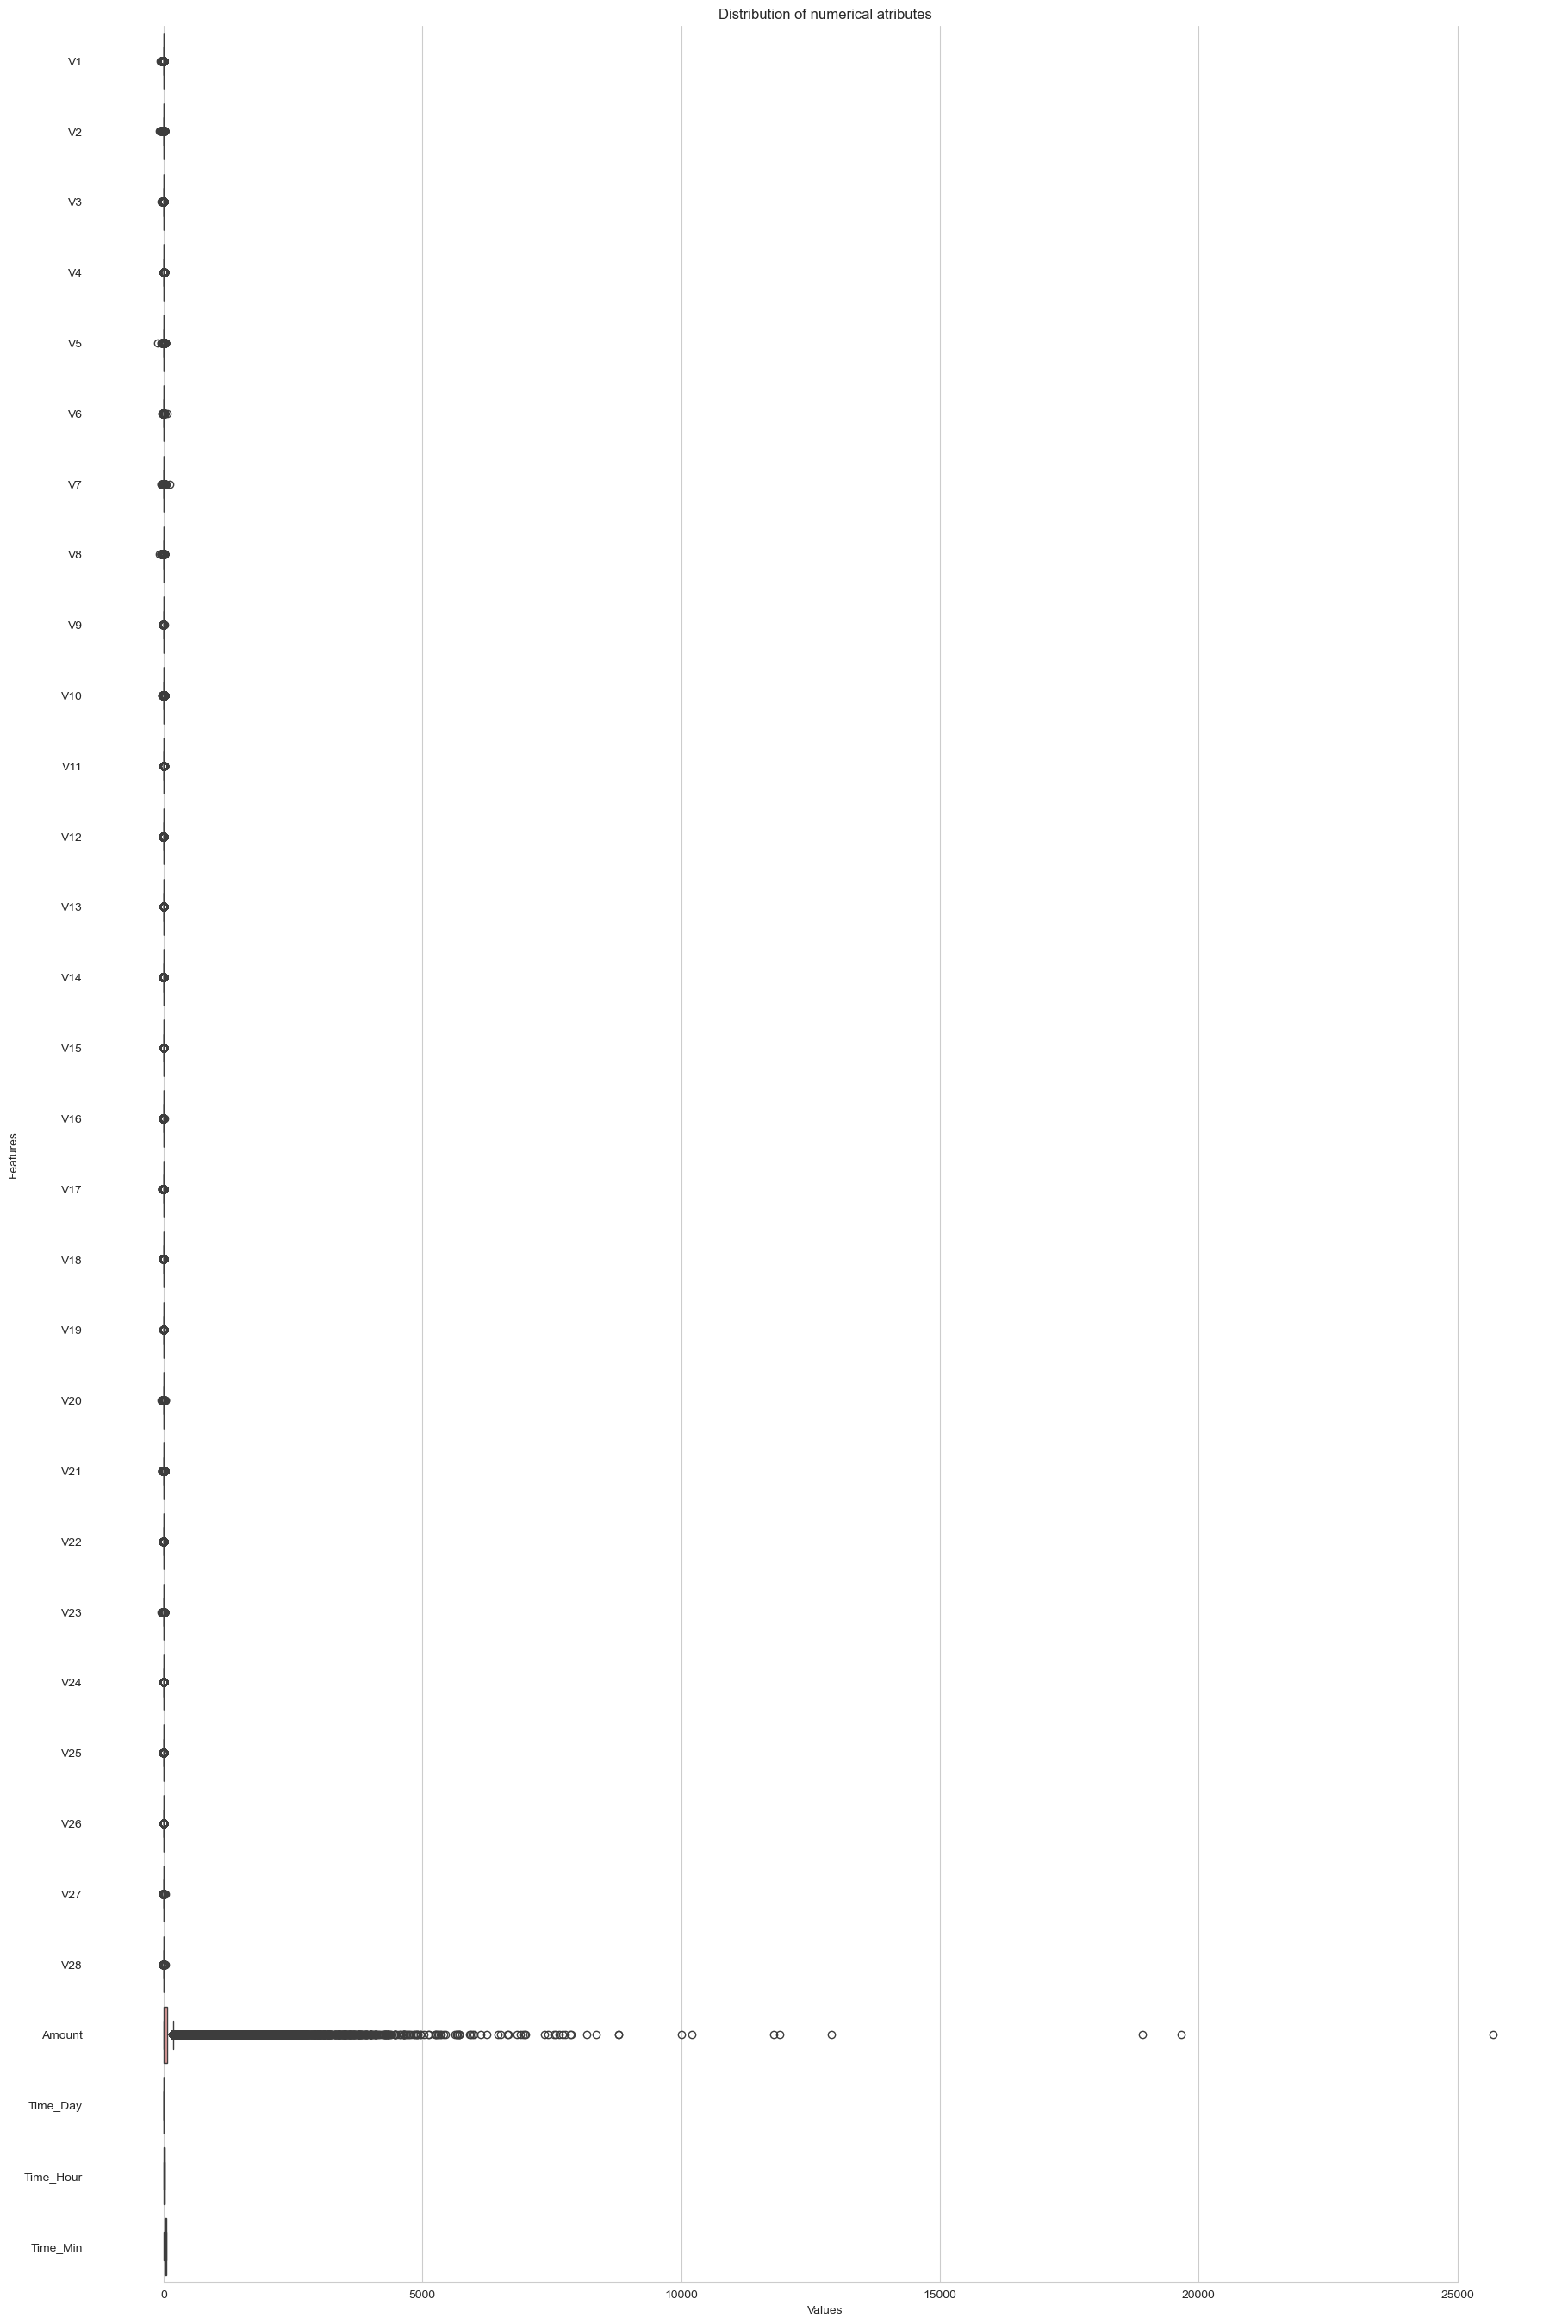

In [40]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [41]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

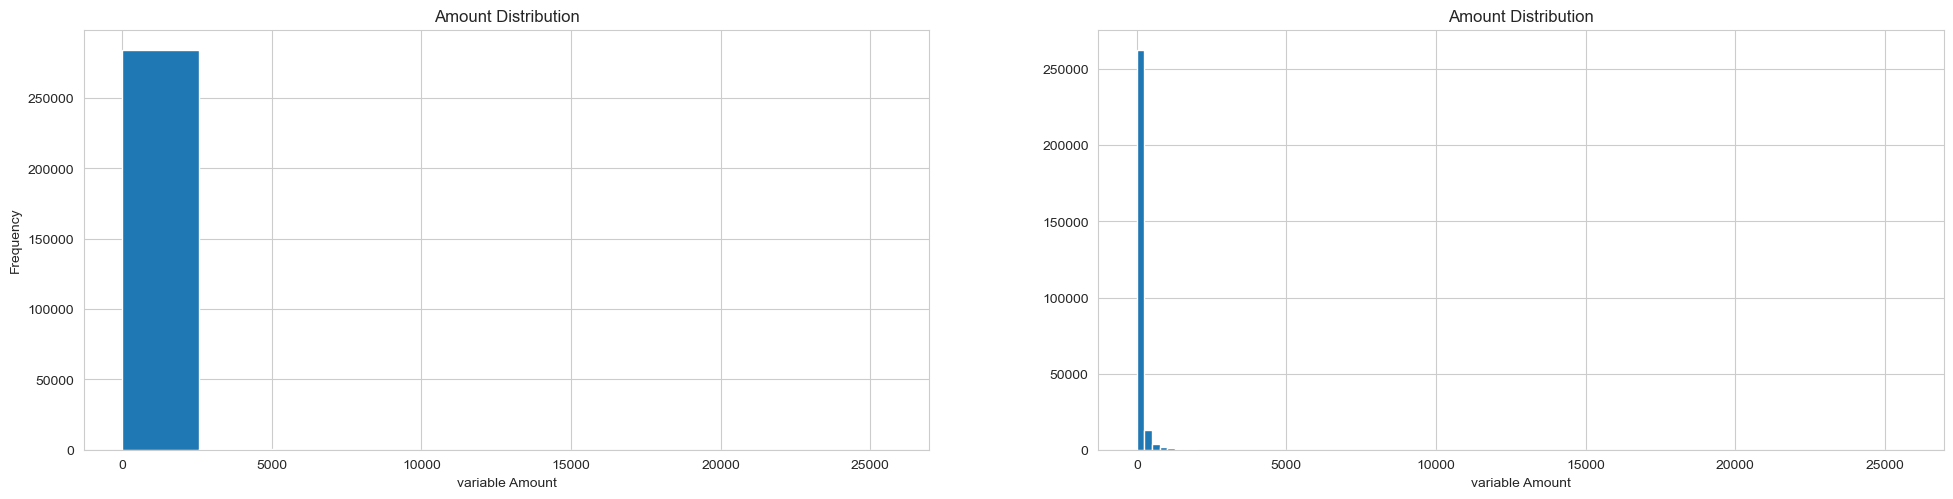

In [42]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()


### Splitting the data into train & test data

In [44]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [45]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [46]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [48]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [50]:
cols = list(X.columns.values)

In [51]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

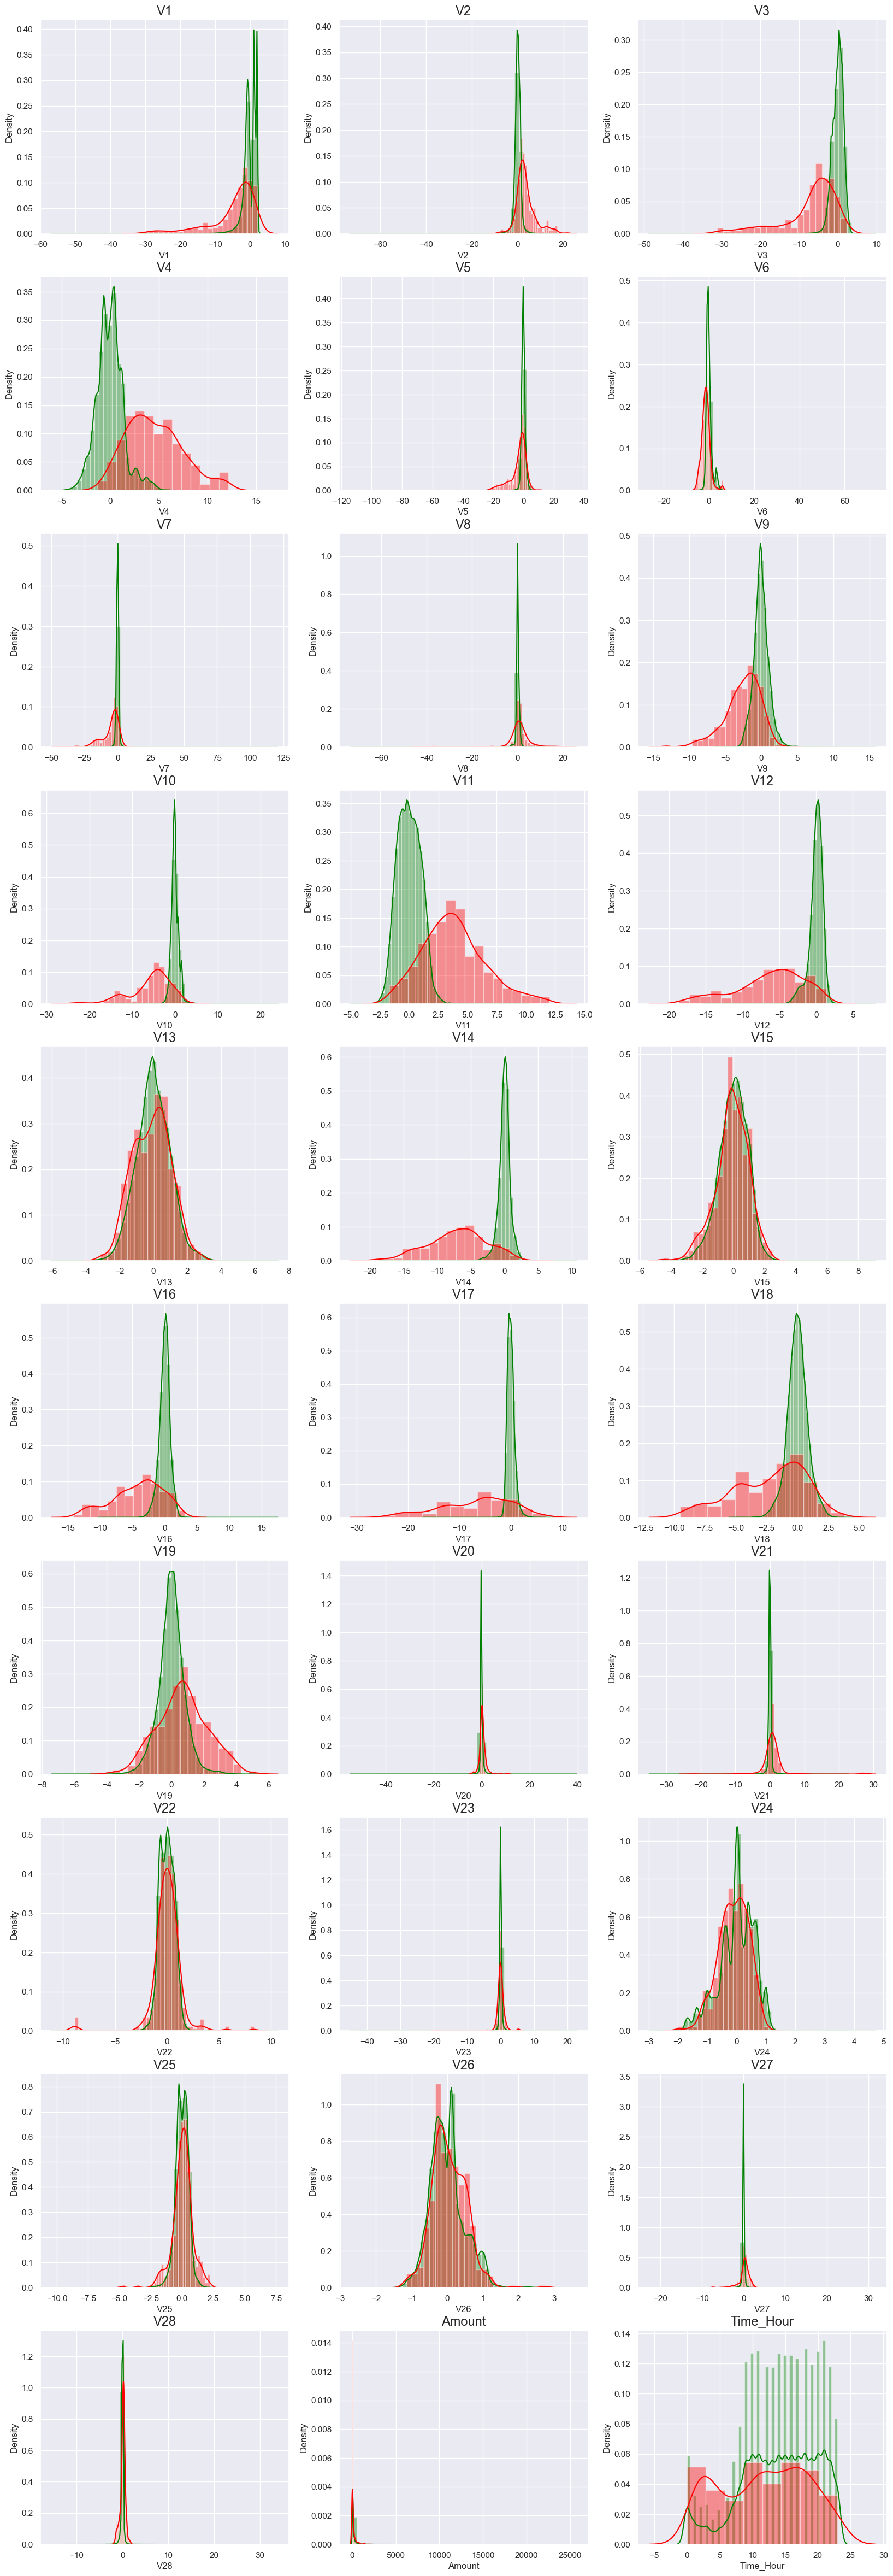

In [52]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()




#Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [55]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [56]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [57]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
#     df_Results = df_Results.concat(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold},index=[0])], ignore_index=True)
    
  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
#  df_Results = df_Results.concat(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold},index=[0])], ignore_index=True)
  
  return df_Results

In [58]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold},index=[0])], ignore_index=True)

  
#   df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results




In [59]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'': threshold},index=[0])], ignore_index=True)
#   df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [60]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
      
      df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy':test_score,'roc_value': tree_roc_value,'threshold': threshold},index=[0])], ignore_index=True)
  
#       df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
      


In [61]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy':RF_test_score,'roc_value':roc_value,'threshold': threshold},index=[0])], ignore_index=True)
  
#   df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [62]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy':XGB_test_score,'roc_value':XGB_roc_value,'threshold': threshold},index=[0])], ignore_index=True)
#   df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
  



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [64]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [65]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

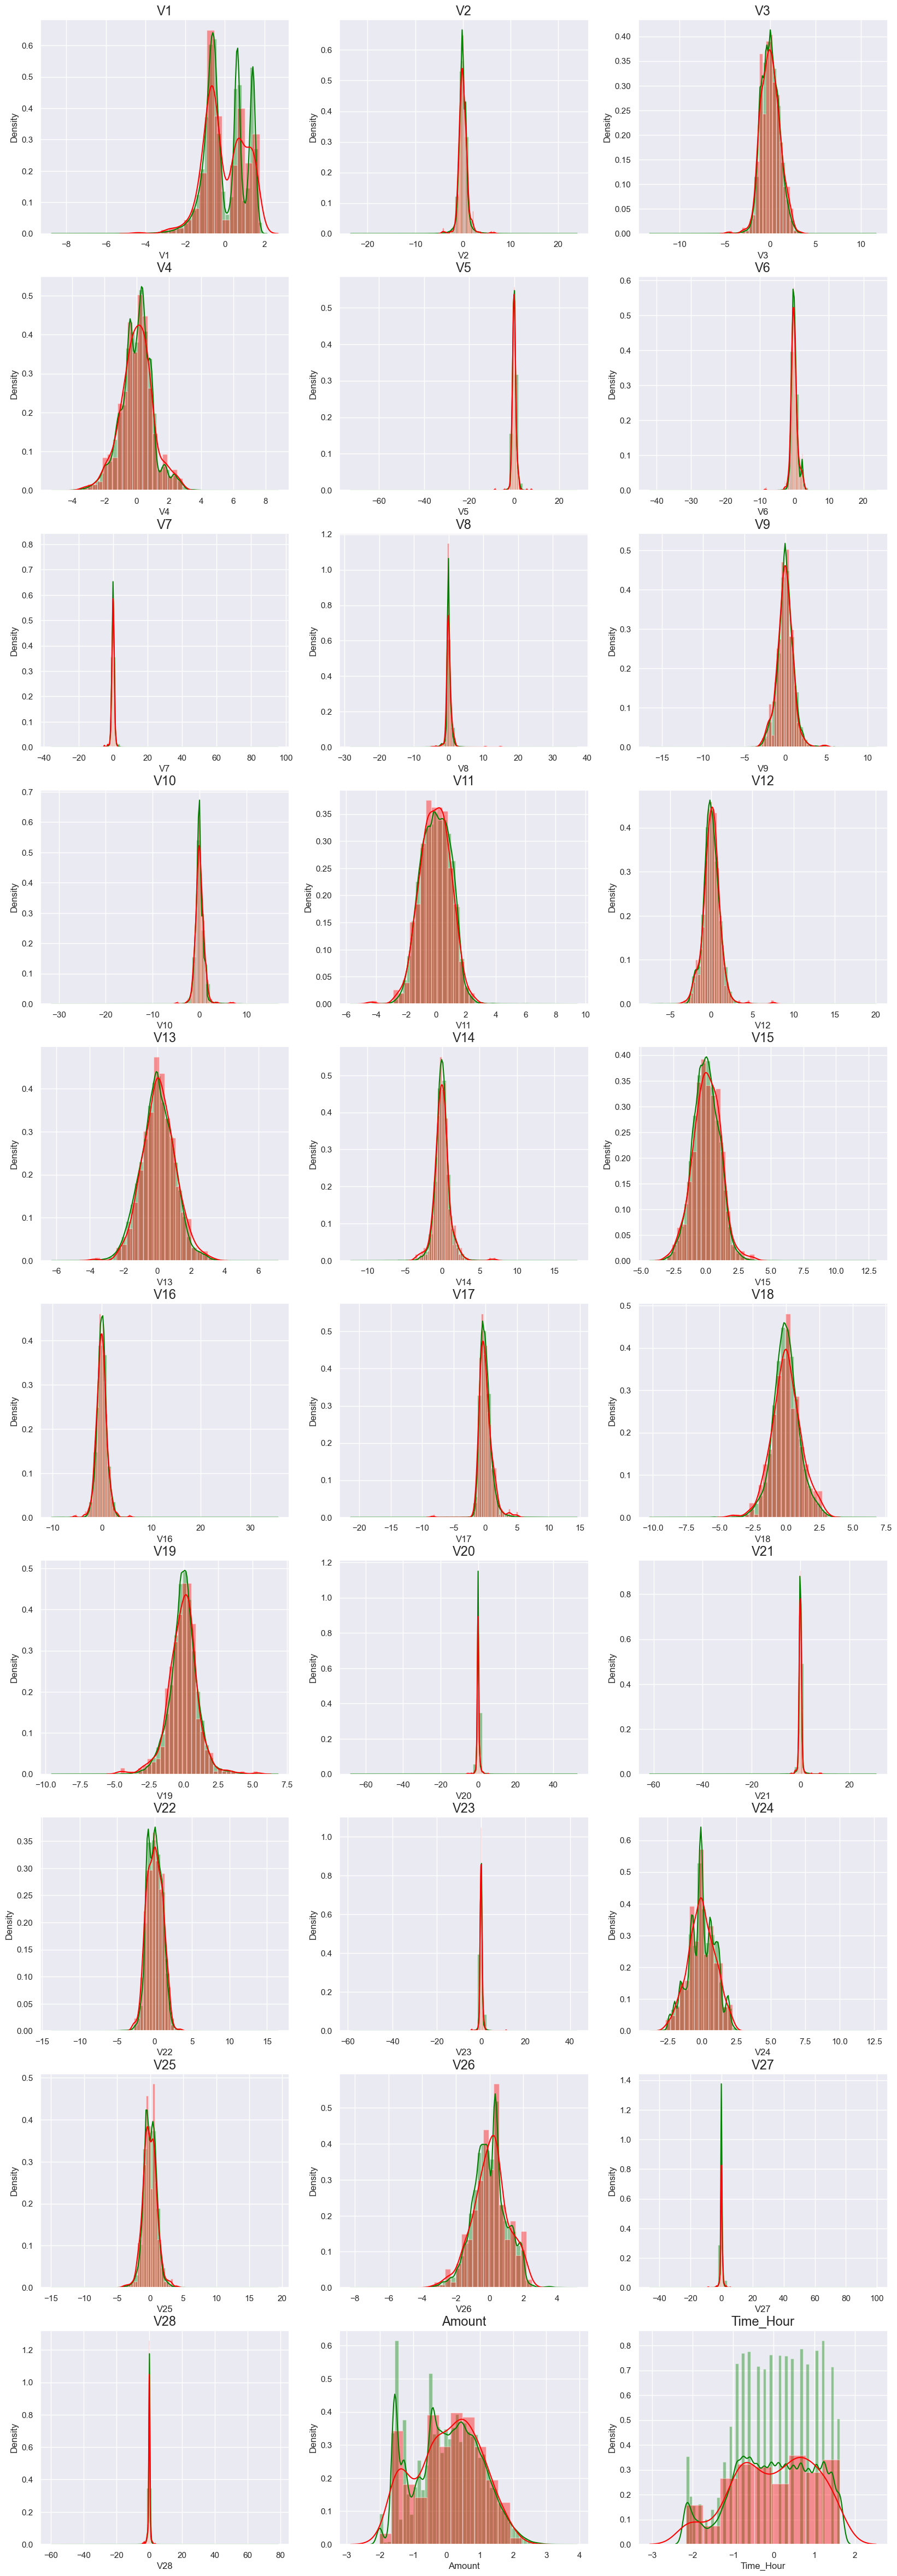

In [66]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()


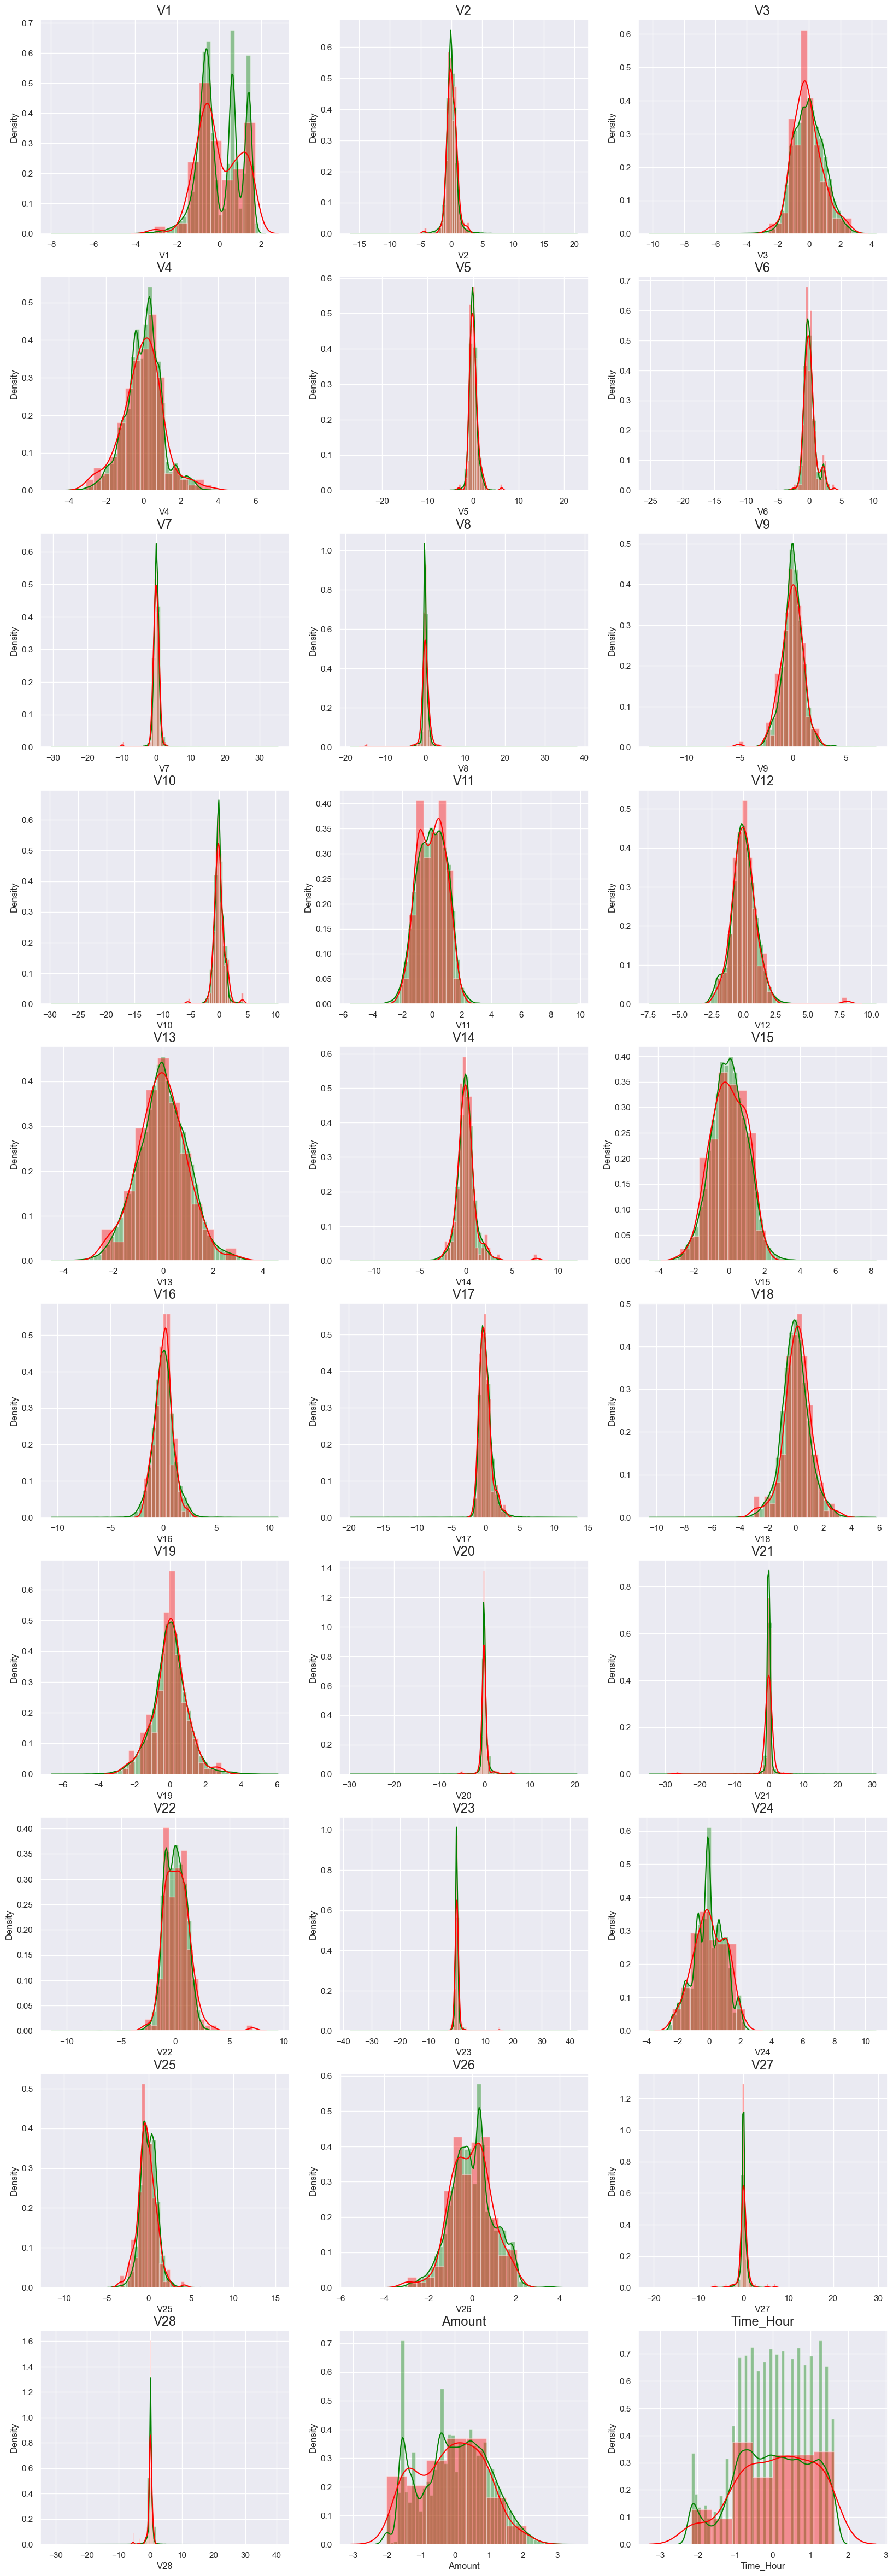

In [67]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [69]:
def is_numpy_c_ordered(X):
    return hasattr(X, "flags") and X.flags['C_CONTIGUOUS']


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

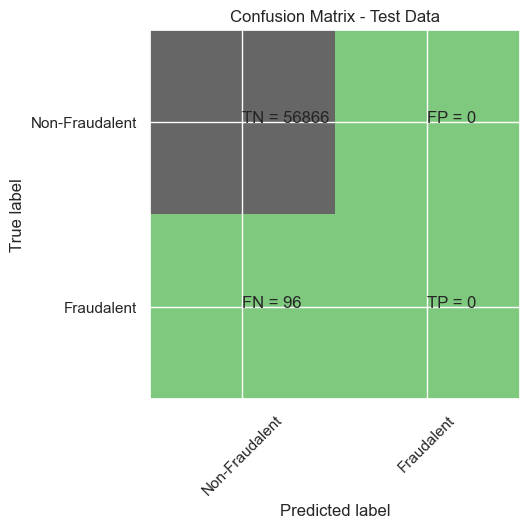

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


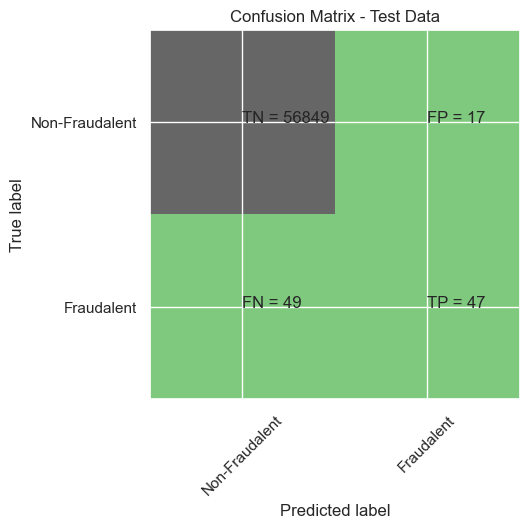

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


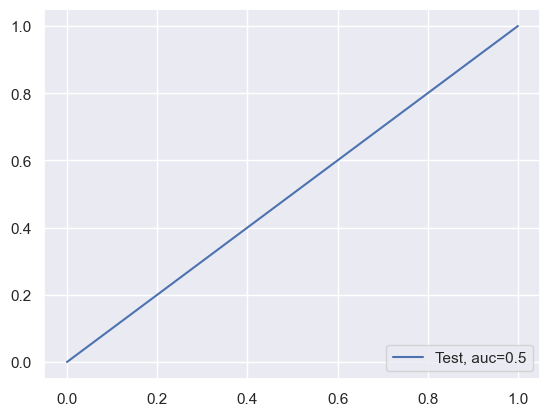

l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493844821432
ROC for the test dataset 96.4%


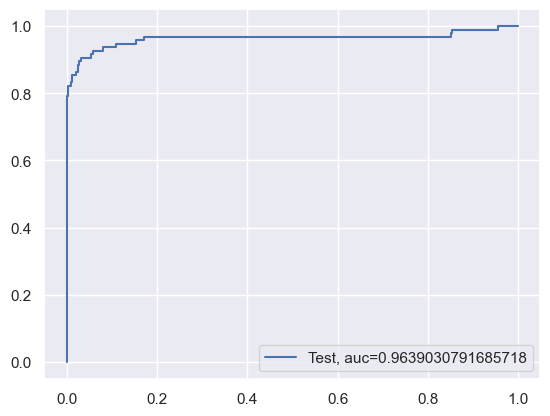

Time Taken by Model: --- 157.52903699874878 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


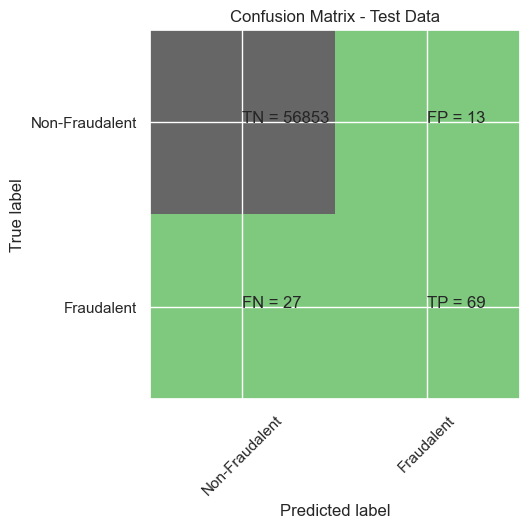

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


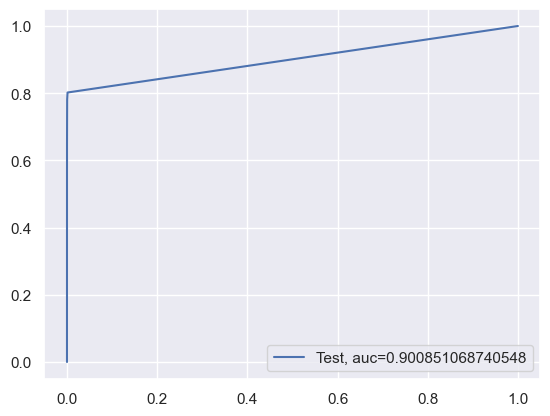

Time Taken by Model: --- 164.52062344551086 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


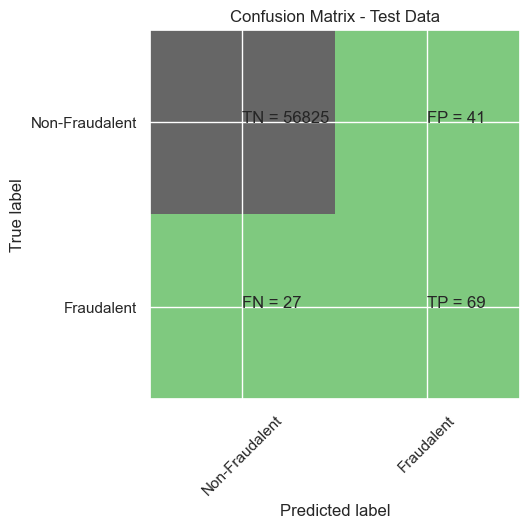

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


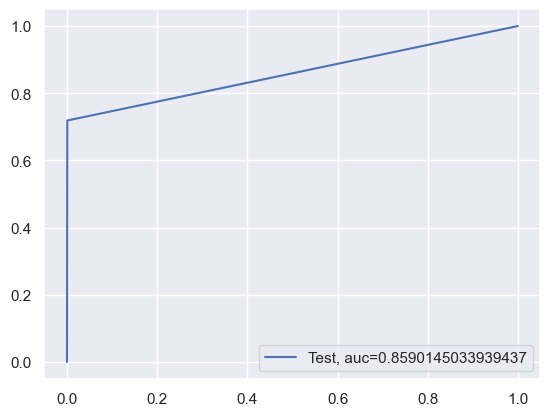

entropy score: 0.9990519995786665
Confusion Matrix


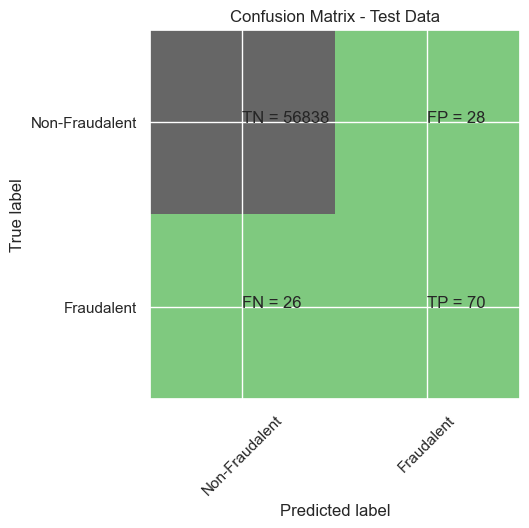

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


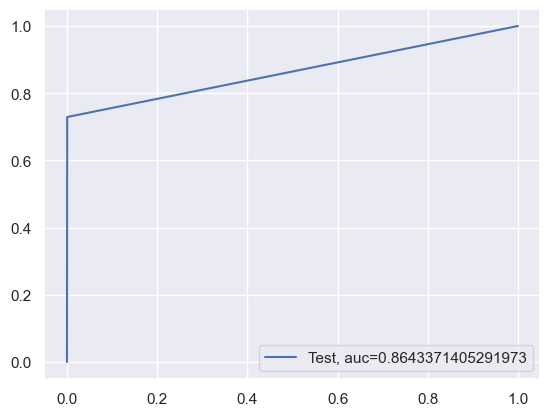

Time Taken by Model: --- 76.70265364646912 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


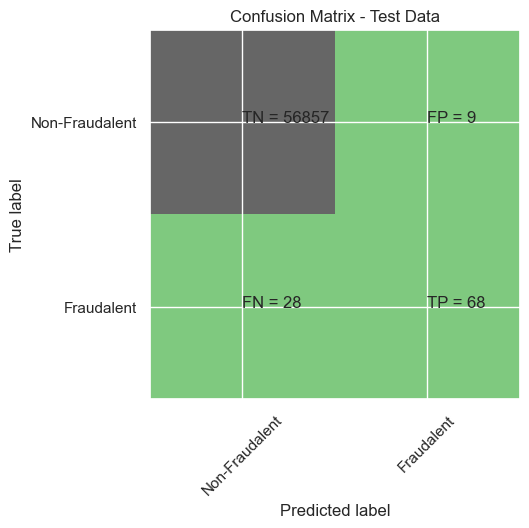

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


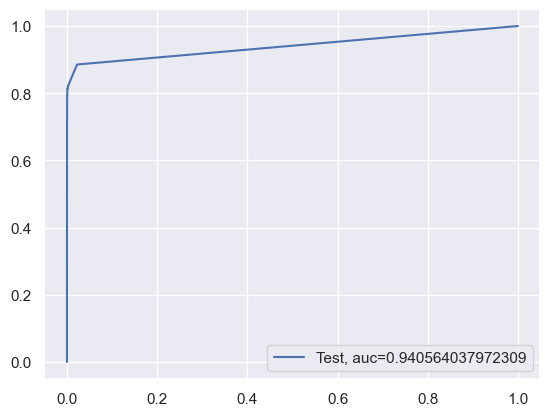

Time Taken by Model: --- 816.7498049736023 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999385555282469
Confusion Matrix


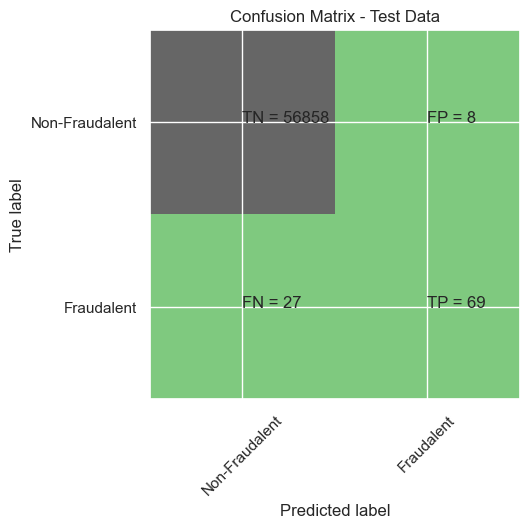

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.72      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9775861967901147
XGBoost threshold: 2.300571941304952e-05
ROC for the test dataset 97.8%


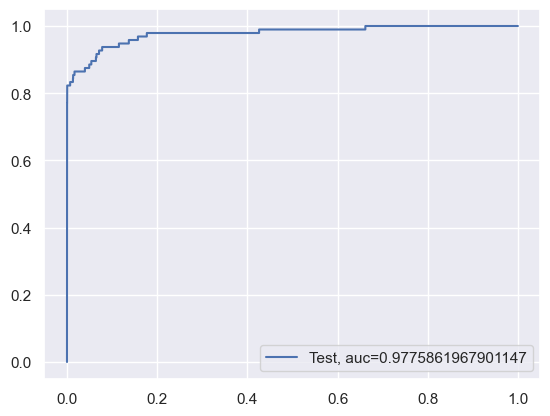

Time Taken by Model: --- 4.672446250915527 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


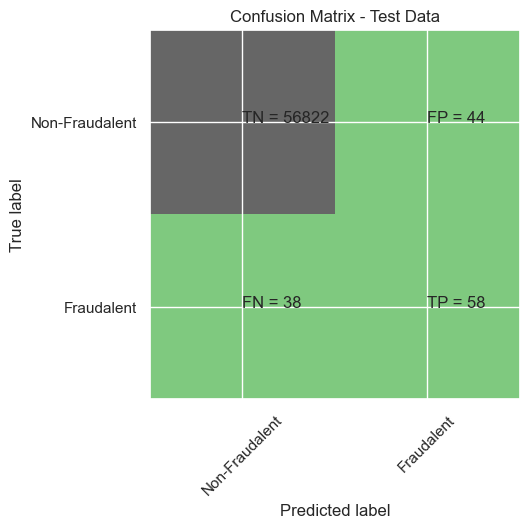

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913403146578507
SVM threshold: 0.001447904744958605
ROC for the test dataset 89.1%


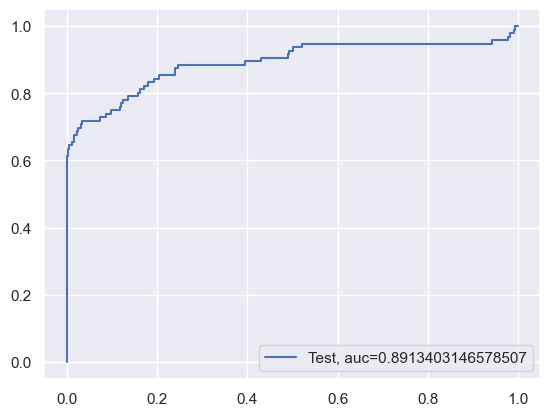

Time Taken by Model: --- 122.24224042892456 seconds ---


In [70]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [71]:
df_Results.head()

Data_Imbalance_Handiling                                       Model  \
0        Power Transformer  Logistic Regression with L2 Regularisation   
1        Power Transformer  Logistic Regression with L1 Regularisation   
2        Power Transformer                                         KNN   
3        Power Transformer               Tree Model with gini criteria   
4        Power Transformer            Tree Model with entropy criteria   

   Accuracy  roc_value  threshold      
0  0.998315   0.500000        inf NaN  
1  0.998841   0.963903   0.009276 NaN  
2  0.999298   0.900851   0.200000 NaN  
3  0.998806   0.859015   1.000000 NaN  
4  0.999052   0.864337   1.000000 NaN

# Perform cross validation with RepeatedKFold

In [73]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      6      7 ... 284778 284784 284795]
TRAIN: [     0      2      4 ... 284804 284805 284806] TEST: [     1      3      5 ... 284800 284801 284803]
TRAIN: [     0      1      3 ... 284803 284804 284805] TEST: [     2      4     12 ... 284798 284799 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    13     18     27 ... 284787 284789 284802]
TRAIN: [     0      1      2 ... 284802 284803 284806] TEST: [     9     11     21 ... 284797 284804 284805]
TRAIN: [     0      1      2 ... 284802 284803 284804] TEST: [     4     16     19 ... 284794 284805 284806]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      6     10 ... 284787 284792 284800]
TRAIN: [     1      3      4 ... 284804 284805 284806] TEST: [     0      2      8 ... 284784 284788 284796]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5      7 ... 284799 284801 284803]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5585374338598068
Max auc_roc for l1: 0.9755480517688337
Parameters for l2 regularisations
[[-1.41365573e-07  1.01681024e-07 -1.65185332e-07  1.14574745e-07
  -9.78864974e-08 -3.29129638e-08 -1.40294693e-07  1.48332563e-08
  -8.60848232e-08 -1.49224293e-07  9.75344887e-08 -1.63837595e-07
   9.27553225e-09 -1.98177330e-07 -1.33513374e-10 -1.08547016e-07
  -1.74973626e-07 -6.53301949e-08  1.49313055e-08  2.02821433e-08
   2.71282487e-08  3.37030986e-09 -6.62789404e-10 -1.41593969e-09
  -3.80641376e-09 -3.83890171e-09  5.47108343e-09  4.39567657e-09
  -6.64485806e-04 -1.06361449e-04]]
[-7.56639186e-06]
{1: array([[0.51558459, 0.51584274, 0.51581343, 0.51428484, 0.51428484,
        0.51428484, 0.51428484, 0.51428484, 0.51428484, 0.51428484,
        0.51428484, 0.51428484, 0.51428484, 0.51428484, 0.51428484,
        0.51428484, 0.51428484, 0.51428484, 0.51428484, 0.51428484],
       [0.56350187, 0.56296841, 0.56175298, 0

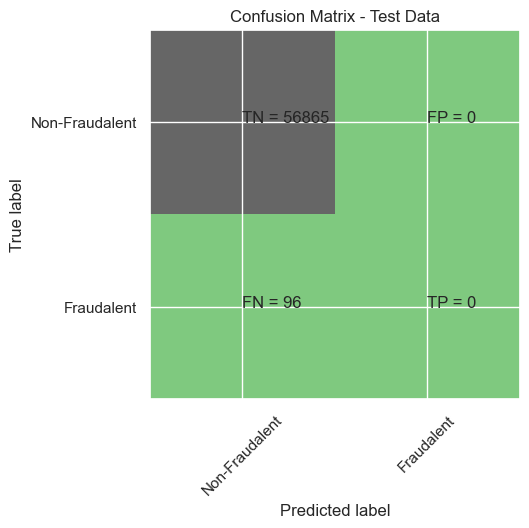

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9990168711925703
Confusion Matrix


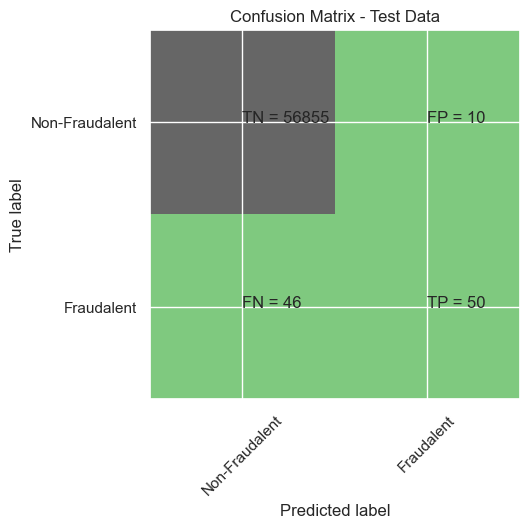

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.83      0.52      0.64        96

    accuracy                           1.00     56961
   macro avg       0.92      0.76      0.82     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5775431211348516
l2 threshold: 0.4992622401134247
ROC for the test dataset 57.8%


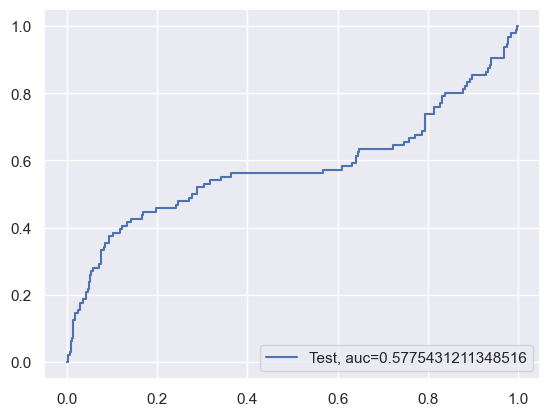

l1 roc_value: 0.8677172176792988
l1 threshold: 0.047932526905008266
ROC for the test dataset 86.8%


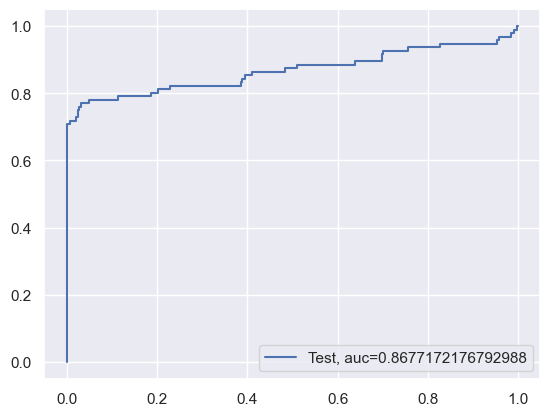

Time Taken by Model: --- 143.06453704833984 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991748740366215
Confusion Matrix


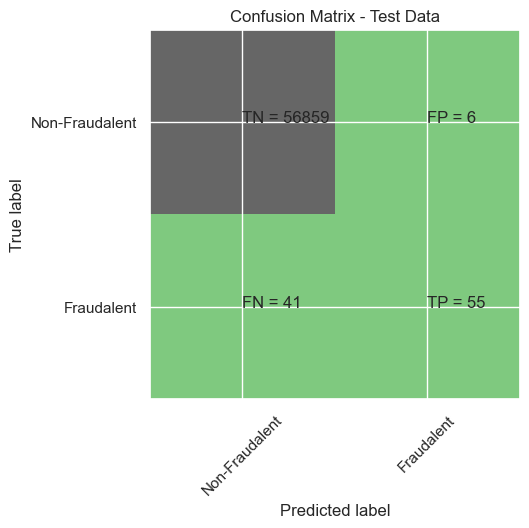

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.90      0.57      0.70        96

    accuracy                           1.00     56961
   macro avg       0.95      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8487269739734458
KNN threshold: 0.2
ROC for the test dataset 84.9%


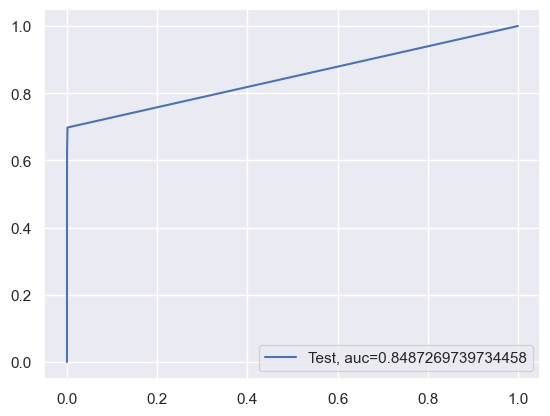

Time Taken by Model: --- 123.12036943435669 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991748740366215
Confusion Matrix


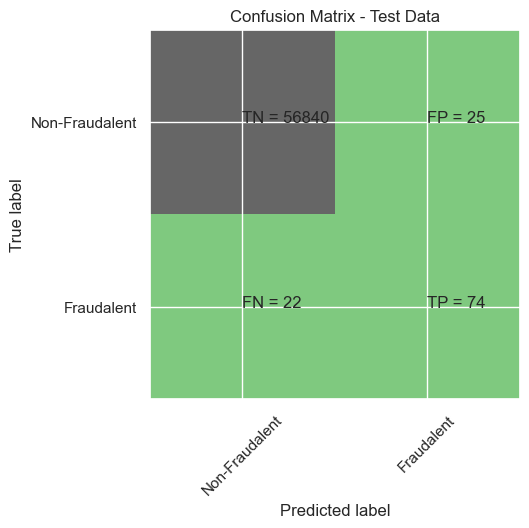

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.75      0.77      0.76        96

    accuracy                           1.00     56961
   macro avg       0.87      0.89      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.885196847797415
Tree threshold: 1.0
ROC for the test dataset 88.5%


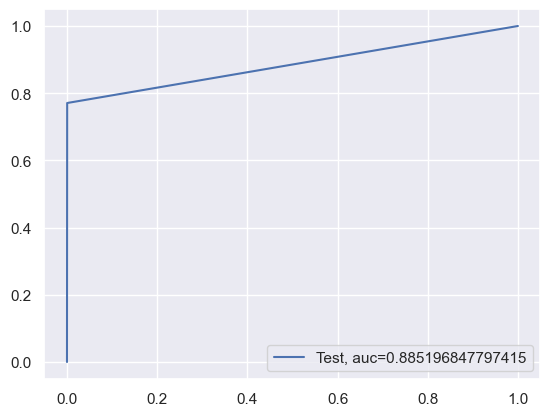

entropy score: 0.9991573181650603
Confusion Matrix


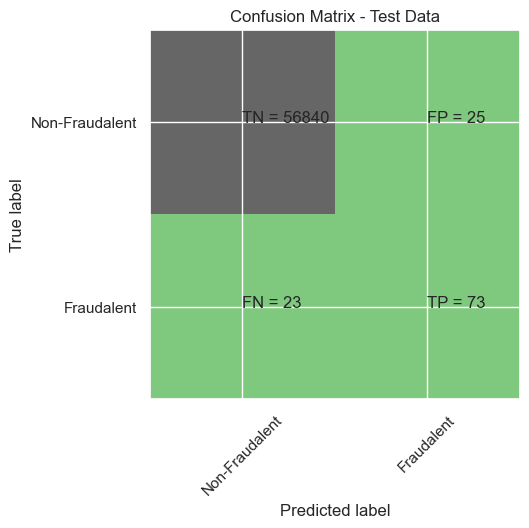

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.74      0.76      0.75        96

    accuracy                           1.00     56961
   macro avg       0.87      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8799885144640816
Tree threshold: 1.0
ROC for the test dataset 88.0%


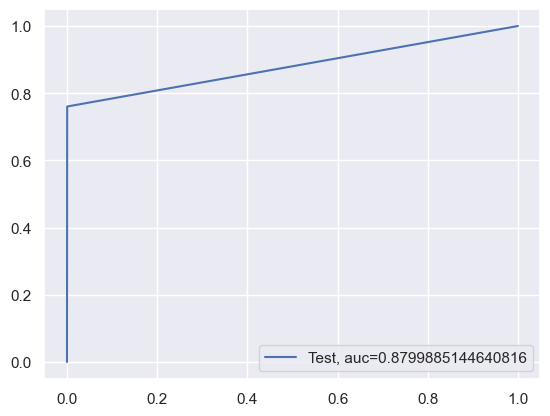

Time Taken by Model: --- 72.10615229606628 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


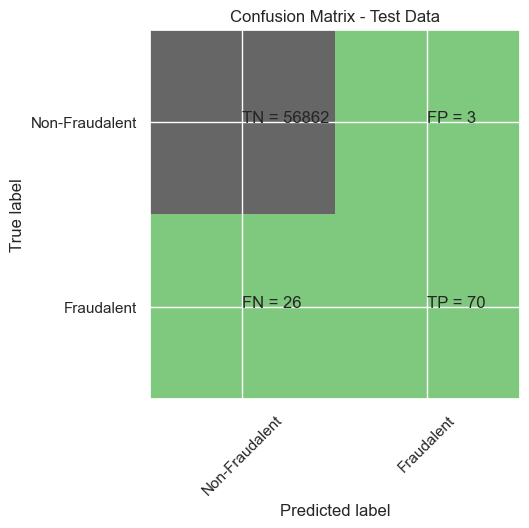

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.96      0.73      0.83        96

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9408804478443096
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


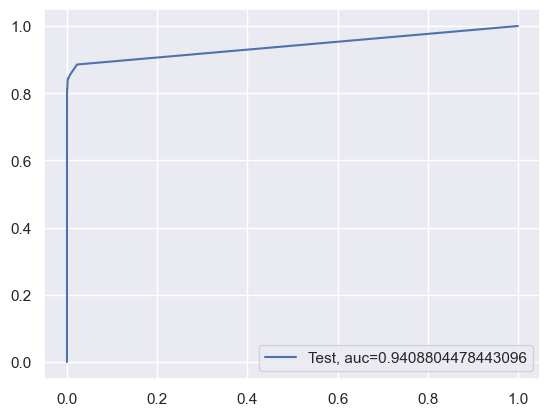

Time Taken by Model: --- 438.22844552993774 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


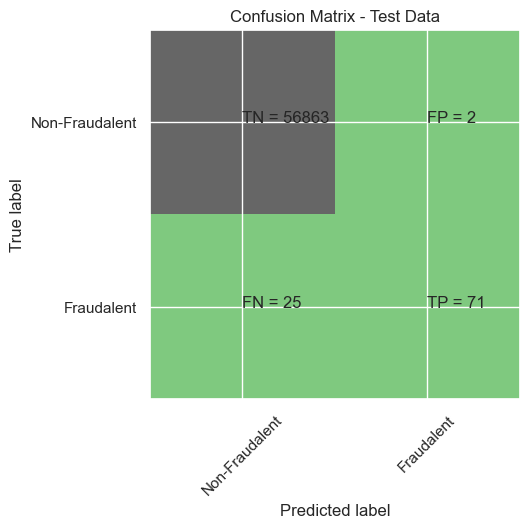

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.97      0.74      0.84        96

    accuracy                           1.00     56961
   macro avg       0.99      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9680509759957794
XGBoost threshold: 0.0001014453882817179
ROC for the test dataset 96.8%


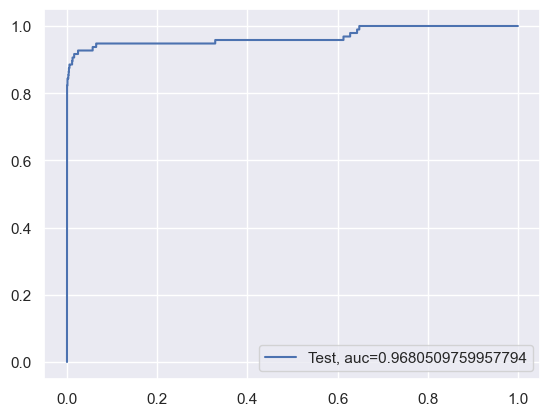

Time Taken by Model: --- 4.690887212753296 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9973841751373747
Confusion Matrix


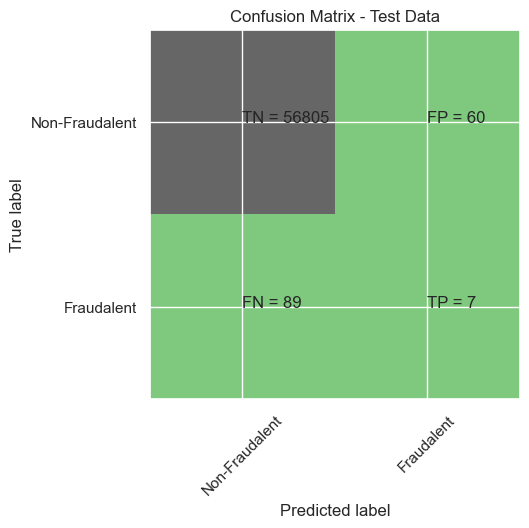

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.10      0.07      0.09        96

    accuracy                           1.00     56961
   macro avg       0.55      0.54      0.54     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.6981117559131276
SVM threshold: 0.0018854834205933504
ROC for the test dataset 69.8%


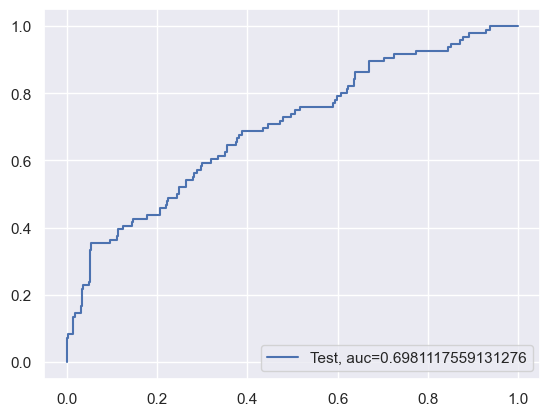

Time Taken by Model: --- 2445.2625522613525 seconds ---


In [74]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [75]:
df_Results

Data_Imbalance_Handiling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
15  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998315   0.500000   
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   
2                                          KNN  0.999298   0.900851   
3                Tree Model with gini criteria  0.998806   0.859015   
4             Tree Model with entropy criteria  0.999052   0.864337   
5                                Random Forest  0.999350   0.940564   
6                                      XGBoost  0.999386   0.977586   
7                                          SVM  0.998560   0.891340   
8   Logistic Regression with L2 Regularisation  0.998315   0.577543   
9   Logistic Regression with L1 Regularisation  0.999017   0.867717   
10                                         KNN  0.999175   0.848727   
11               Tree Model with gini criteria  0.999175   0.885197   
12            Tree Model with entropy criteria  0.999157   0.879989   
13                               Random Forest  0.999491   0.940880   
14                                     XGBoost  0.999526   0.968051   
15                                         SVM  0.997384   0.698112   

    threshold            
0         inf       NaN  
1    0.009276       NaN  
2    0.200000       NaN  
3    1.000000       NaN  
4    1.000000       NaN  
5    0.010000       NaN  
6    0.000023       NaN  
7         NaN  0.001448  
8    0.499262       NaN  
9    0.047933       NaN  
10   0.200000       NaN  
11   1.000000       NaN  
12   1.000000       NaN  
13   0.010000       NaN  
14   0.000101       NaN  
15        NaN  0.001885

## It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.968051

In [77]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


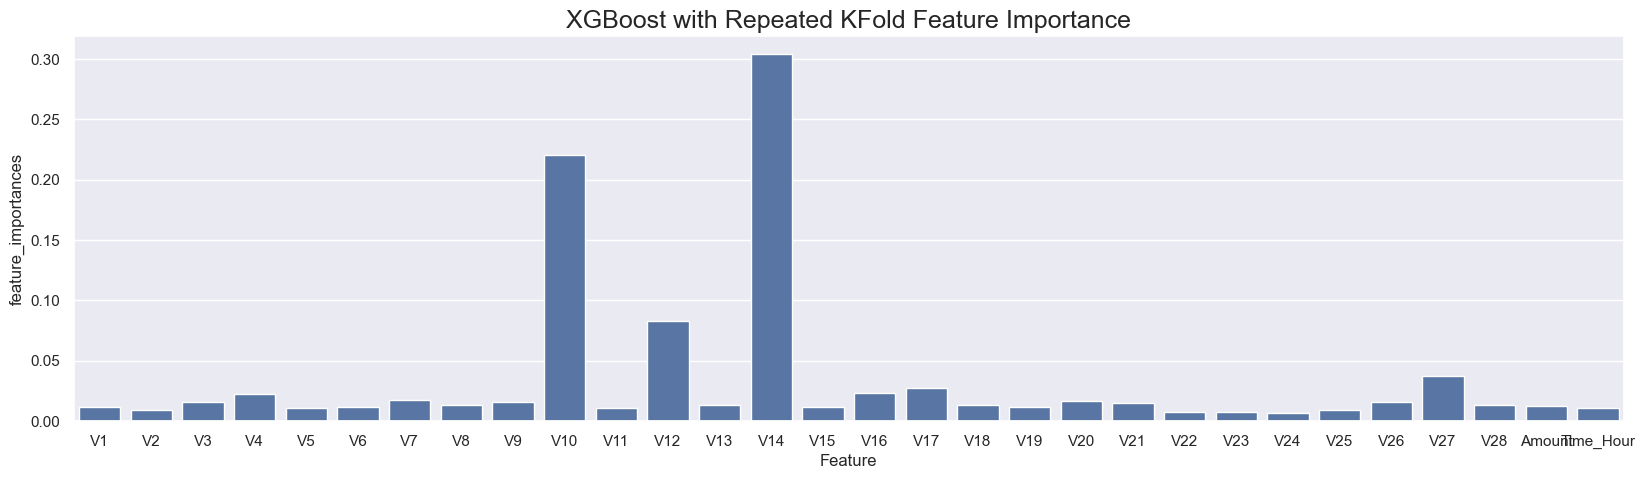

In [78]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [80]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5597020083683936
Max auc_roc for l1: 0.9652106893977332
Parameters for l2 regularisations
[[ 3.59840980e-07  2.10530060e-07 -1.58002317e-06 -2.04884044e-07
   3.76472678e-07 -2.67633109e-07  3.13241030e-08 -1.20226136e-08
  -8.98863463e-08 -1.54002314e-07 -4.65334035e-07  1.57441535e-07
  -1.27094538e-07 -4.38050832e-07 -3.73274685e-07 -8.23337714e-08
  -3.16607926e-07  1.01807717e-07  7.54814354e-08 -6.47175864e-08
   7.04219521e-08  1.73013268e-07  7.32726162e-08 -1.03599764e-08
  -2.85545640e-07 -2.03747293e-08  3.38203553e-09 -1.32510707e-08
  -6.82254904e-04 -9.57433590e-05]]
[-7.52178855e-06]
{1: array([[0.48266925, 0.48178322, 0.47951852, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818],
       [0.55602862, 0.55598183, 0.55533056, 0

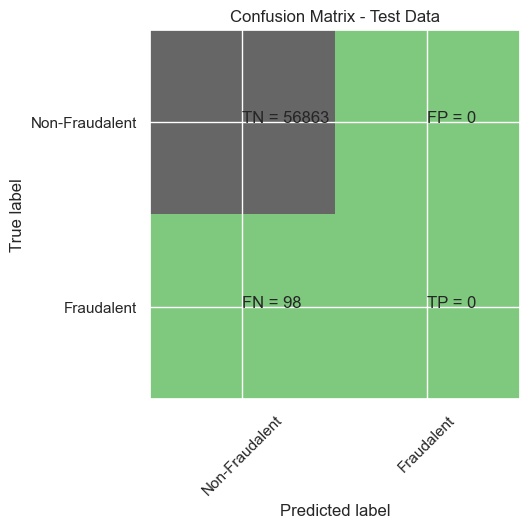

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9987535331191517
Confusion Matrix


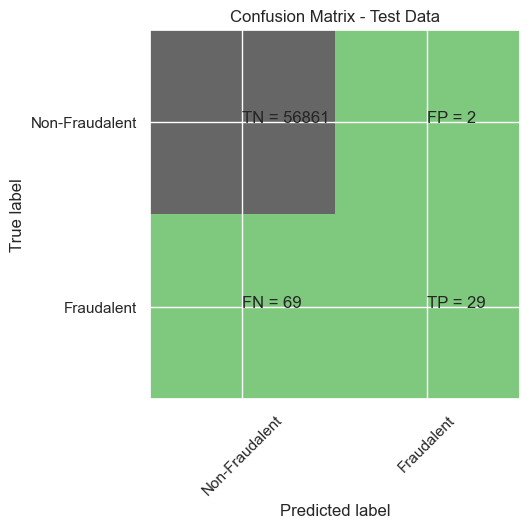

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.6111619154810686
l2 threshold: 0.4993921957728673
ROC for the test dataset 61.1%


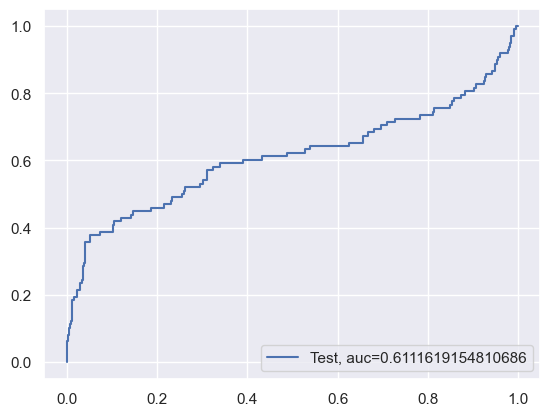

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199856
ROC for the test dataset 88.9%


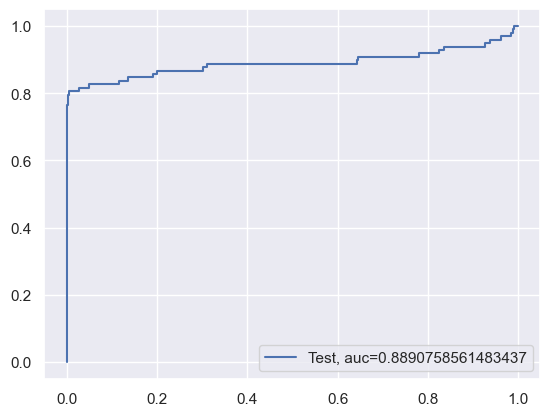

Time Taken by Model: --- 146.81028699874878 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


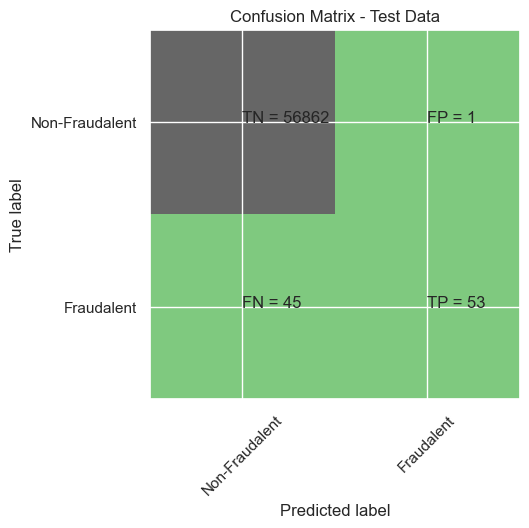

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


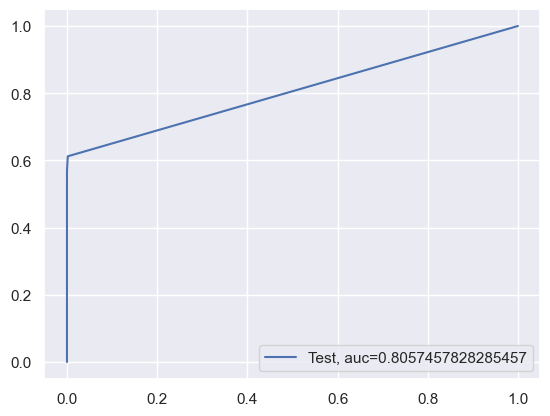

Time Taken by Model: --- 145.07076144218445 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


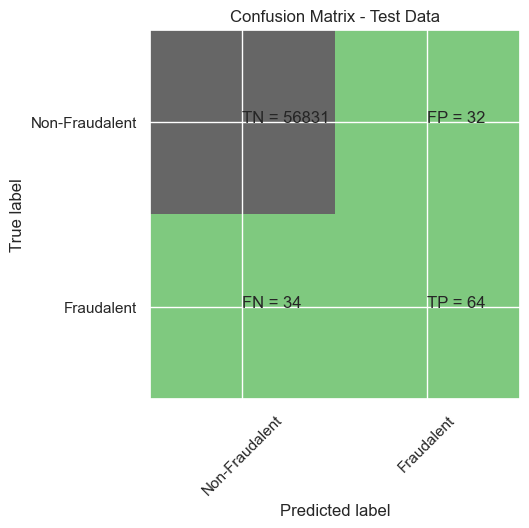

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


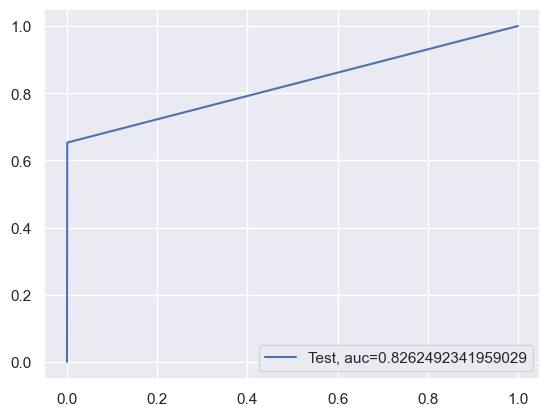

entropy score: 0.9990168711925703
Confusion Matrix


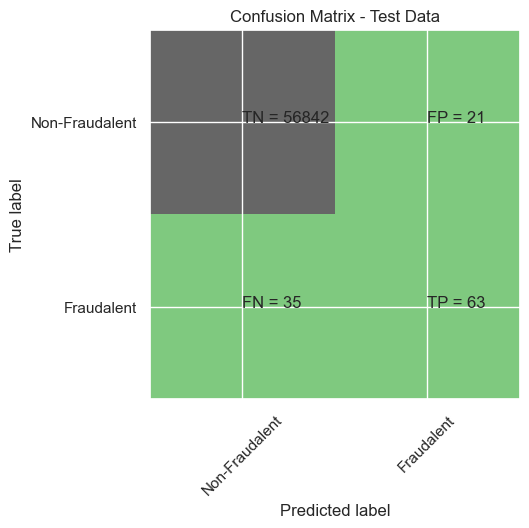

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


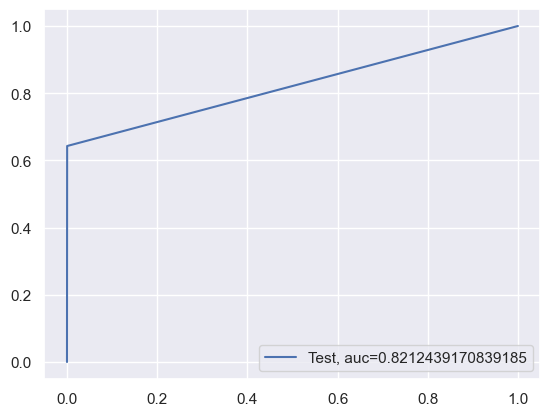

Time Taken by Model: --- 62.208662271499634 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


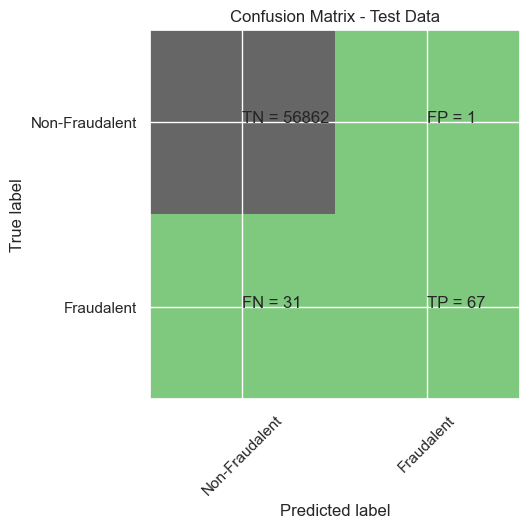

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


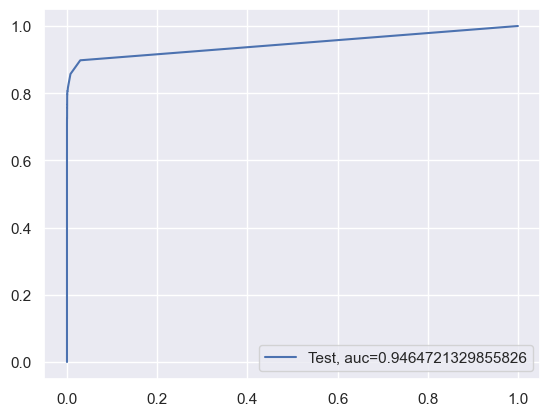

Time Taken by Model: --- 406.4478266239166 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


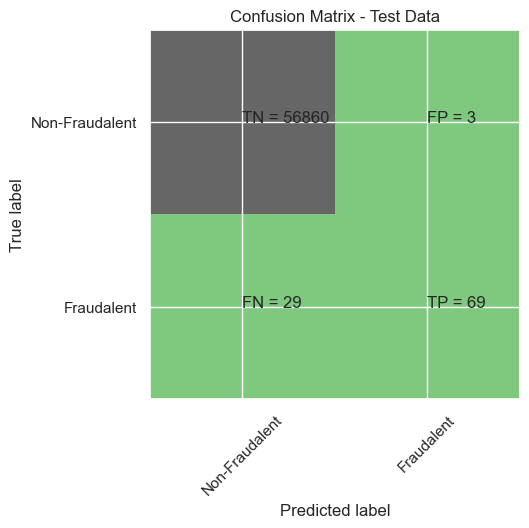

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 97.2%


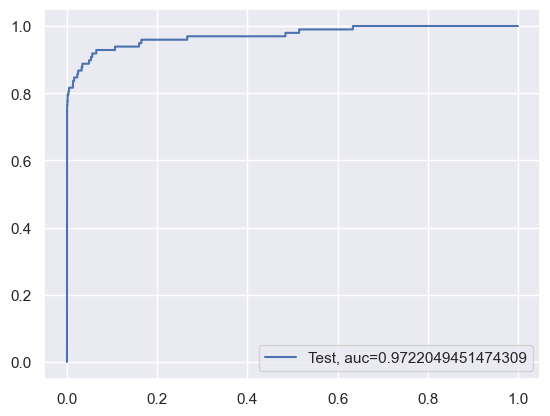

Time Taken by Model: --- 5.395576238632202 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


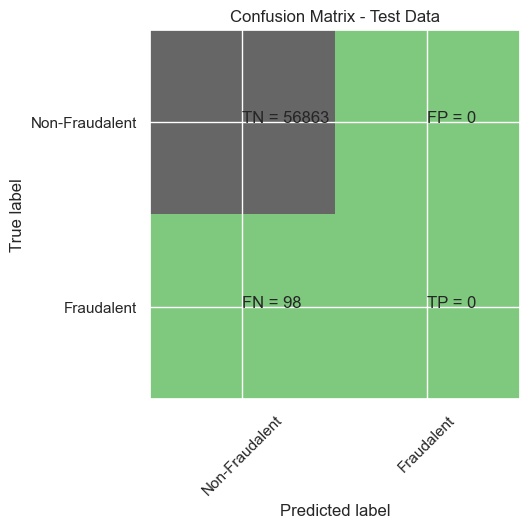

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.0029258228320929807
ROC for the test dataset 40.2%


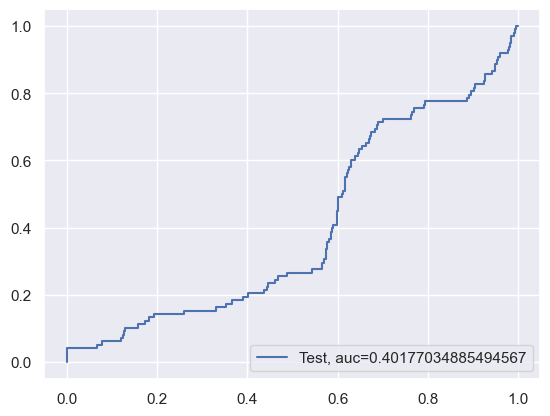

Time Taken by Model: --- 1103.577577829361 seconds ---


In [82]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [83]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998315   0.500000   
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   
2                                          KNN  0.999298   0.900851   
3                Tree Model with gini criteria  0.998806   0.859015   
4             Tree Model with entropy criteria  0.999052   0.864337   
5                                Random Forest  0.999350   0.940564   
6                                      XGBoost  0.999386   0.977586   
7                                          SVM  0.998560   0.891340   
8   Logistic Regression with L2 Regularisation  0.998315   0.577543   
9   Logistic Regression with L1 Regularisation  0.999017   0.867717   
10                                         KNN  0.999175   0.848727   
11               Tree Model with gini criteria  0.999175   0.885197   
12            Tree Model with entropy criteria  0.999157   0.879989   
13                               Random Forest  0.999491   0.940880   
14                                     XGBoost  0.999526   0.968051   
15                                         SVM  0.997384   0.698112   
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   
18                                         KNN  0.999192   0.805746   
19               Tree Model with gini criteria  0.998841   0.826249   
20            Tree Model with entropy criteria  0.999017   0.821244   
21                               Random Forest  0.999438   0.946472   
22                                     XGBoost  0.999438   0.972205   
23                                         SVM  0.998280   0.401770   

    threshold            
0         inf       NaN  
1    0.009276       NaN  
2    0.200000       NaN  
3    1.000000       NaN  
4    1.000000       NaN  
5    0.010000       NaN  
6    0.000023       NaN  
7         NaN  0.001448  
8    0.499262       NaN  
9    0.047933       NaN  
10   0.200000       NaN  
11   1.000000       NaN  
12   1.000000       NaN  
13   0.010000       NaN  
14   0.000101       NaN  
15        NaN  0.001885  
16   0.499392       NaN  
17   0.021087       NaN  
18   0.200000       NaN  
19   1.000000       NaN  
20   1.000000       NaN  
21   0.010000       NaN  
22   0.000038       NaN  
23        NaN  0.002926

**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [86]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.5584887728914751
Parameters for l2 regularisations
[[-1.29662947e-07  1.26071386e-07 -2.12587293e-07  1.35971299e-07
  -8.07897562e-08 -3.70679101e-08 -1.51986313e-07  1.80344353e-08
  -5.83081382e-08 -1.47617741e-07  1.06204874e-07 -1.56442005e-07
  -3.91596568e-09 -1.89123035e-07 -3.71365329e-10 -1.14504233e-07
  -1.70320303e-07 -6.26041863e-08  2.33948624e-08  7.95499273e-09
   3.01771913e-08  3.94716503e-09 -1.94074830e-10 -4.89780428e-09
   4.86784437e-09  4.49203887e-09  5.95832652e-09  4.60363515e-09
  -6.62950400e-04 -1.05203313e-04]]
[-7.48138539e-06]
{1: array([[0.56021144, 0.55928832, 0.55737737, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433],
       [0.55864254, 0.5575424 , 0.55522446, 0.5518581 , 0.5518581 ,
        0.5518581 , 0.5518581 , 0.5518581 , 0.5518581 , 0.5518581 

In [87]:
searchCV_l2.coef_

array([[-1.29662947e-07,  1.26071386e-07, -2.12587293e-07,
         1.35971299e-07, -8.07897562e-08, -3.70679101e-08,
        -1.51986313e-07,  1.80344353e-08, -5.83081382e-08,
        -1.47617741e-07,  1.06204874e-07, -1.56442005e-07,
        -3.91596568e-09, -1.89123035e-07, -3.71365329e-10,
        -1.14504233e-07, -1.70320303e-07, -6.26041863e-08,
         2.33948624e-08,  7.95499273e-09,  3.01771913e-08,
         3.94716503e-09, -1.94074830e-10, -4.89780428e-09,
         4.86784437e-09,  4.49203887e-09,  5.95832652e-09,
         4.60363515e-09, -6.62950400e-04, -1.05203313e-04]])

In [88]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [89]:
coefficients

Feature  Importance Coefficient
0          V1           -1.296629e-07
1          V2            1.260714e-07
2          V3           -2.125873e-07
3          V4            1.359713e-07
4          V5           -8.078976e-08
5          V6           -3.706791e-08
6          V7           -1.519863e-07
7          V8            1.803444e-08
8          V9           -5.830814e-08
9         V10           -1.476177e-07
10        V11            1.062049e-07
11        V12           -1.564420e-07
12        V13           -3.915966e-09
13        V14           -1.891230e-07
14        V15           -3.713653e-10
15        V16           -1.145042e-07
16        V17           -1.703203e-07
17        V18           -6.260419e-08
18        V19            2.339486e-08
19        V20            7.954993e-09
20        V21            3.017719e-08
21        V22            3.947165e-09
22        V23           -1.940748e-10
23        V24           -4.897804e-09
24        V25            4.867844e-09
25        V26            4.492039e-09
26        V27            5.958327e-09
27        V28            4.603635e-09
28     Amount           -6.629504e-04
29  Time_Hour           -1.052033e-04

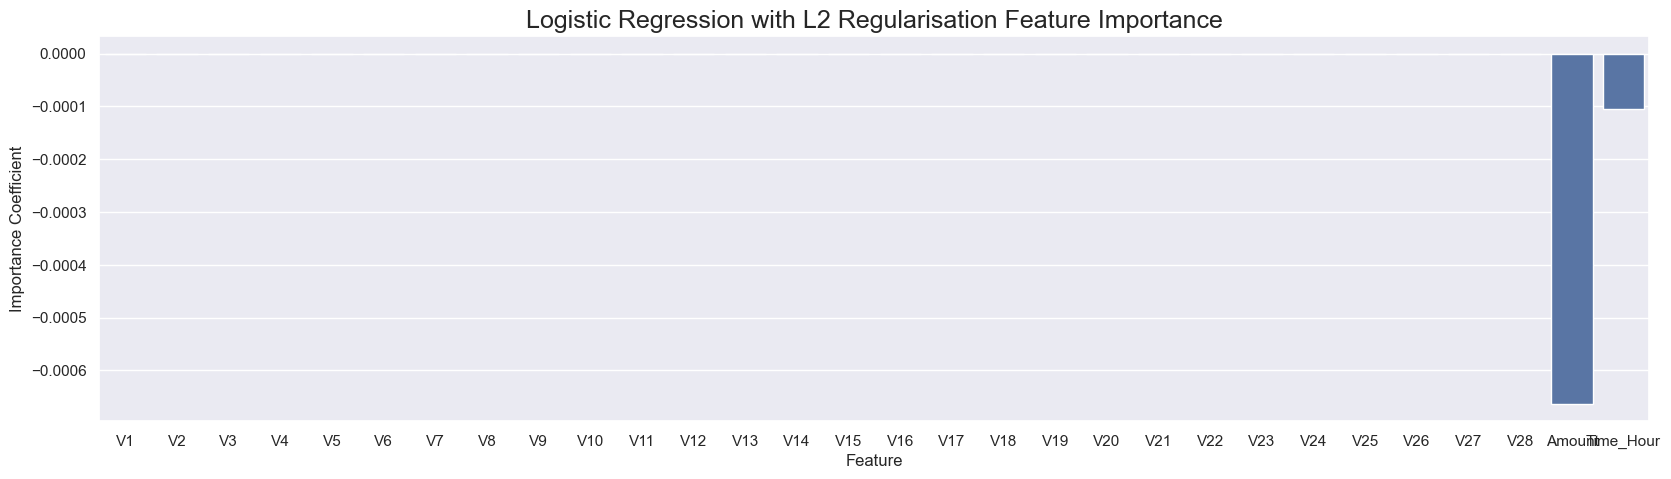

In [90]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()



**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [93]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5989159116440995
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-9.47397947e-05  6.40626077e-05 -1.34240545e-04  8.59452065e-05
  -6.32525408e-05 -2.50434451e-05 -1.06073886e-04  1.53202371e-05
  -5.15675585e-05 -1.08077690e-04  7.24473505e-05 -1.19070725e-04
  -1.22413670e-06 -1.32166529e-04  1.23417972e-06 -7.92893086e-05
  -1.29923424e-04 -4.34743036e-05  1.50511255e-05  7.76541330e-06
   1.34802768e-05  8.73099810e-07 -1.45631295e-06 -1.00868380e-06
   9.12126821e-07  1.25516867e-06  3.70053980e-06  9.40101558e-07
  -1.50139280e-04 -2.83794624e-04]]
[-1.82015622e-05]
{1: array([[0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974,
        0.59358974, 0.59358974, 0.59358974, 0.59358974, 0.59358974],
       [0.70467836, 0.70467836, 0.70467836, 0.70467836, 0.70

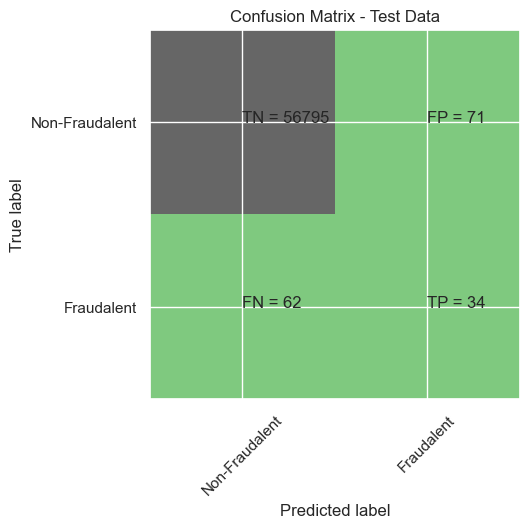

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.32      0.35      0.34        96

    accuracy                           1.00     56962
   macro avg       0.66      0.68      0.67     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


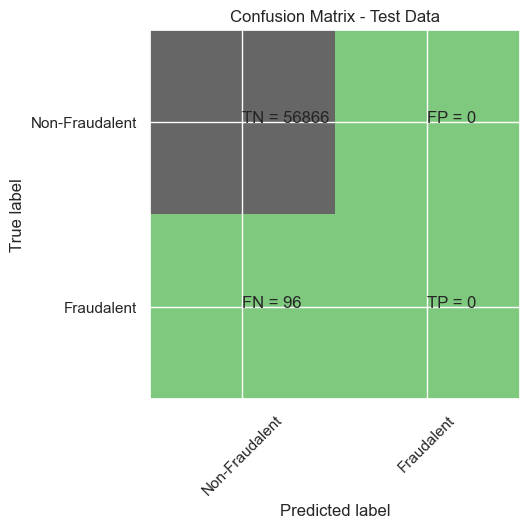

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.6872767045920819
l2 threshold: 0.4993931286052132
ROC for the test dataset 68.7%


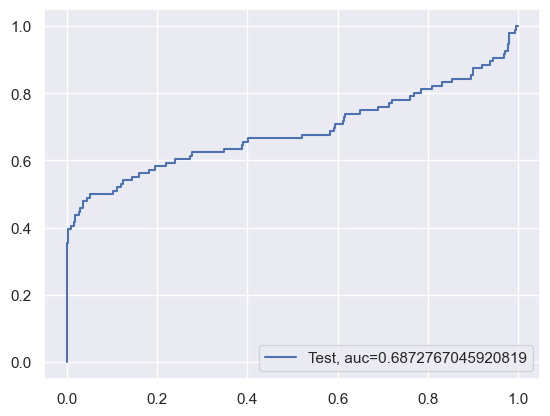

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


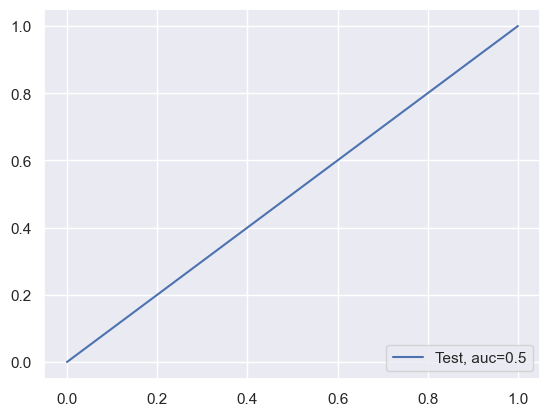

Time Taken by Model: --- 2.0515265464782715 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9734384326393034
Confusion Matrix


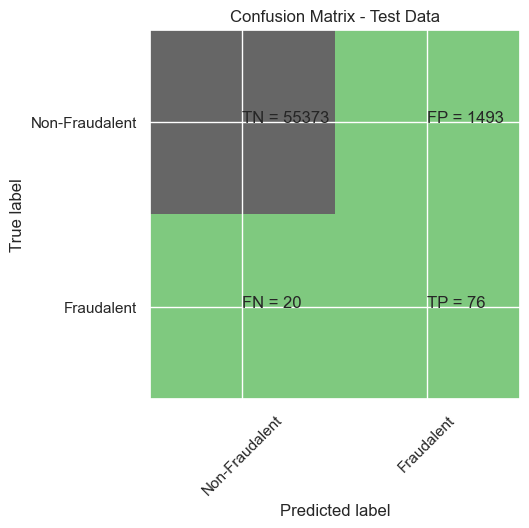

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.79      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.88      0.54     56962
weighted avg       1.00      0.97      0.99     56962

KNN roc_value: 0.9426779255911559
KNN threshold: 0.4
ROC for the test dataset 94.3%


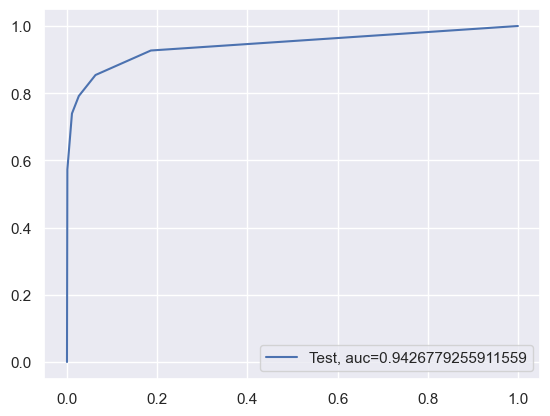

Time Taken by Model: --- 7.824608087539673 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.95512798005688
Confusion Matrix


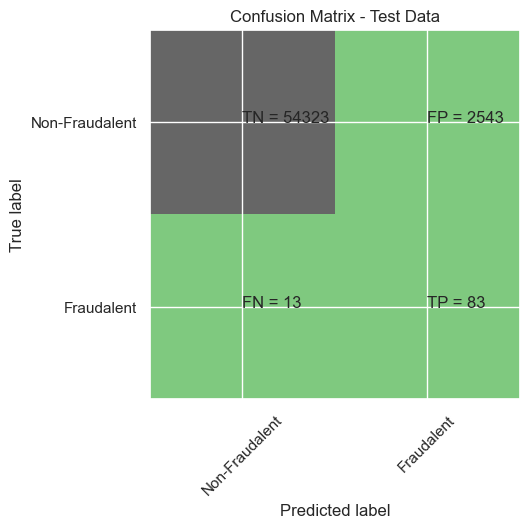

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.03      0.86      0.06        96

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.96      0.98     56962

gini tree_roc_value: 0.9099320844910258
Tree threshold: 1.0
ROC for the test dataset 91.0%


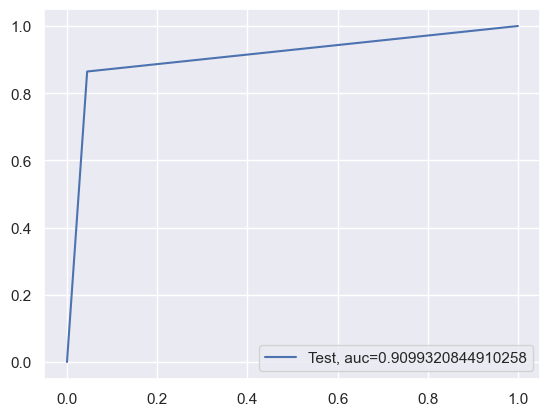

entropy score: 0.9444366419718409
Confusion Matrix


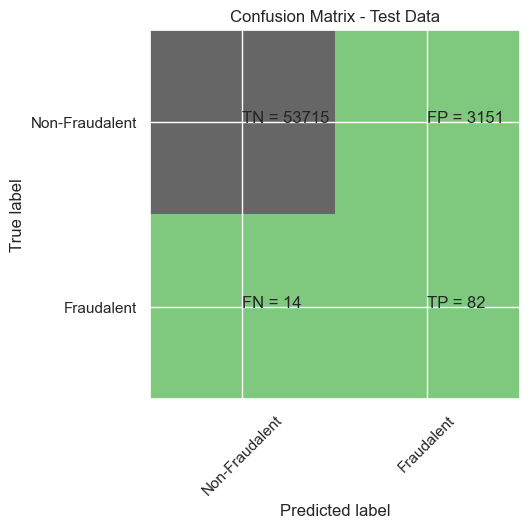

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.03      0.85      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.8993778502678812
Tree threshold: 1.0
ROC for the test dataset 89.9%


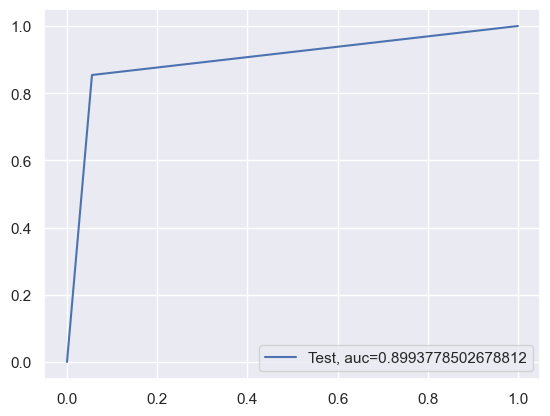

Time Taken by Model: --- 0.979264497756958 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9910817738141217
Confusion Matrix


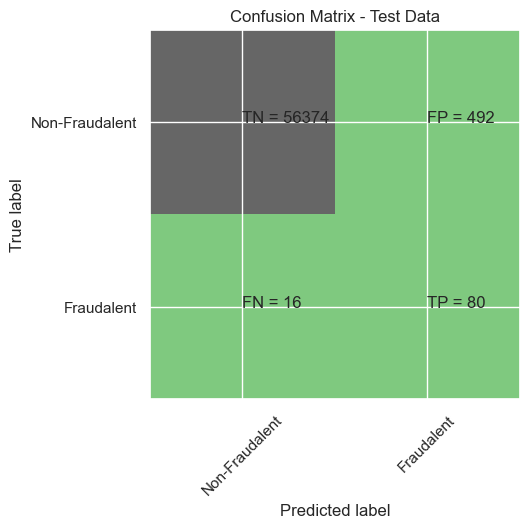

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.14      0.83      0.24        96

    accuracy                           0.99     56962
   macro avg       0.57      0.91      0.62     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9747918901452538
Random Forest threshold: 0.28
ROC for the test dataset 97.5%


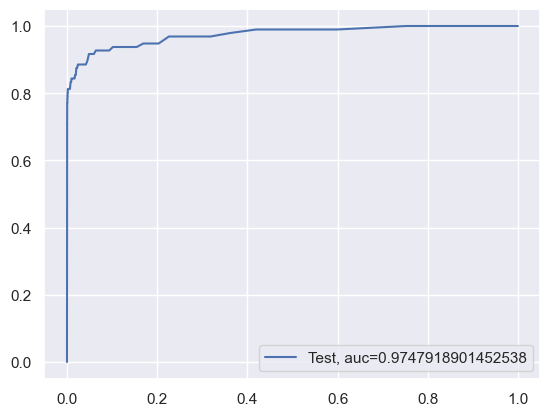

Time Taken by Model: --- 3.9137401580810547 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9868333274814789
Confusion Matrix


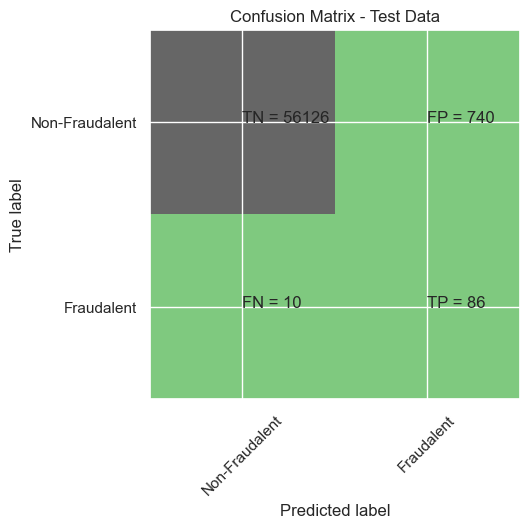

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.90      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.9834144084338621
XGBoost threshold: 0.05850500240921974
ROC for the test dataset 98.3%


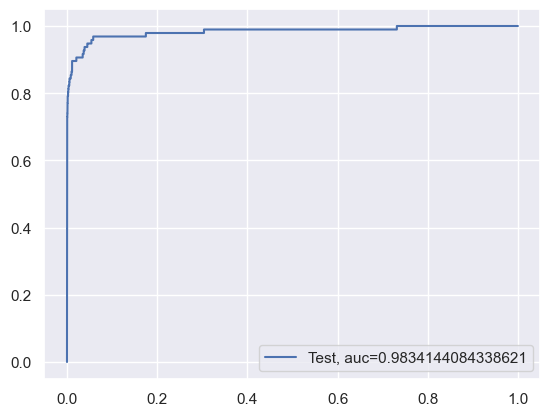

Time Taken by Model: --- 0.8911445140838623 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.8059232470769987
Confusion Matrix


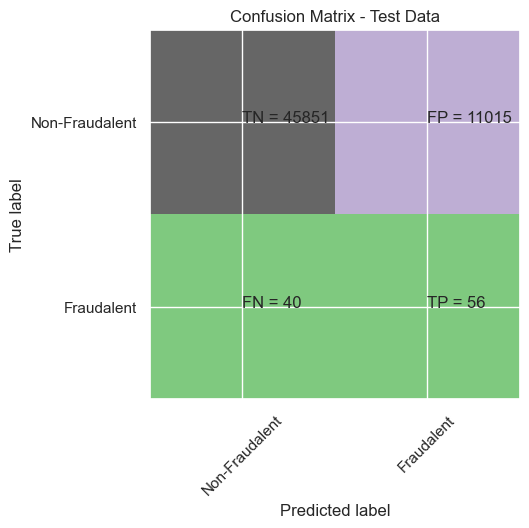

classification Report
              precision    recall  f1-score   support

           0       1.00      0.81      0.89     56866
           1       0.01      0.58      0.01        96

    accuracy                           0.81     56962
   macro avg       0.50      0.69      0.45     56962
weighted avg       1.00      0.81      0.89     56962

SVM roc_value: 0.6949980729551342
SVM threshold: 0.3473410322398237
ROC for the test dataset 69.5%


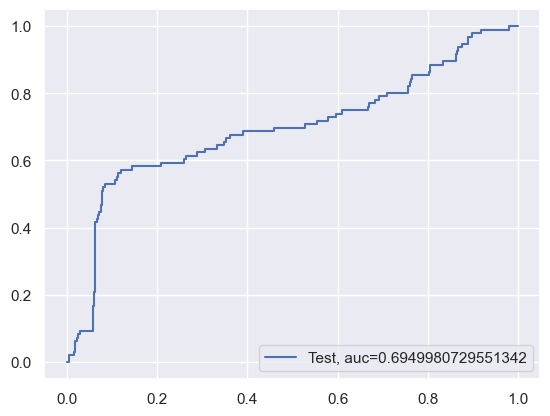

Time Taken by Model: --- 4.339440822601318 seconds ---


In [94]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [95]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   
28              Random Undersampling   
29              Random Undersampling   
30              Random Undersampling   
31              Random Undersampling   

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998315   0.500000   
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   
2                                          KNN  0.999298   0.900851   
3                Tree Model with gini criteria  0.998806   0.859015   
4             Tree Model with entropy criteria  0.999052   0.864337   
5                                Random Forest  0.999350   0.940564   
6                                      XGBoost  0.999386   0.977586   
7                                          SVM  0.998560   0.891340   
8   Logistic Regression with L2 Regularisation  0.998315   0.577543   
9   Logistic Regression with L1 Regularisation  0.999017   0.867717   
10                                         KNN  0.999175   0.848727   
11               Tree Model with gini criteria  0.999175   0.885197   
12            Tree Model with entropy criteria  0.999157   0.879989   
13                               Random Forest  0.999491   0.940880   
14                                     XGBoost  0.999526   0.968051   
15                                         SVM  0.997384   0.698112   
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   
18                                         KNN  0.999192   0.805746   
19               Tree Model with gini criteria  0.998841   0.826249   
20            Tree Model with entropy criteria  0.999017   0.821244   
21                               Random Forest  0.999438   0.946472   
22                                     XGBoost  0.999438   0.972205   
23                                         SVM  0.998280   0.401770   
24  Logistic Regression with L2 Regularisation  0.997665   0.687277   
25  Logistic Regression with L1 Regularisation  0.998315   0.500000   
26                                         KNN  0.973438   0.942678   
27               Tree Model with gini criteria  0.955128   0.909932   
28            Tree Model with entropy criteria  0.944437   0.899378   
29                               Random Forest  0.991082   0.974792   
30                                     XGBoost  0.986833   0.983414   
31                                         SVM  0.805923   0.694998   

    threshold            
0         inf       NaN  
1    0.009276       NaN  
2    0.200000       NaN  
3    1.000000       NaN  
4    1.000000       NaN  
5    0.010000       NaN  
6    0.000023       NaN  
7         NaN  0.001448  
8    0.499262       NaN  
9    0.047933       NaN  
10   0.200000       NaN  
11   1.000000       NaN  
12   1.00

**It seems Undersampling has impoved the XGBoost Results**

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the Random Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [100]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n#Define Oversampler\nROS = RandomOverSampler(sampling_strategy=0.5)\n# fit and apply the transform\nX_over, y_over = ROS.fit_resample(X_train, y_train)\n'

In [101]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

#You want OS.fit_resample(X, y), not fit_resample.

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
 
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

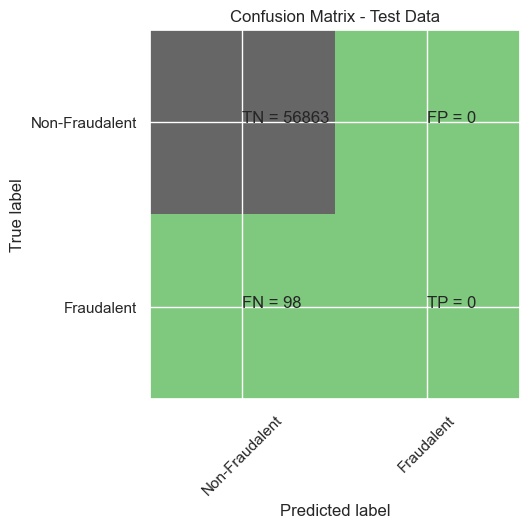

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


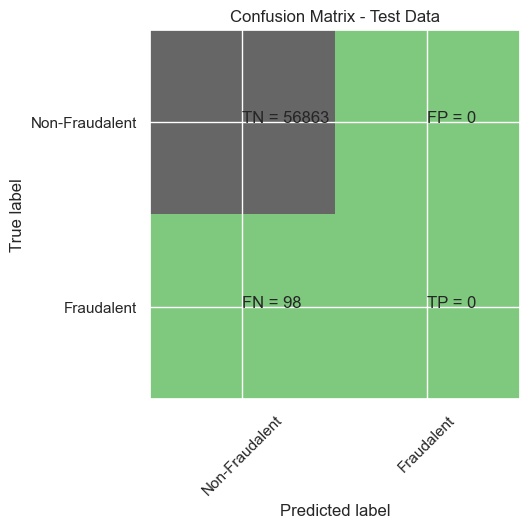

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


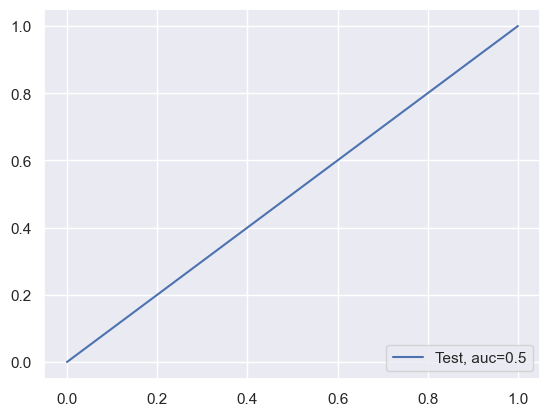

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


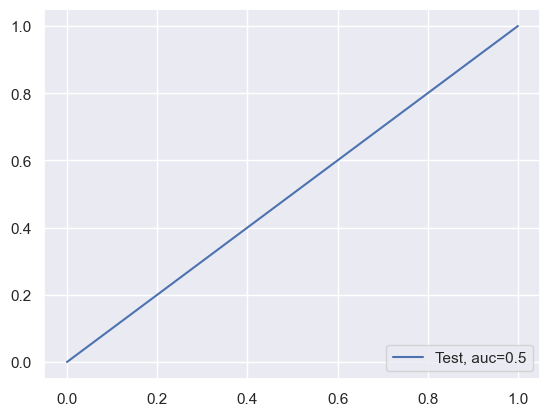

Time Taken by Model: --- 142.00696730613708 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


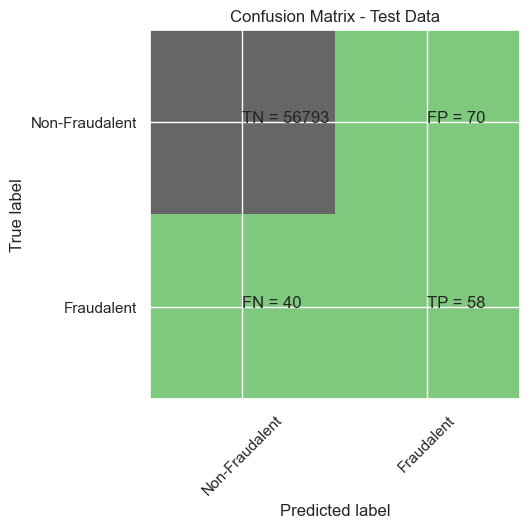

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


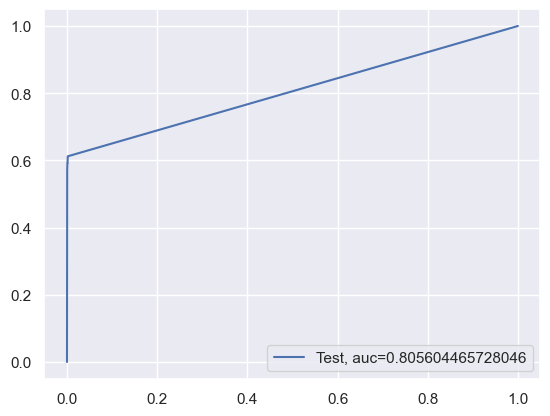

Time Taken by Model: --- 210.31318879127502 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991222064219378
Confusion Matrix


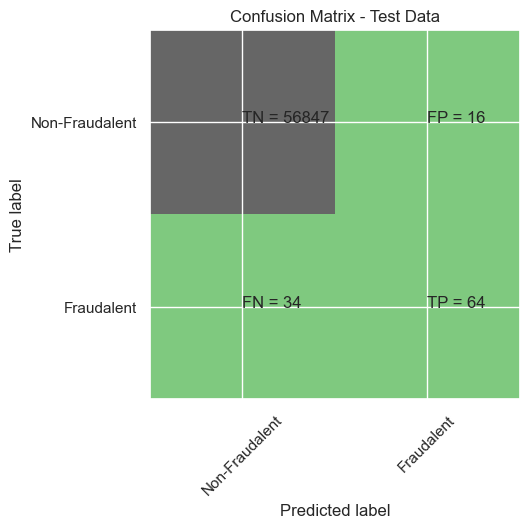

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.65      0.72        98

    accuracy                           1.00     56961
   macro avg       0.90      0.83      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8263899232204004
Tree threshold: 1.0
ROC for the test dataset 82.6%


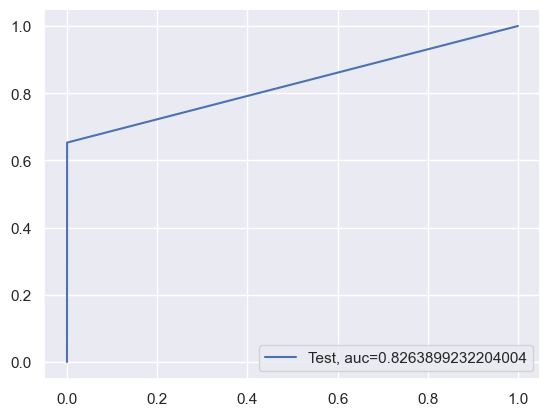

entropy score: 0.9991748740366215
Confusion Matrix


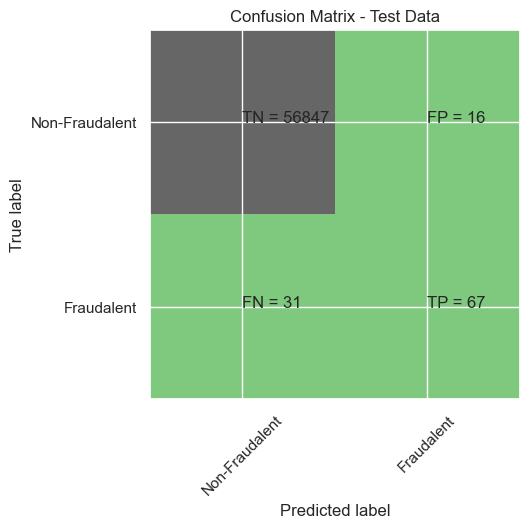

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.68      0.74        98

    accuracy                           1.00     56961
   macro avg       0.90      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.84169604566938
Tree threshold: 1.0
ROC for the test dataset 84.2%


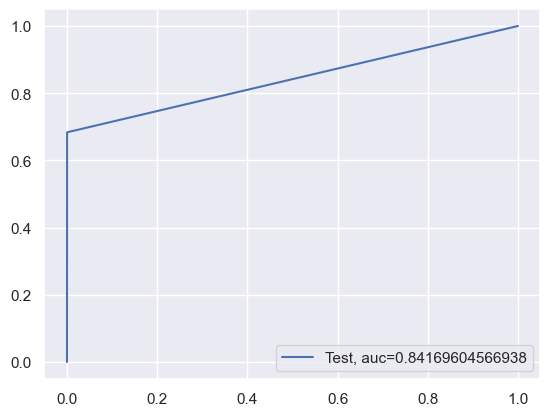

Time Taken by Model: --- 44.592387437820435 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


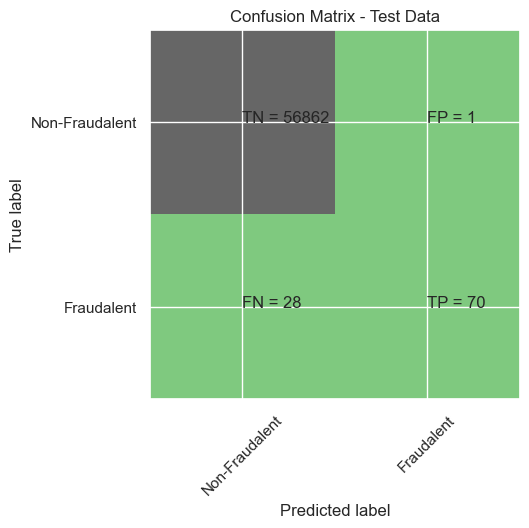

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9299239453796396
Random Forest threshold: 0.01
ROC for the test dataset 93.0%


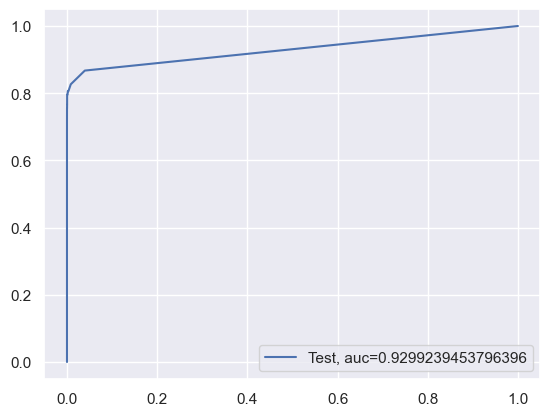

Time Taken by Model: --- 311.657958984375 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999490879724724
Confusion Matrix


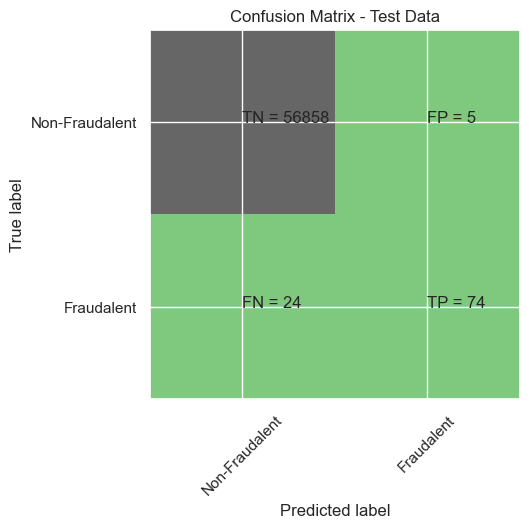

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9794200130855149
XGBoost threshold: 4.0624126995680854e-05
ROC for the test dataset 97.9%


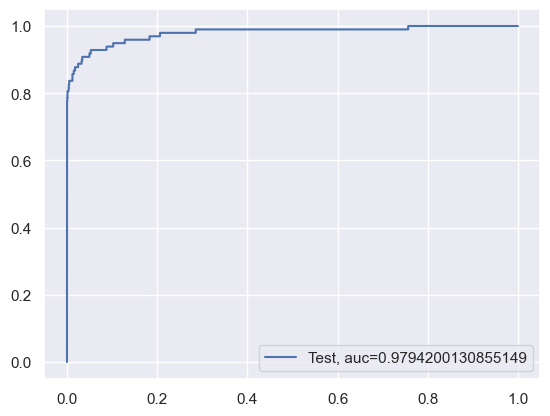

Time Taken by Model: --- 6.019814968109131 seconds ---
--------------------------------------------------------------------------------


In [102]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [103]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998315   0.500000   
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   
2                                          KNN  0.999298   0.900851   
3                Tree Model with gini criteria  0.998806   0.859015   
4             Tree Model with entropy criteria  0.999052   0.864337   
5                                Random Forest  0.999350   0.940564   
6                                      XGBoost  0.999386   0.977586   
7                                          SVM  0.998560   0.891340   
8   Logistic Regression with L2 Regularisation  0.998315   0.577543   
9   Logistic Regression with L1 Regularisation  0.999017   0.867717   
10                                         KNN  0.999175   0.848727   
11               Tree Model with gini criteria  0.999175   0.885197   
12            Tree Model with entropy criteria  0.999157   0.879989   
13                               Random Forest  0.999491   0.940880   
14                                     XGBoost  0.999526   0.968051   
15                                         SVM  0.997384   0.698112   
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   
18                                         KNN  0.999192   0.805746   
19               Tree Model with gini criteria  0.998841   0.826249   
20            Tree Model with entropy criteria  0.999017   0.821244   
21                               Random Forest  0.999438   0.946472   
22                                     XGBoost  0.999438   0.972205   
23                                         SVM  0.998280   0.401770   
24  Logistic Regression with L2 Regularisation  0.997665   0.687277   
25  Logistic Regression with L1 Regularisation  0.998315   0.500000   
26                        

## Results for Random Oversampling: 

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Oversampling with  SMOTE Oversamplng

**We will use SMOTE Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the SMOTE Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE 

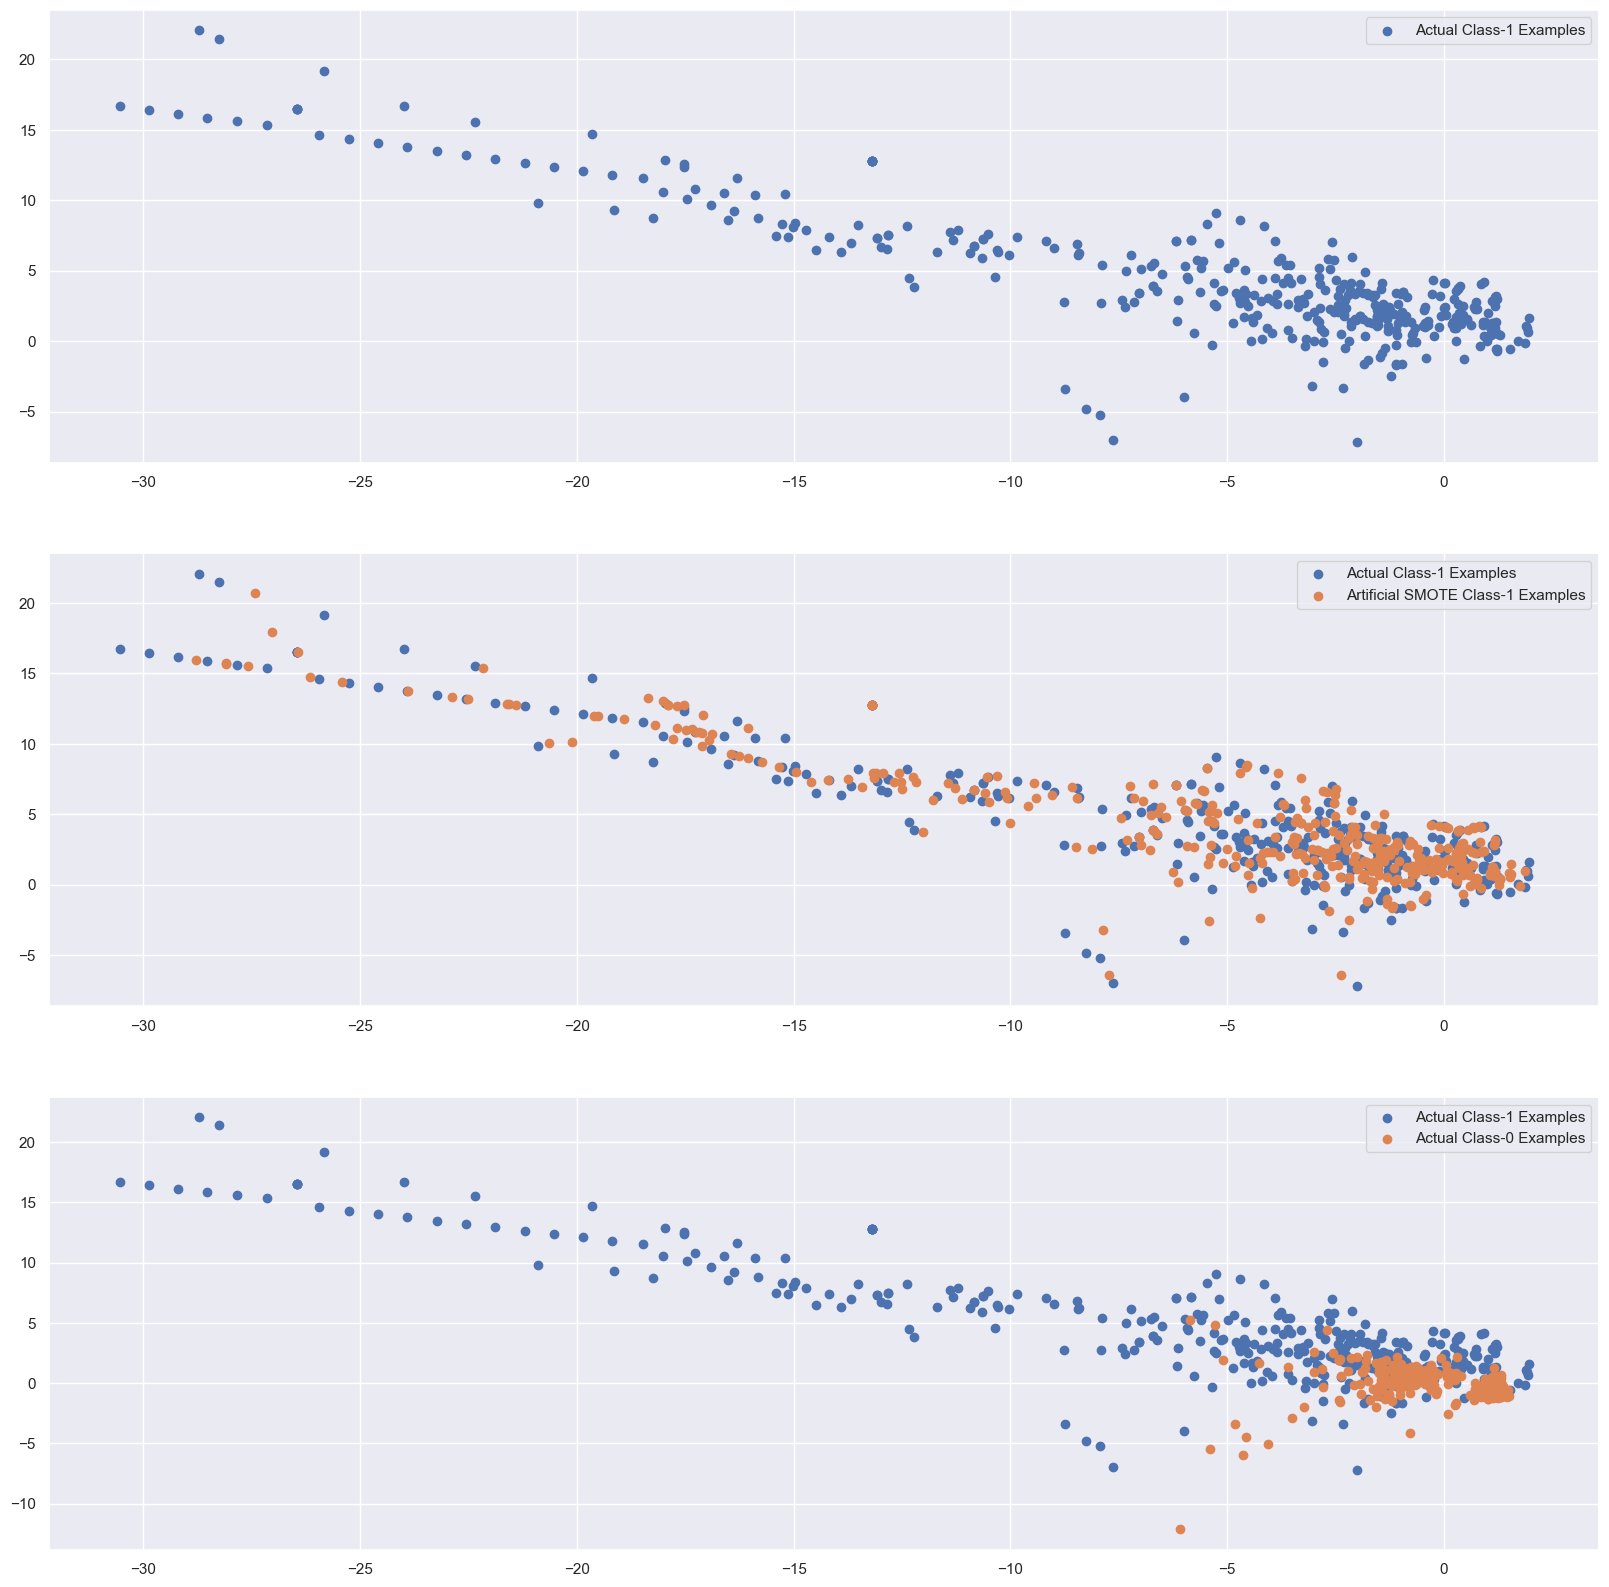

In [109]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

#Convert DataFrames to Numpy Arrays 
X_train_smote_1 = X_train_smote_1.to_numpy()
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [110]:
type(X_train_smote_1) , type(X_train_1)

(numpy.ndarray, numpy.ndarray)

In [111]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

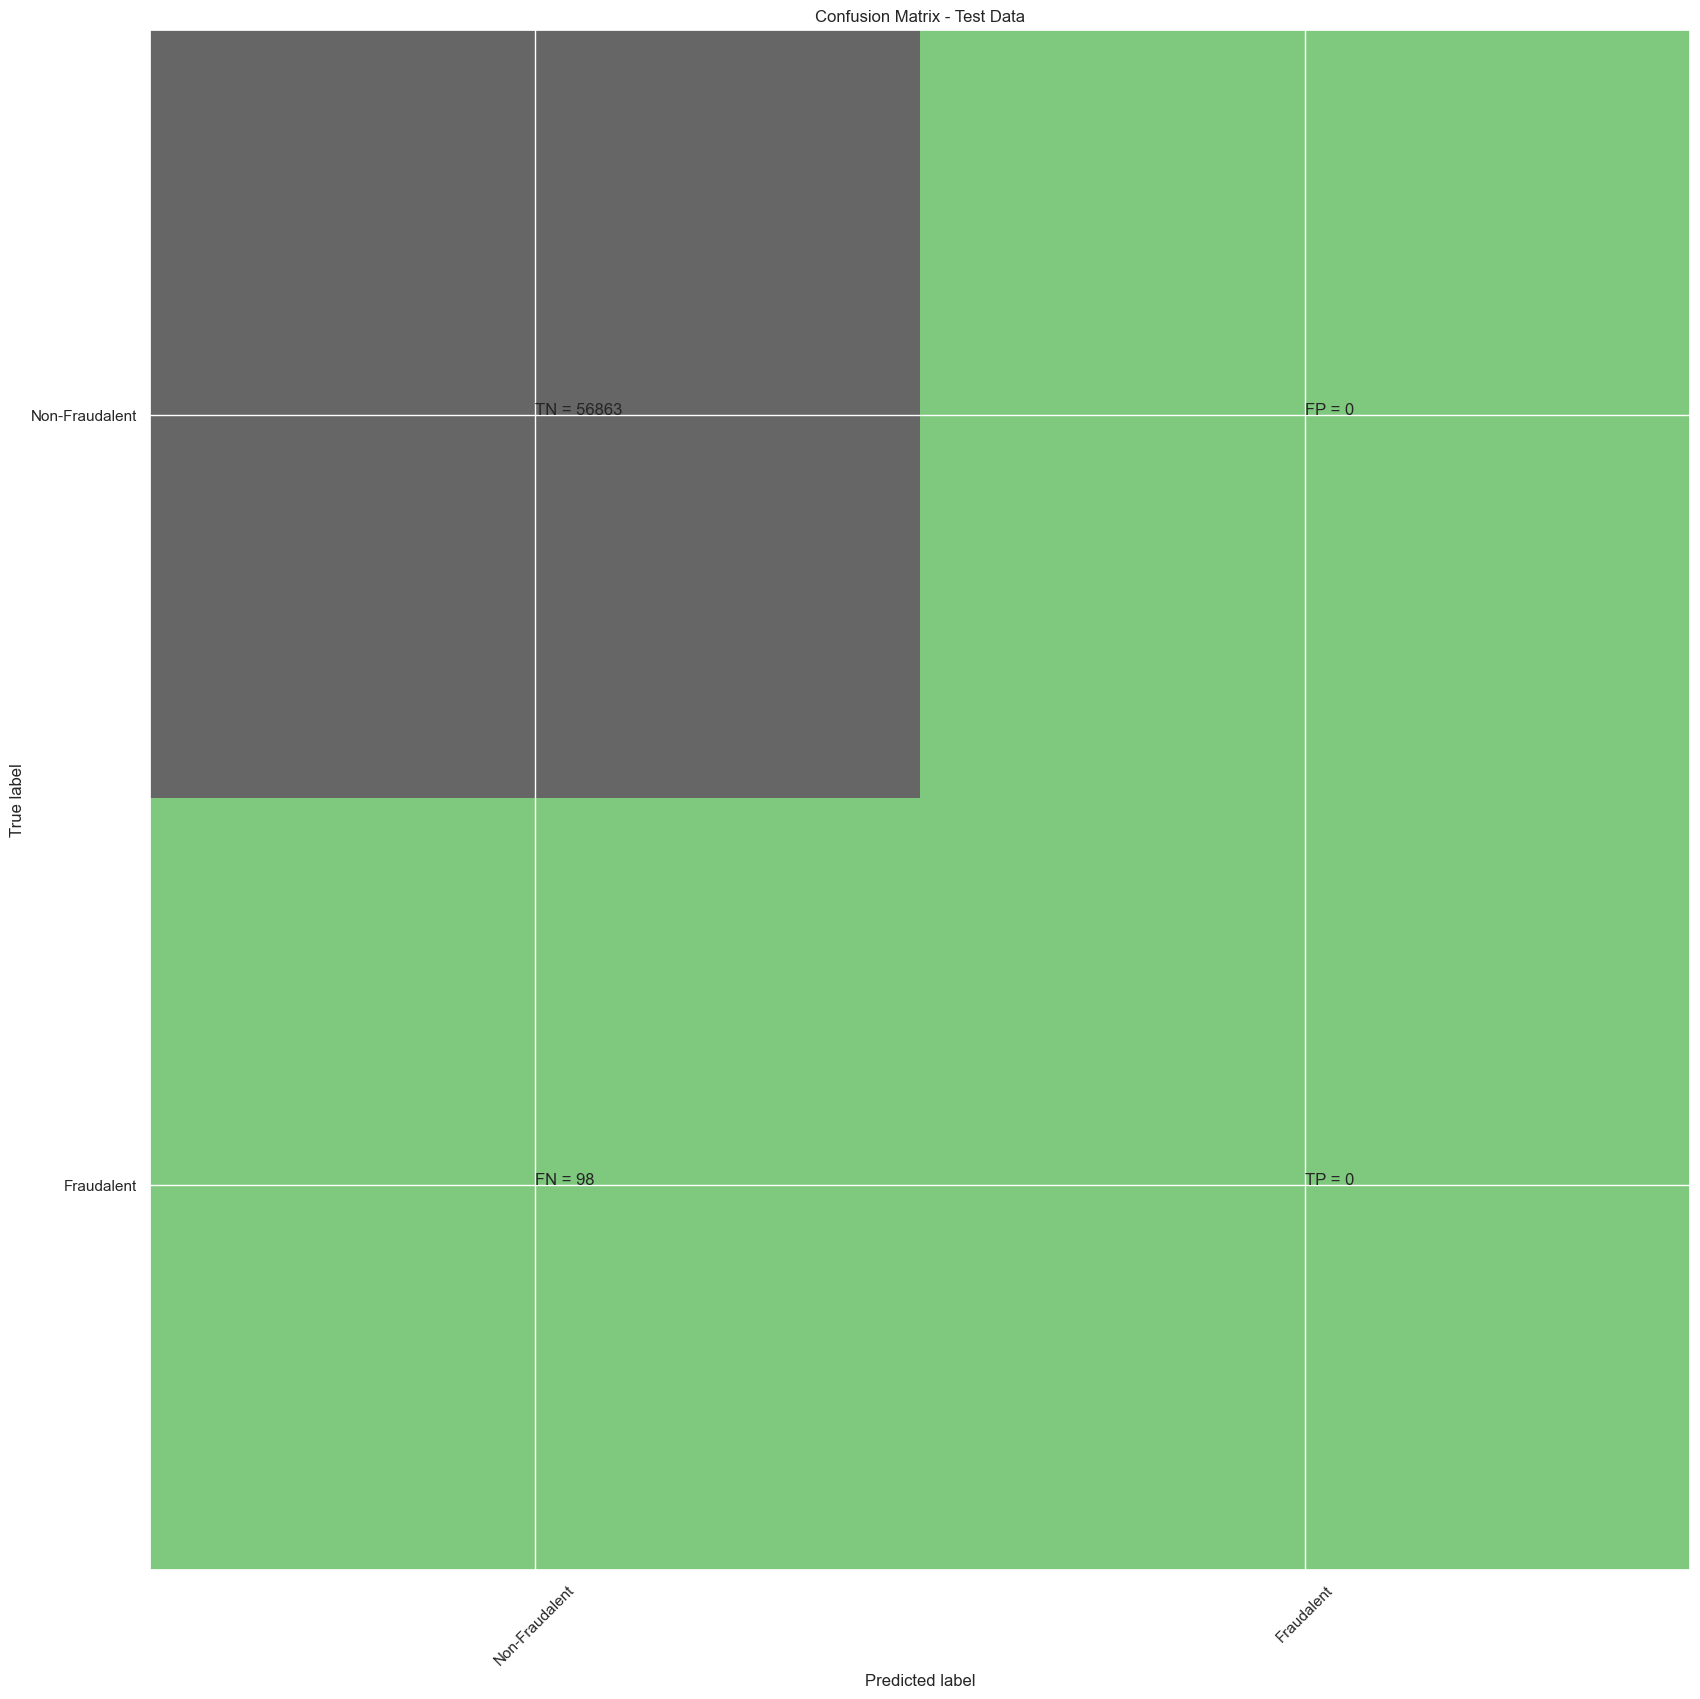

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


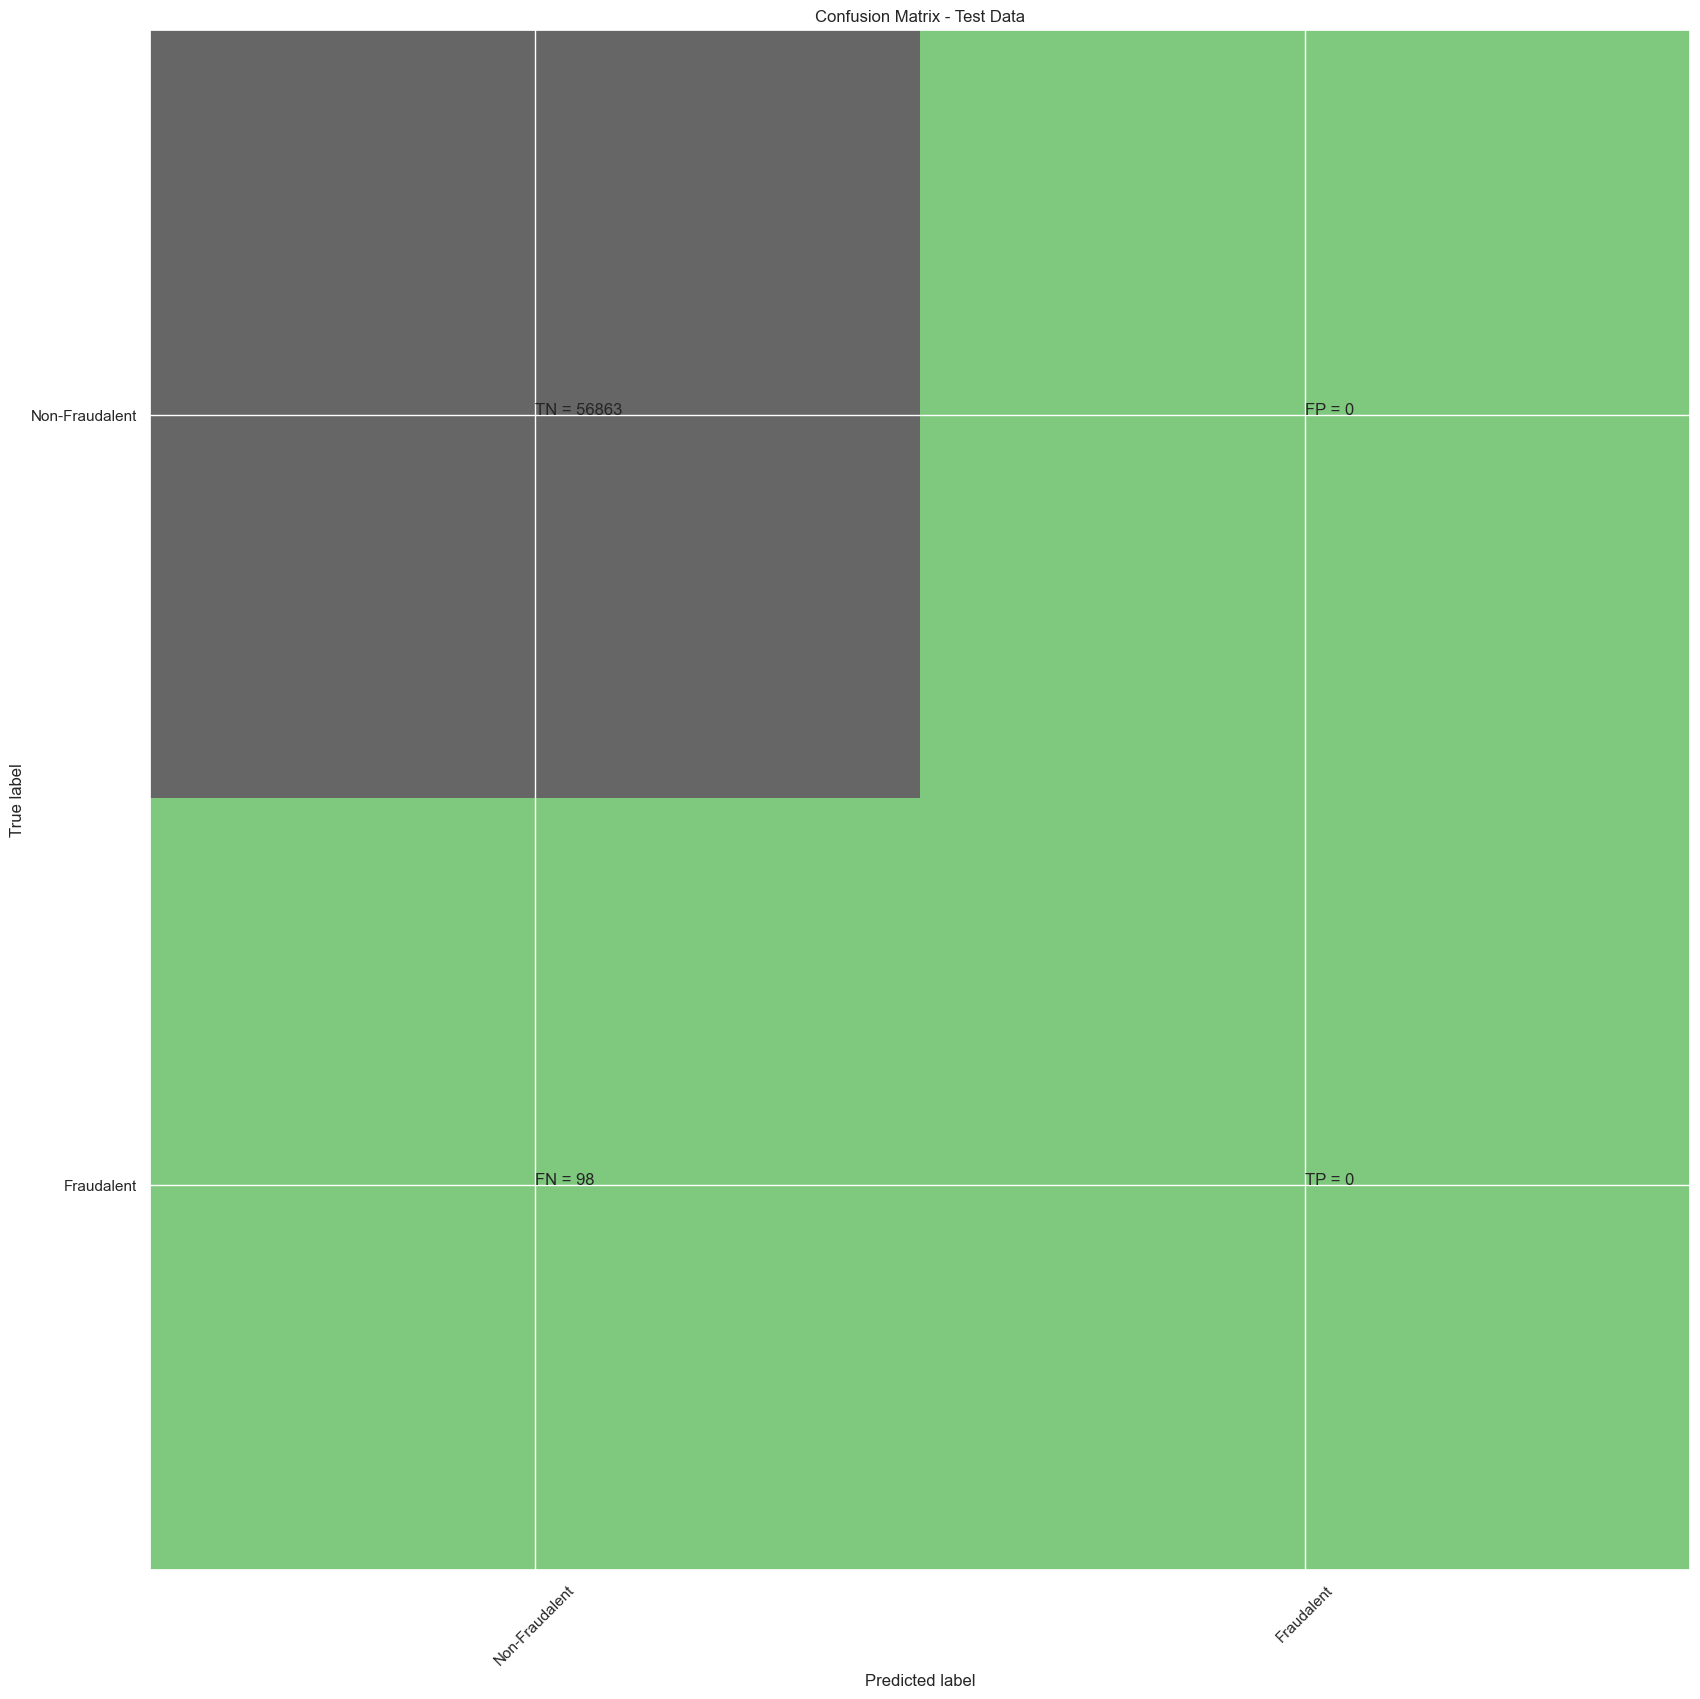

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


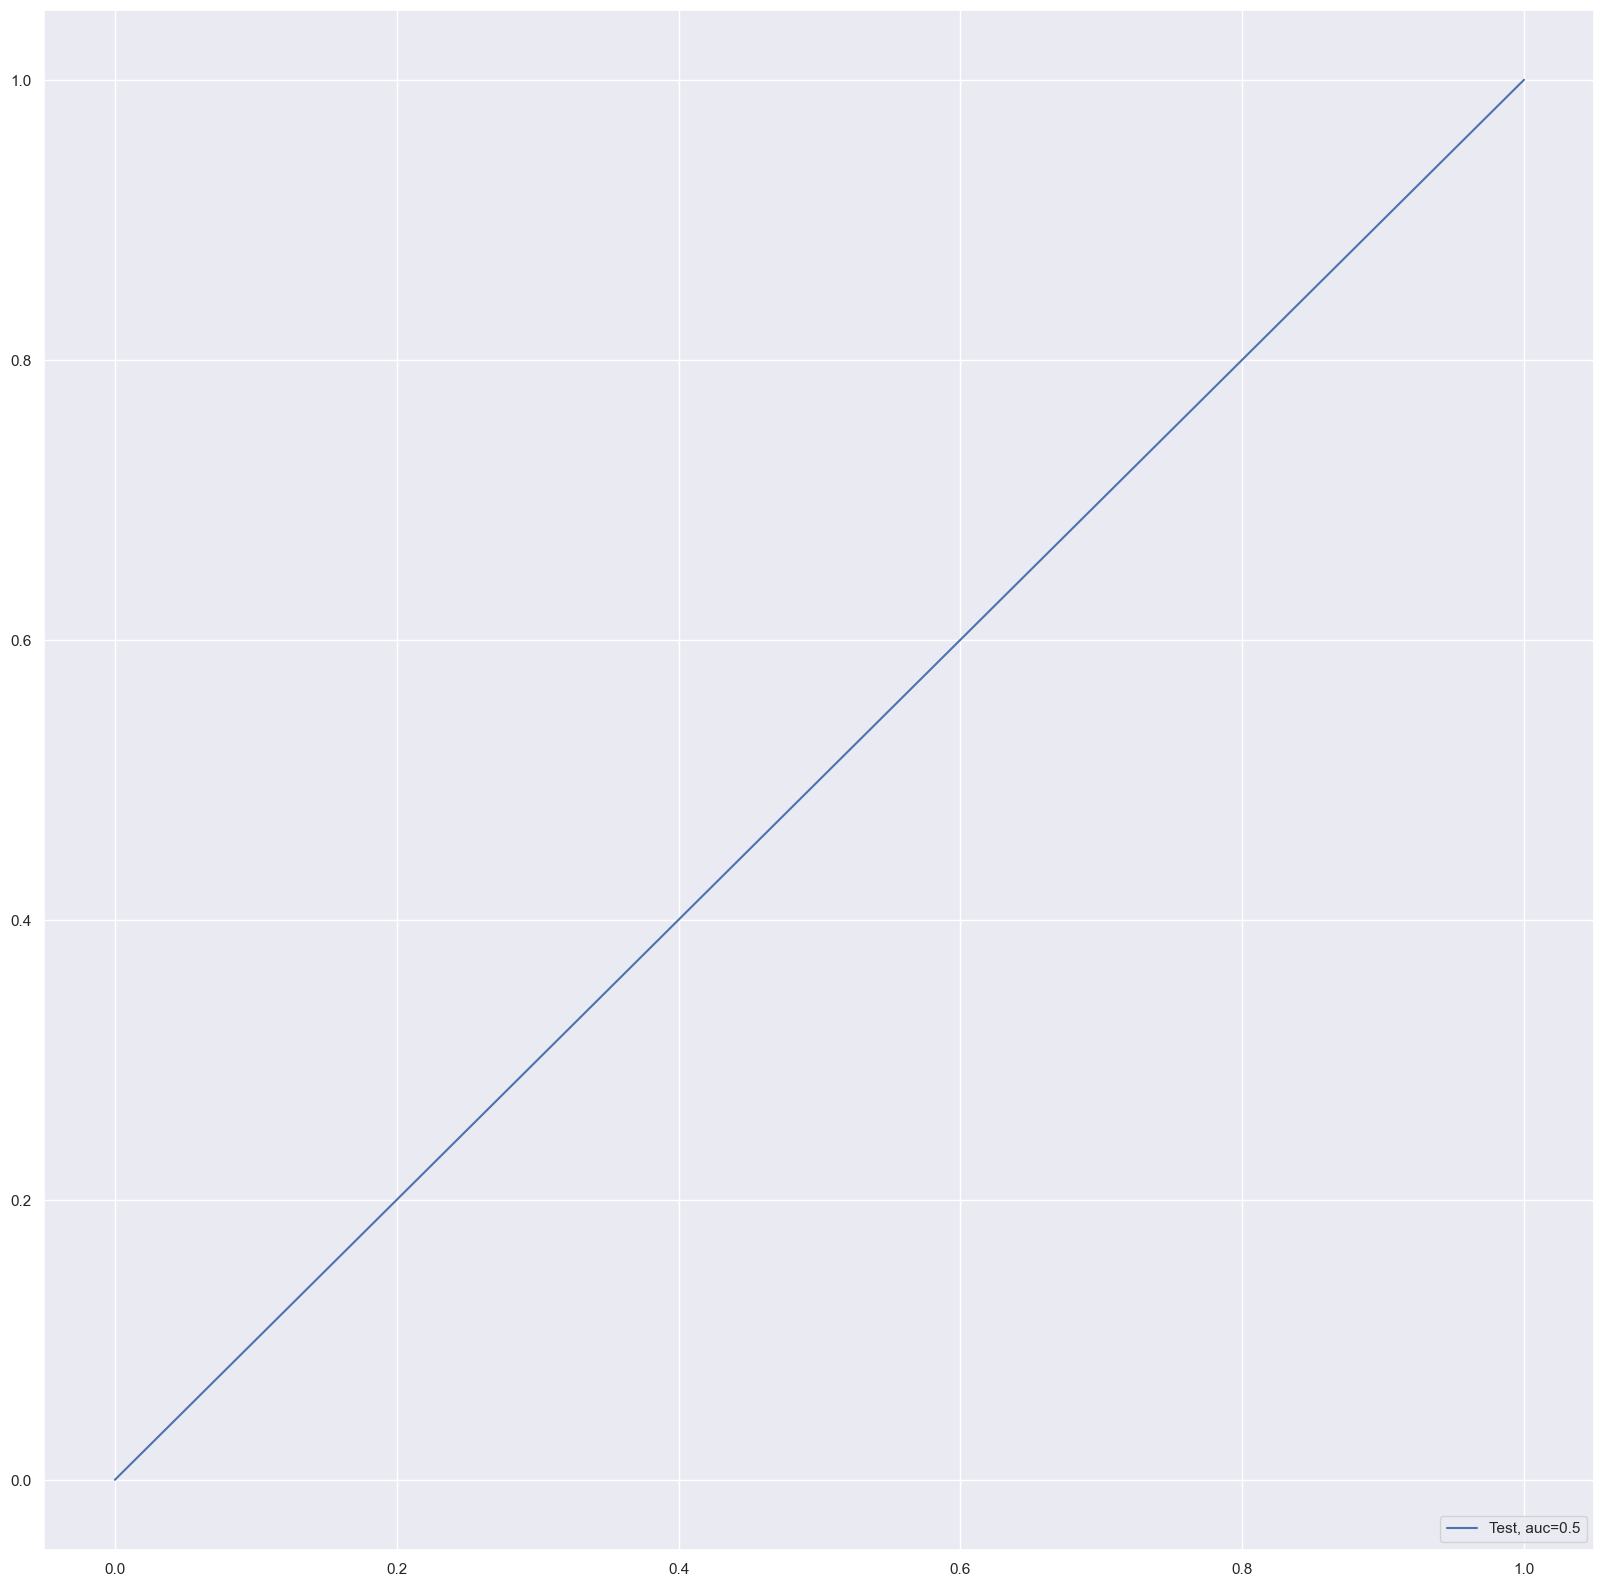

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


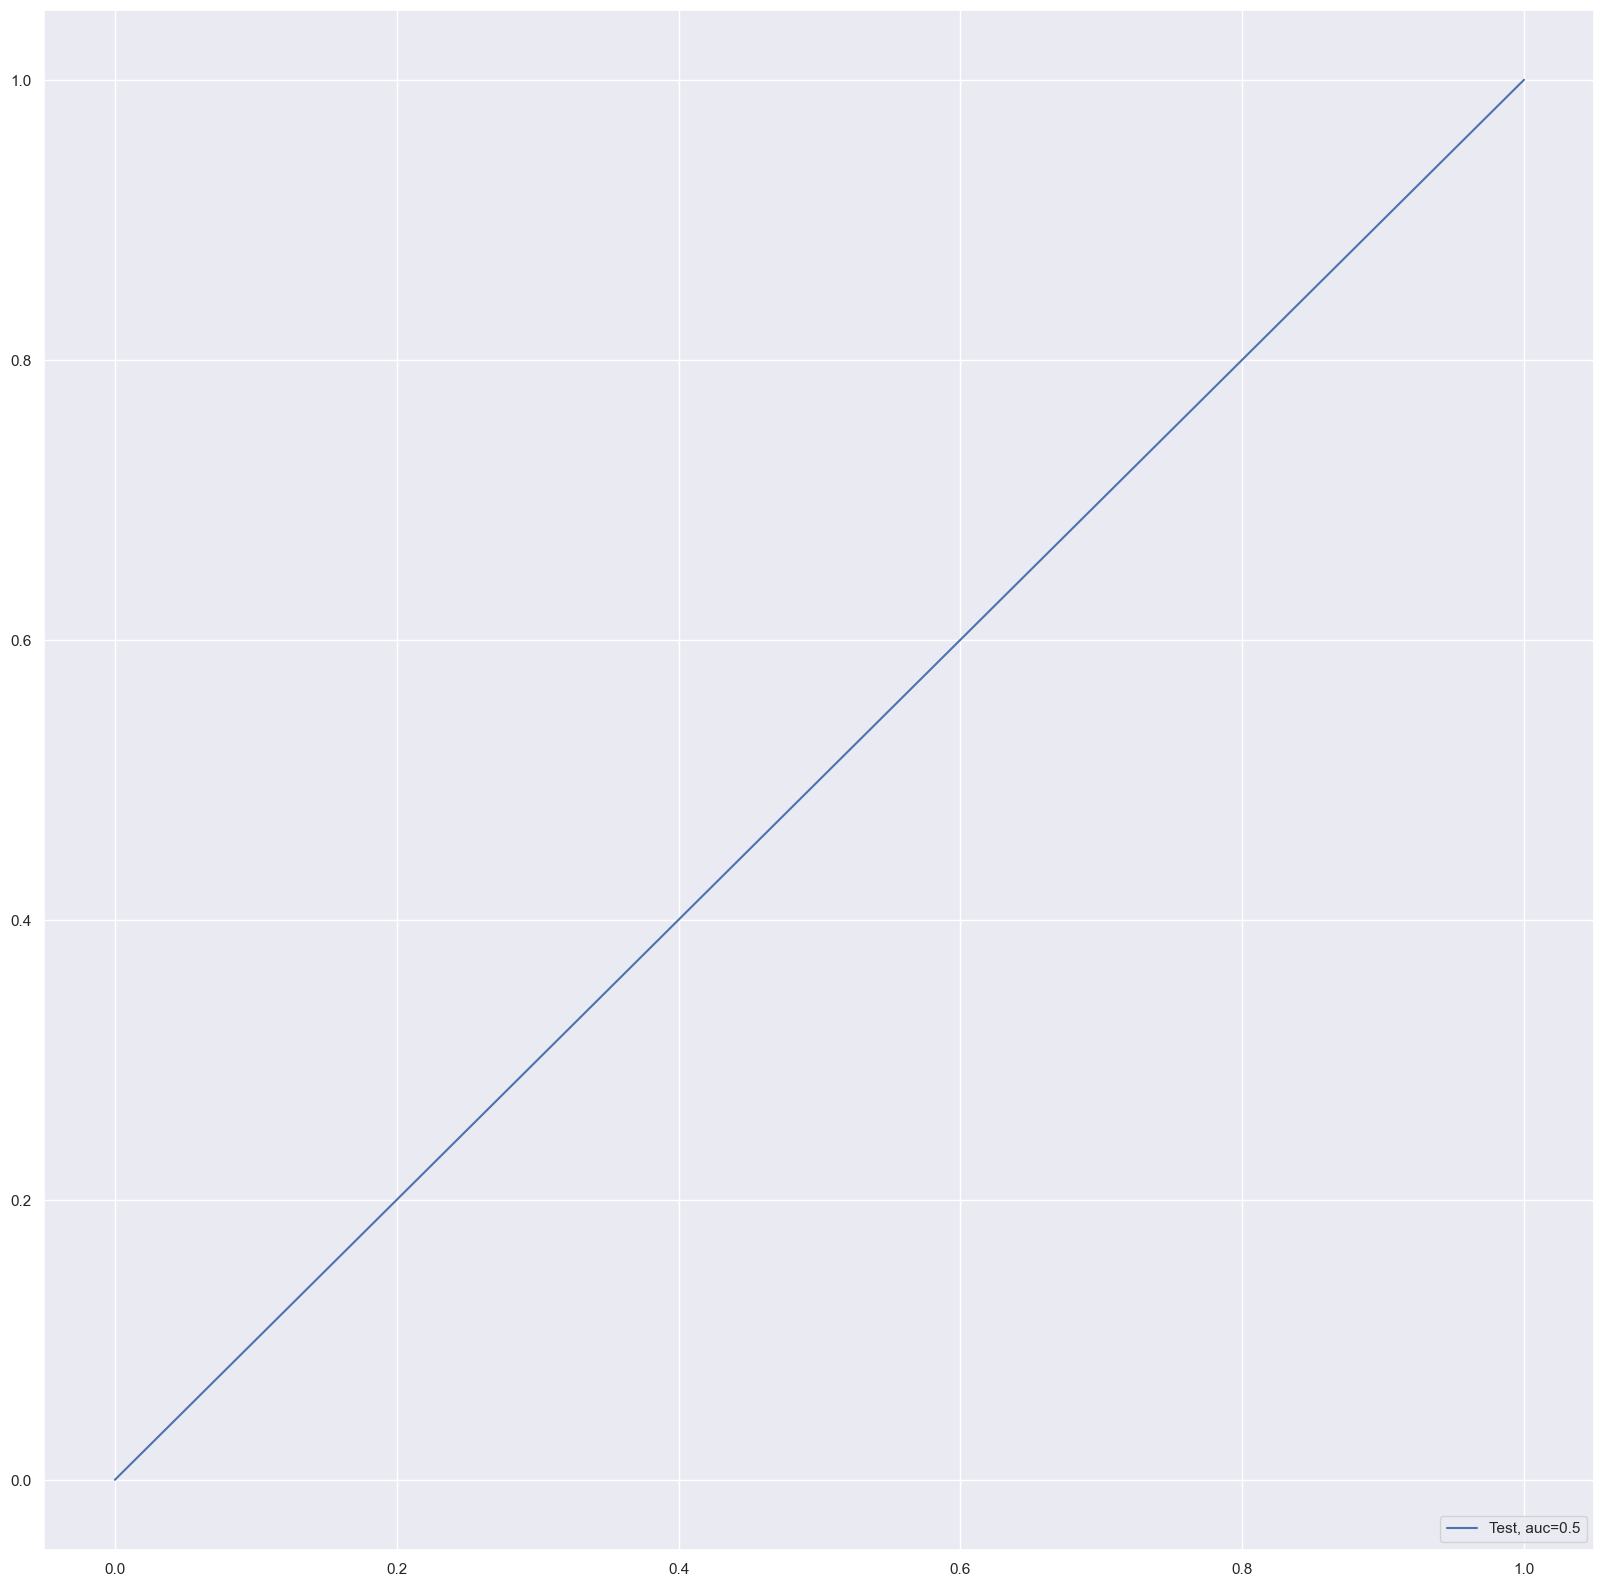

Time Taken by Model: --- 166.16202640533447 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


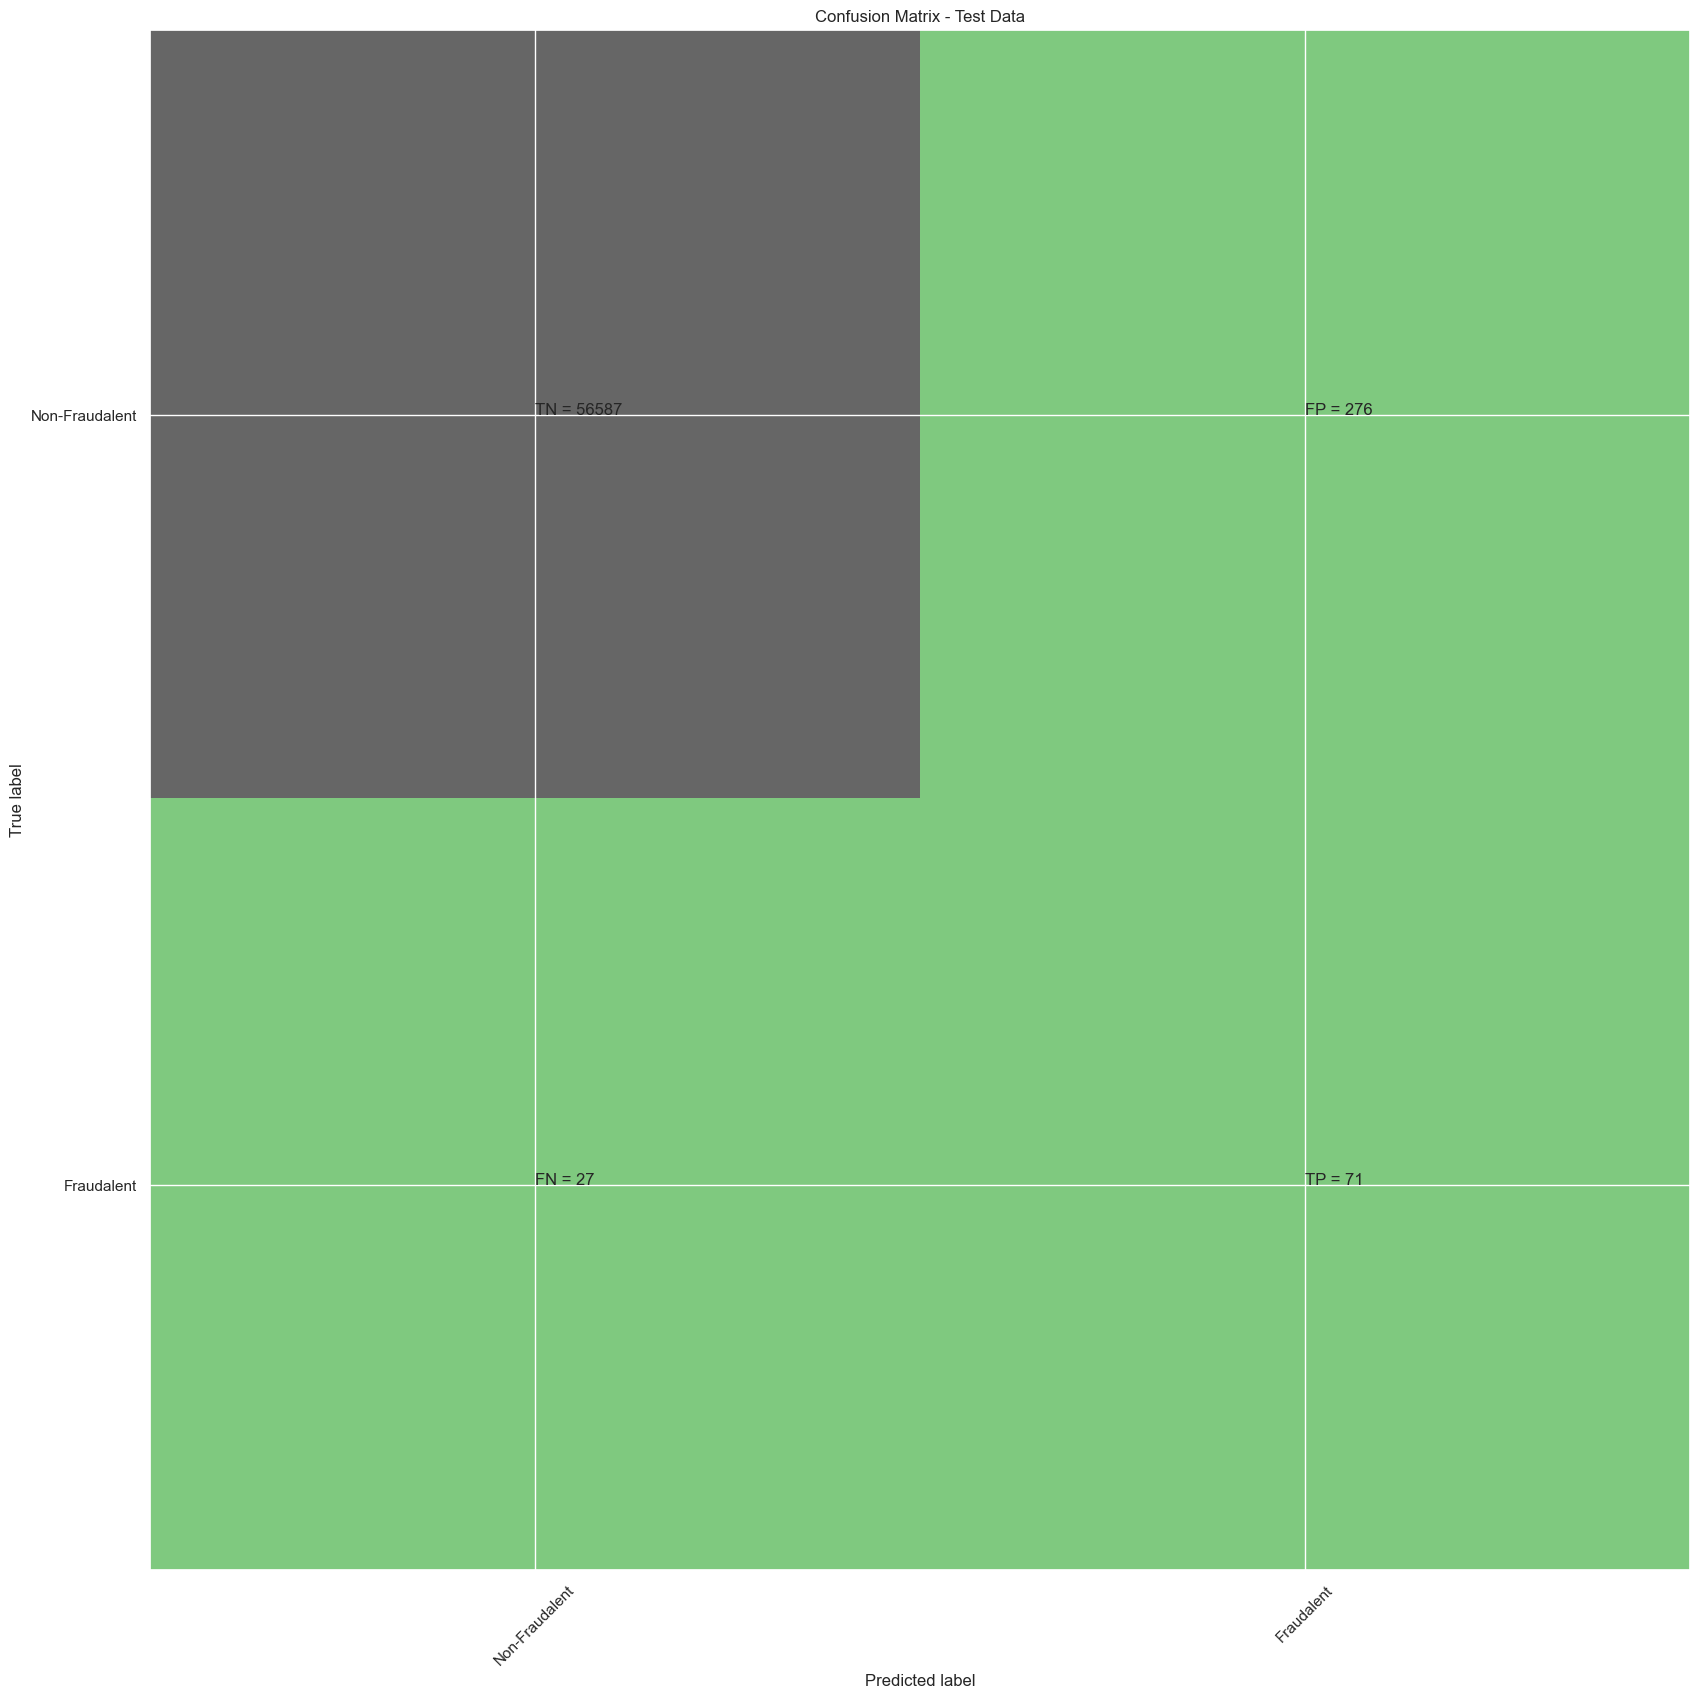

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


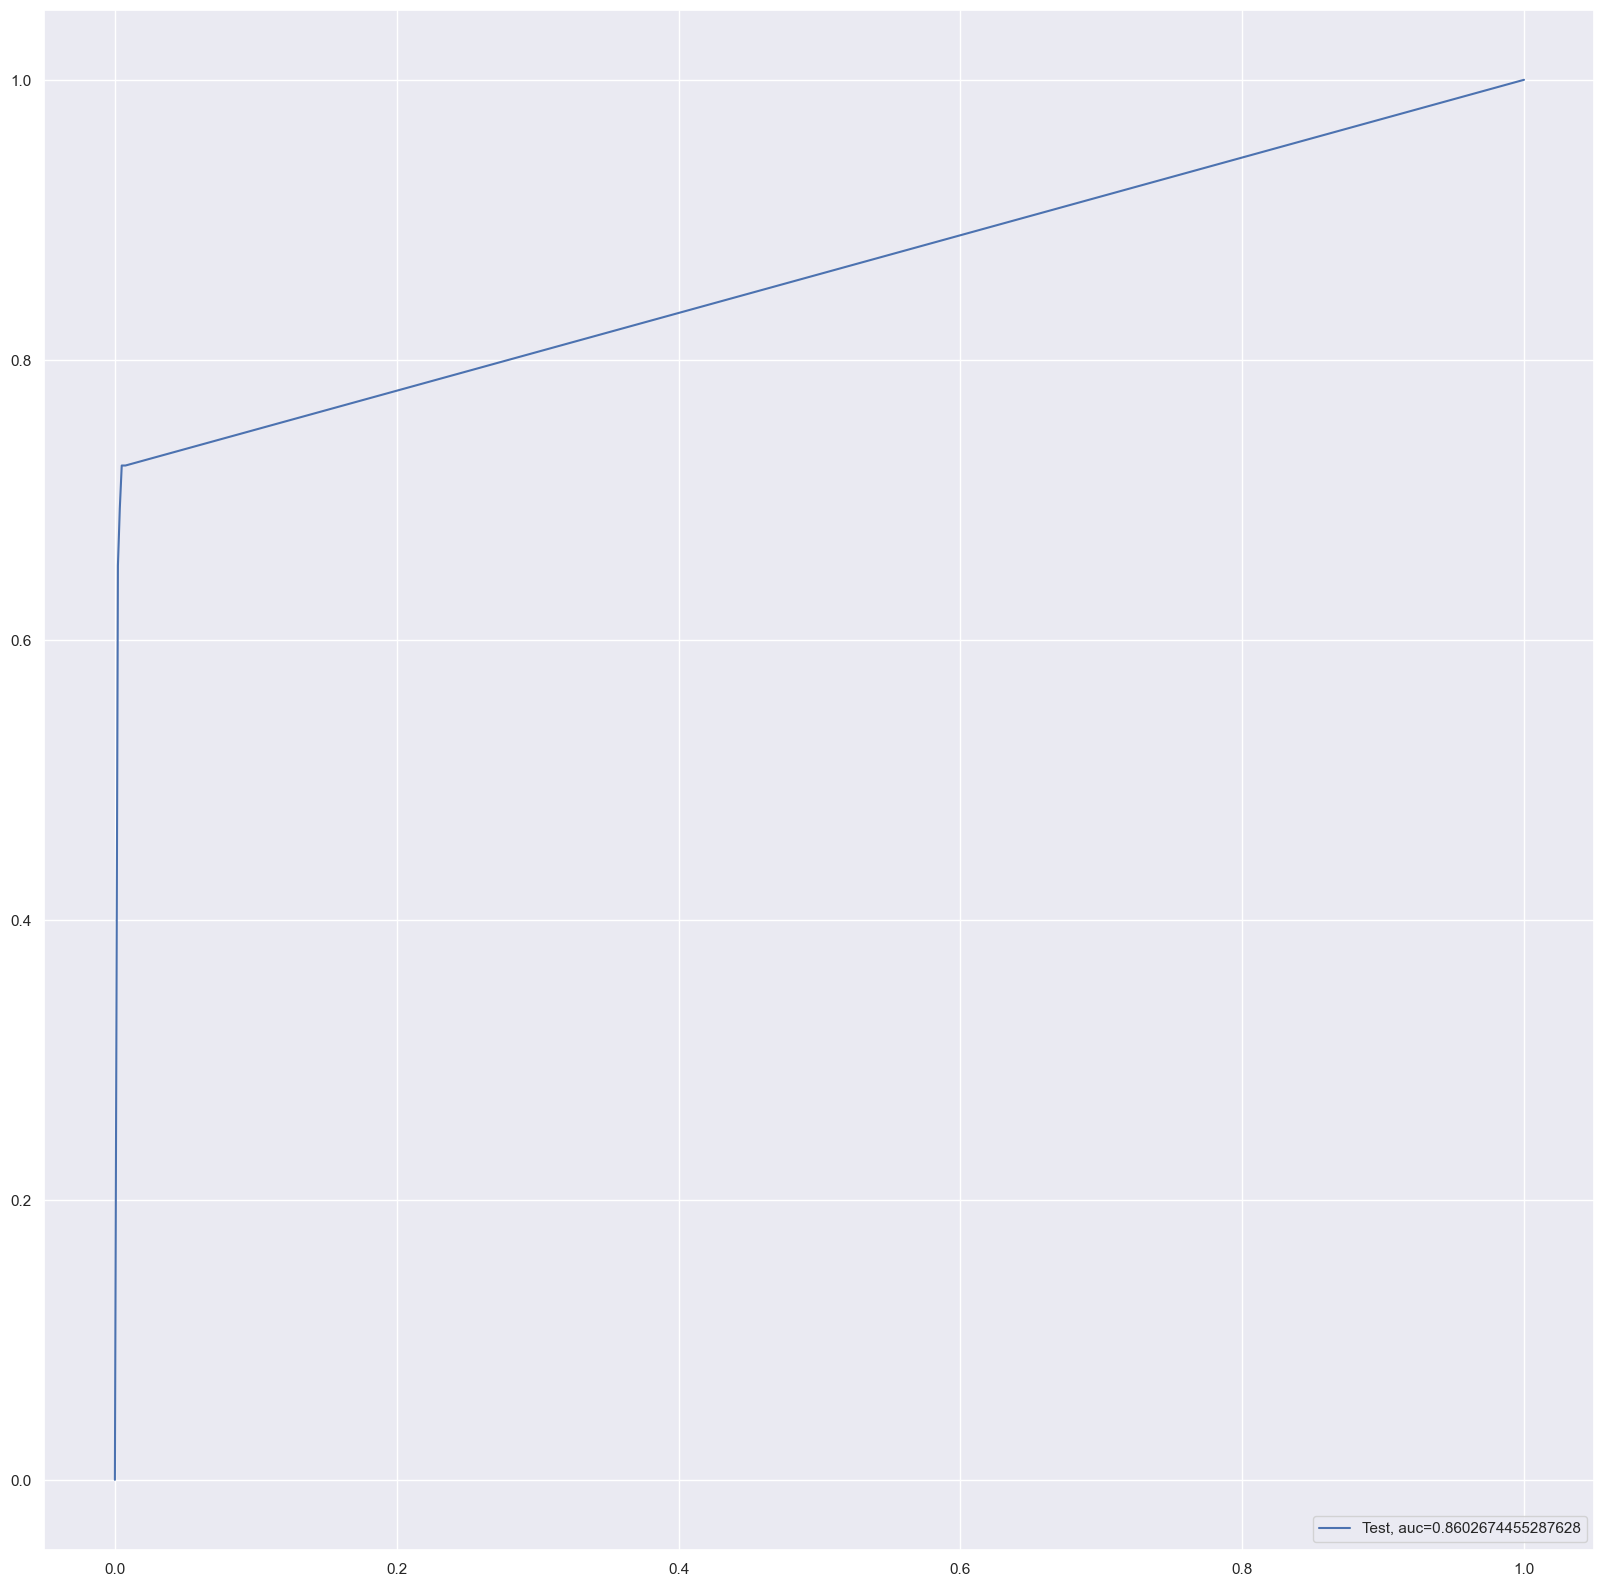

Time Taken by Model: --- 229.9298858642578 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


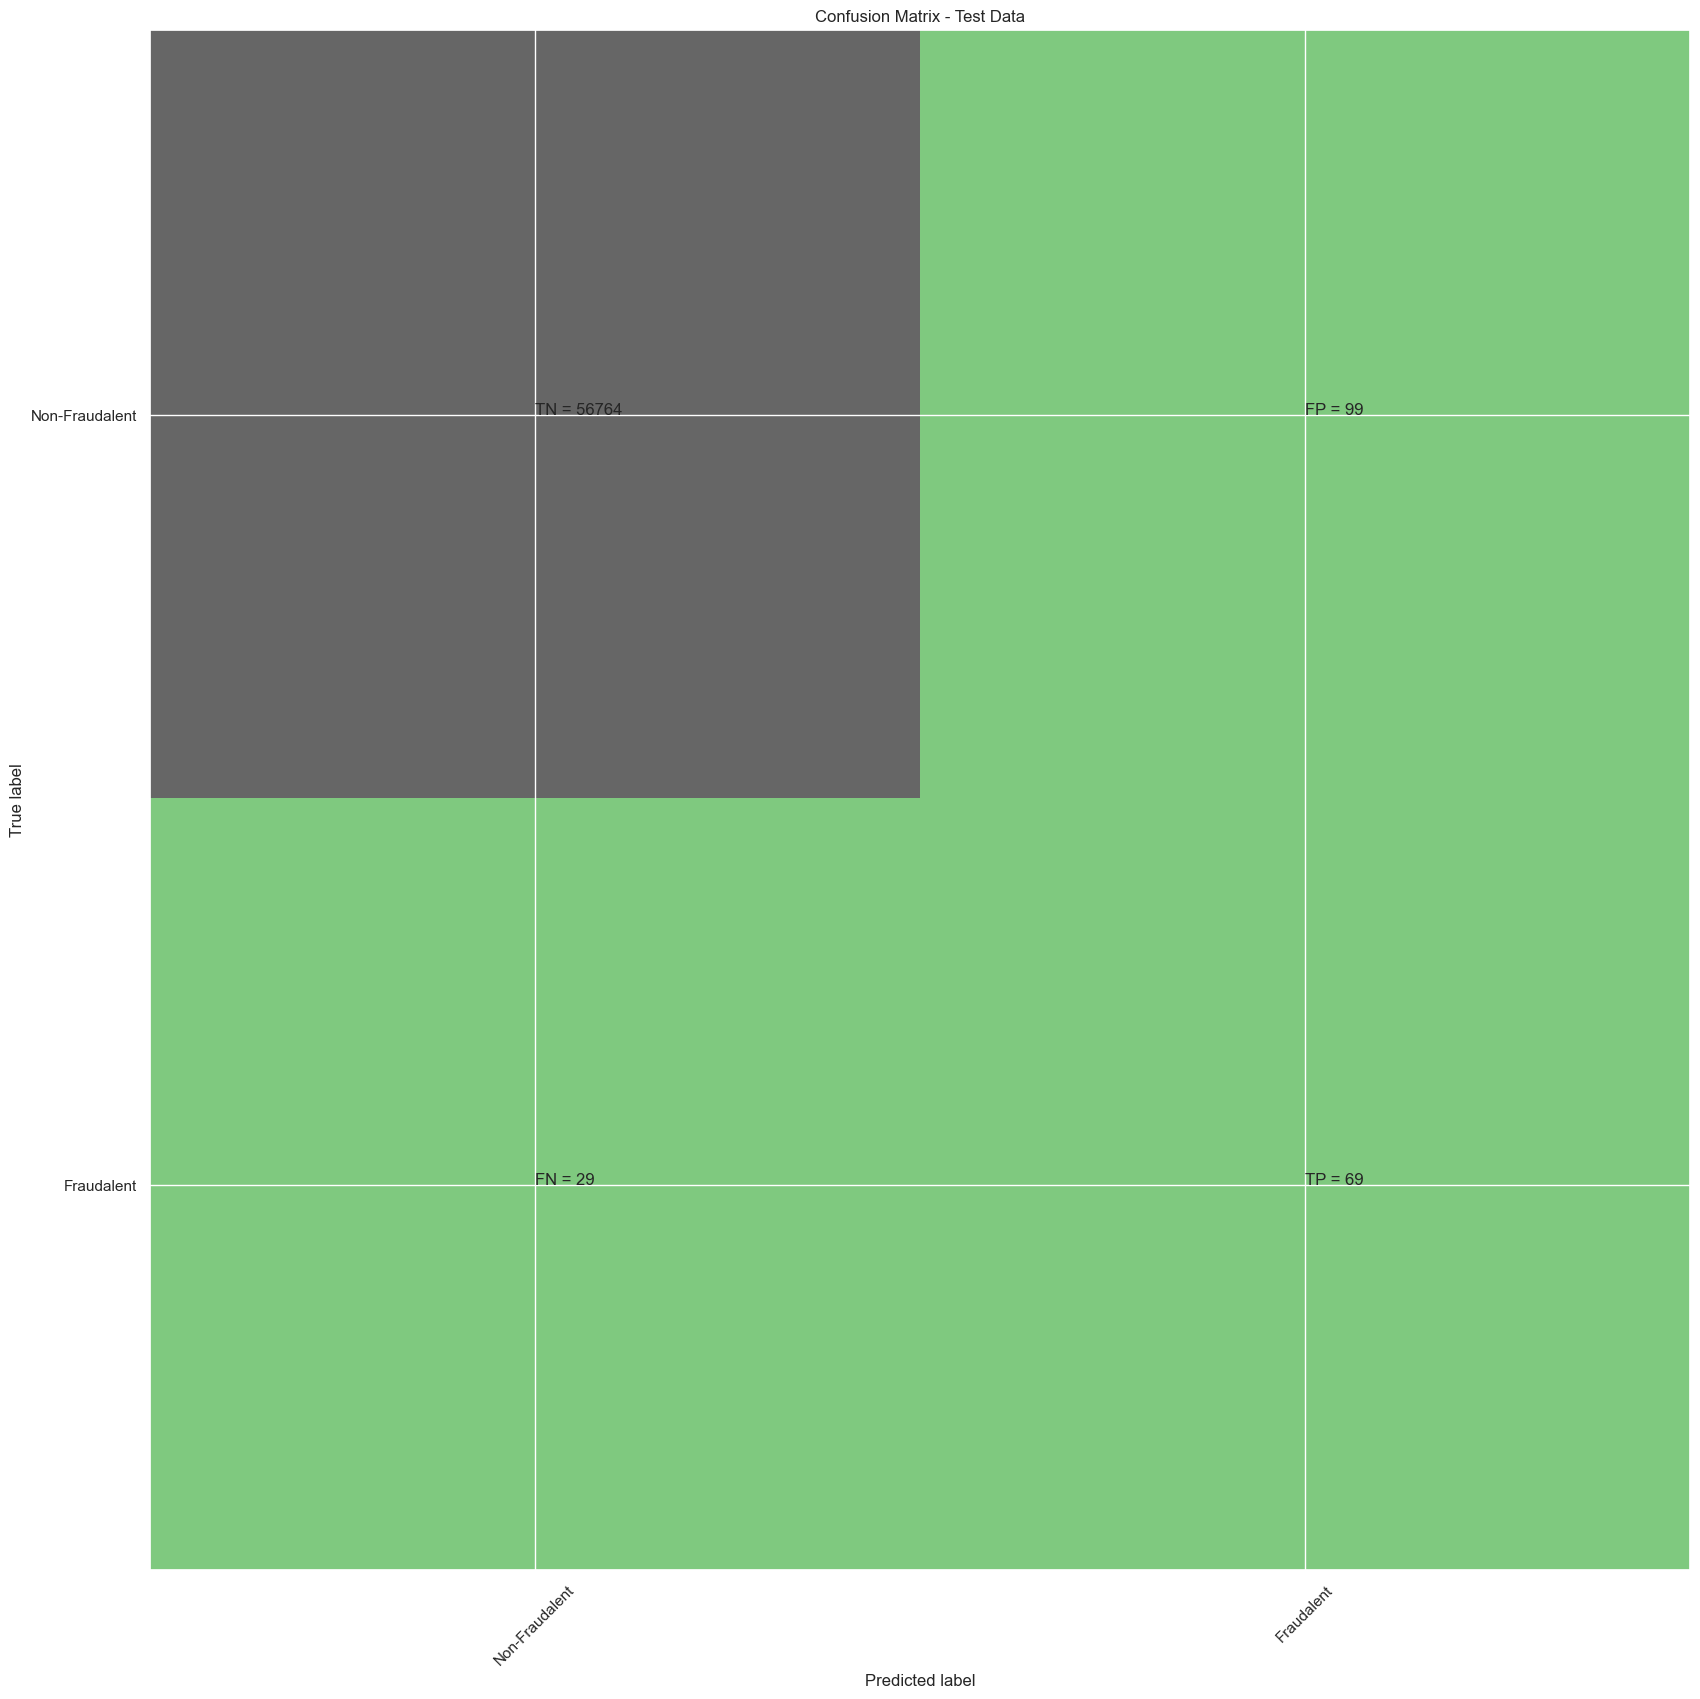

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


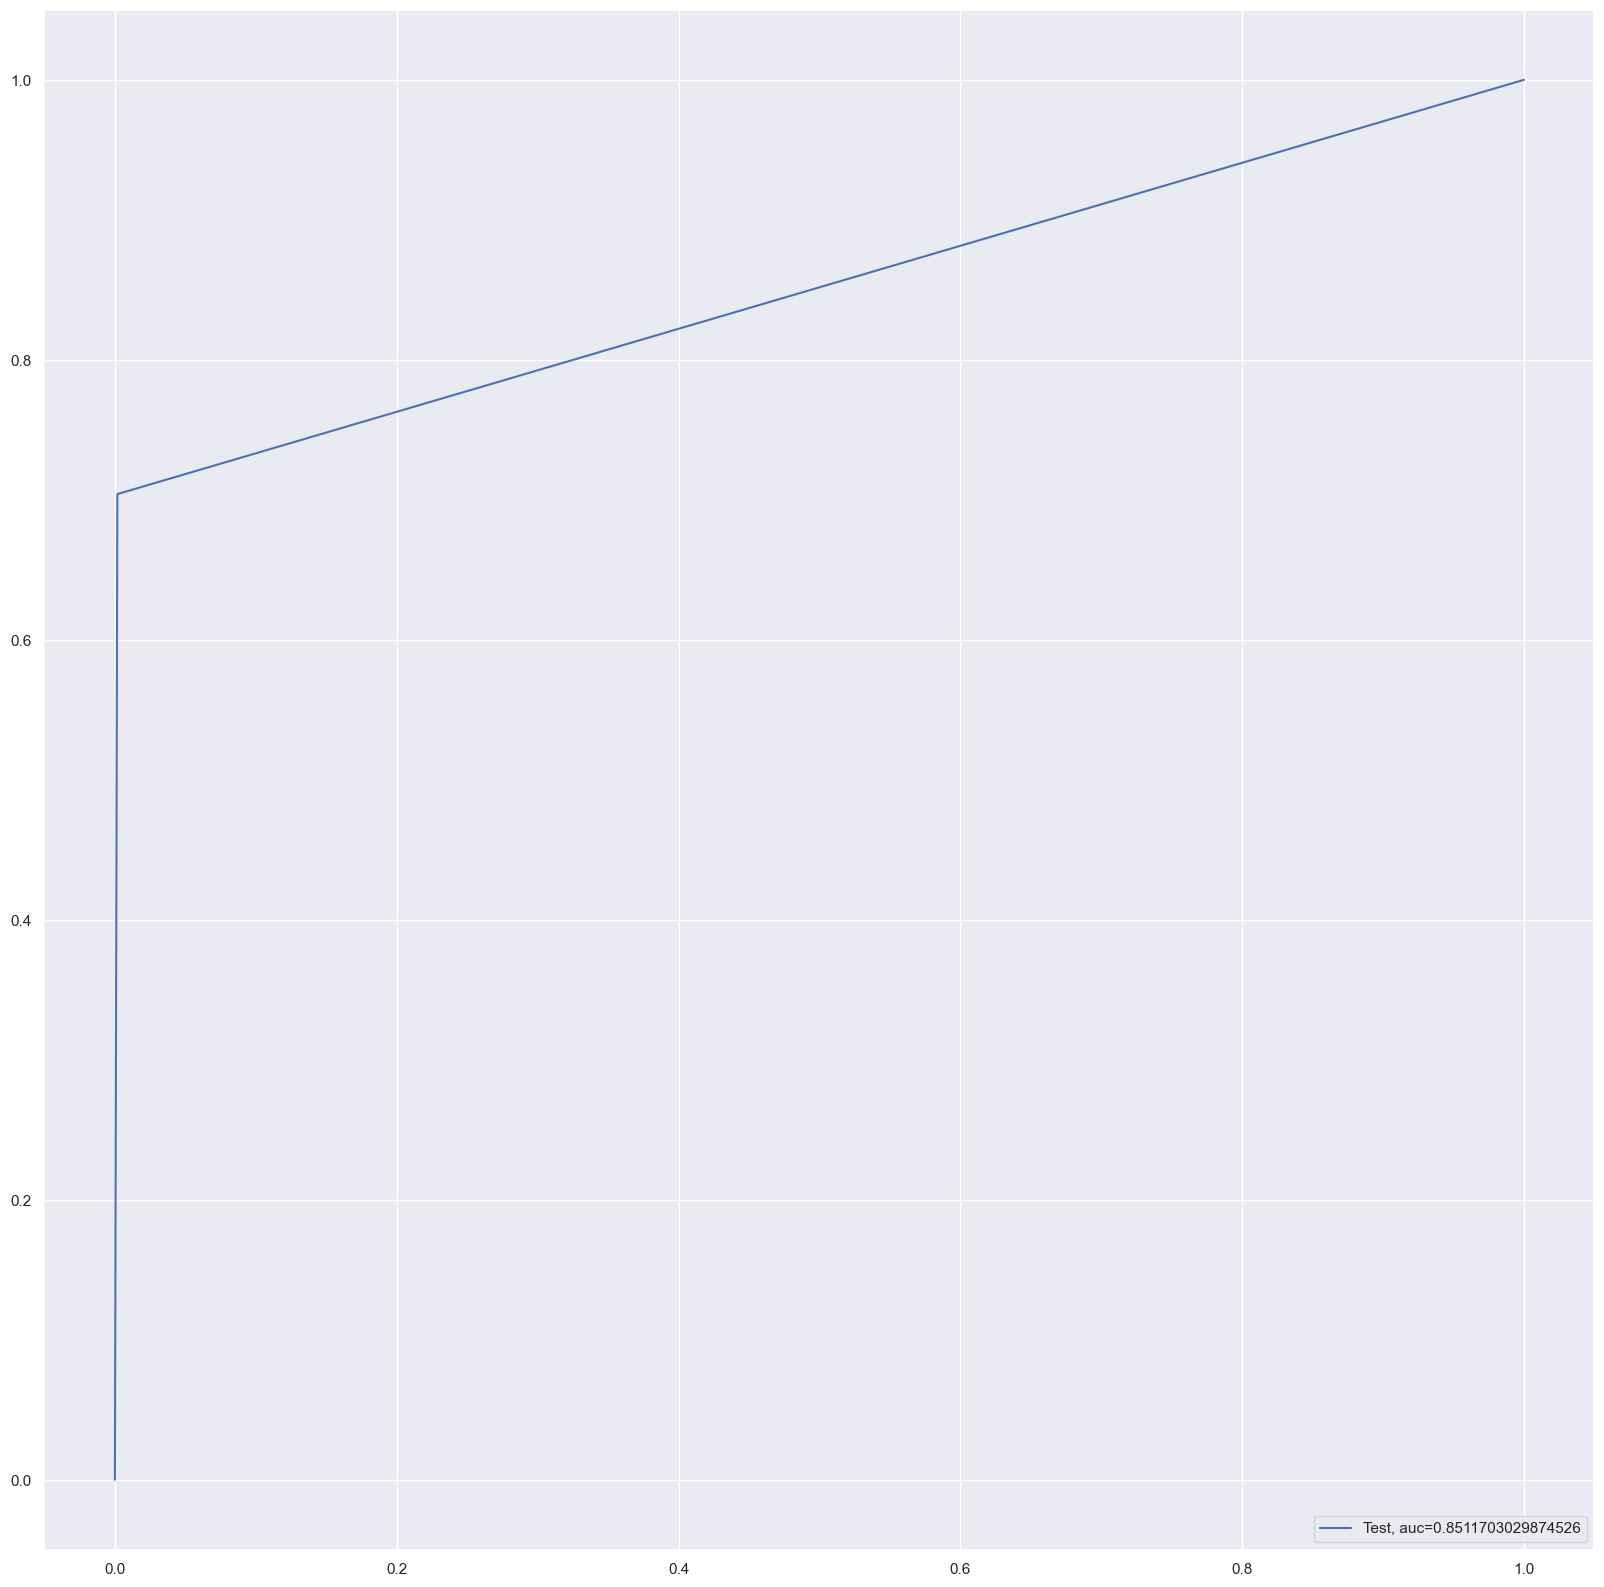

entropy score: 0.9969803900914661
Confusion Matrix


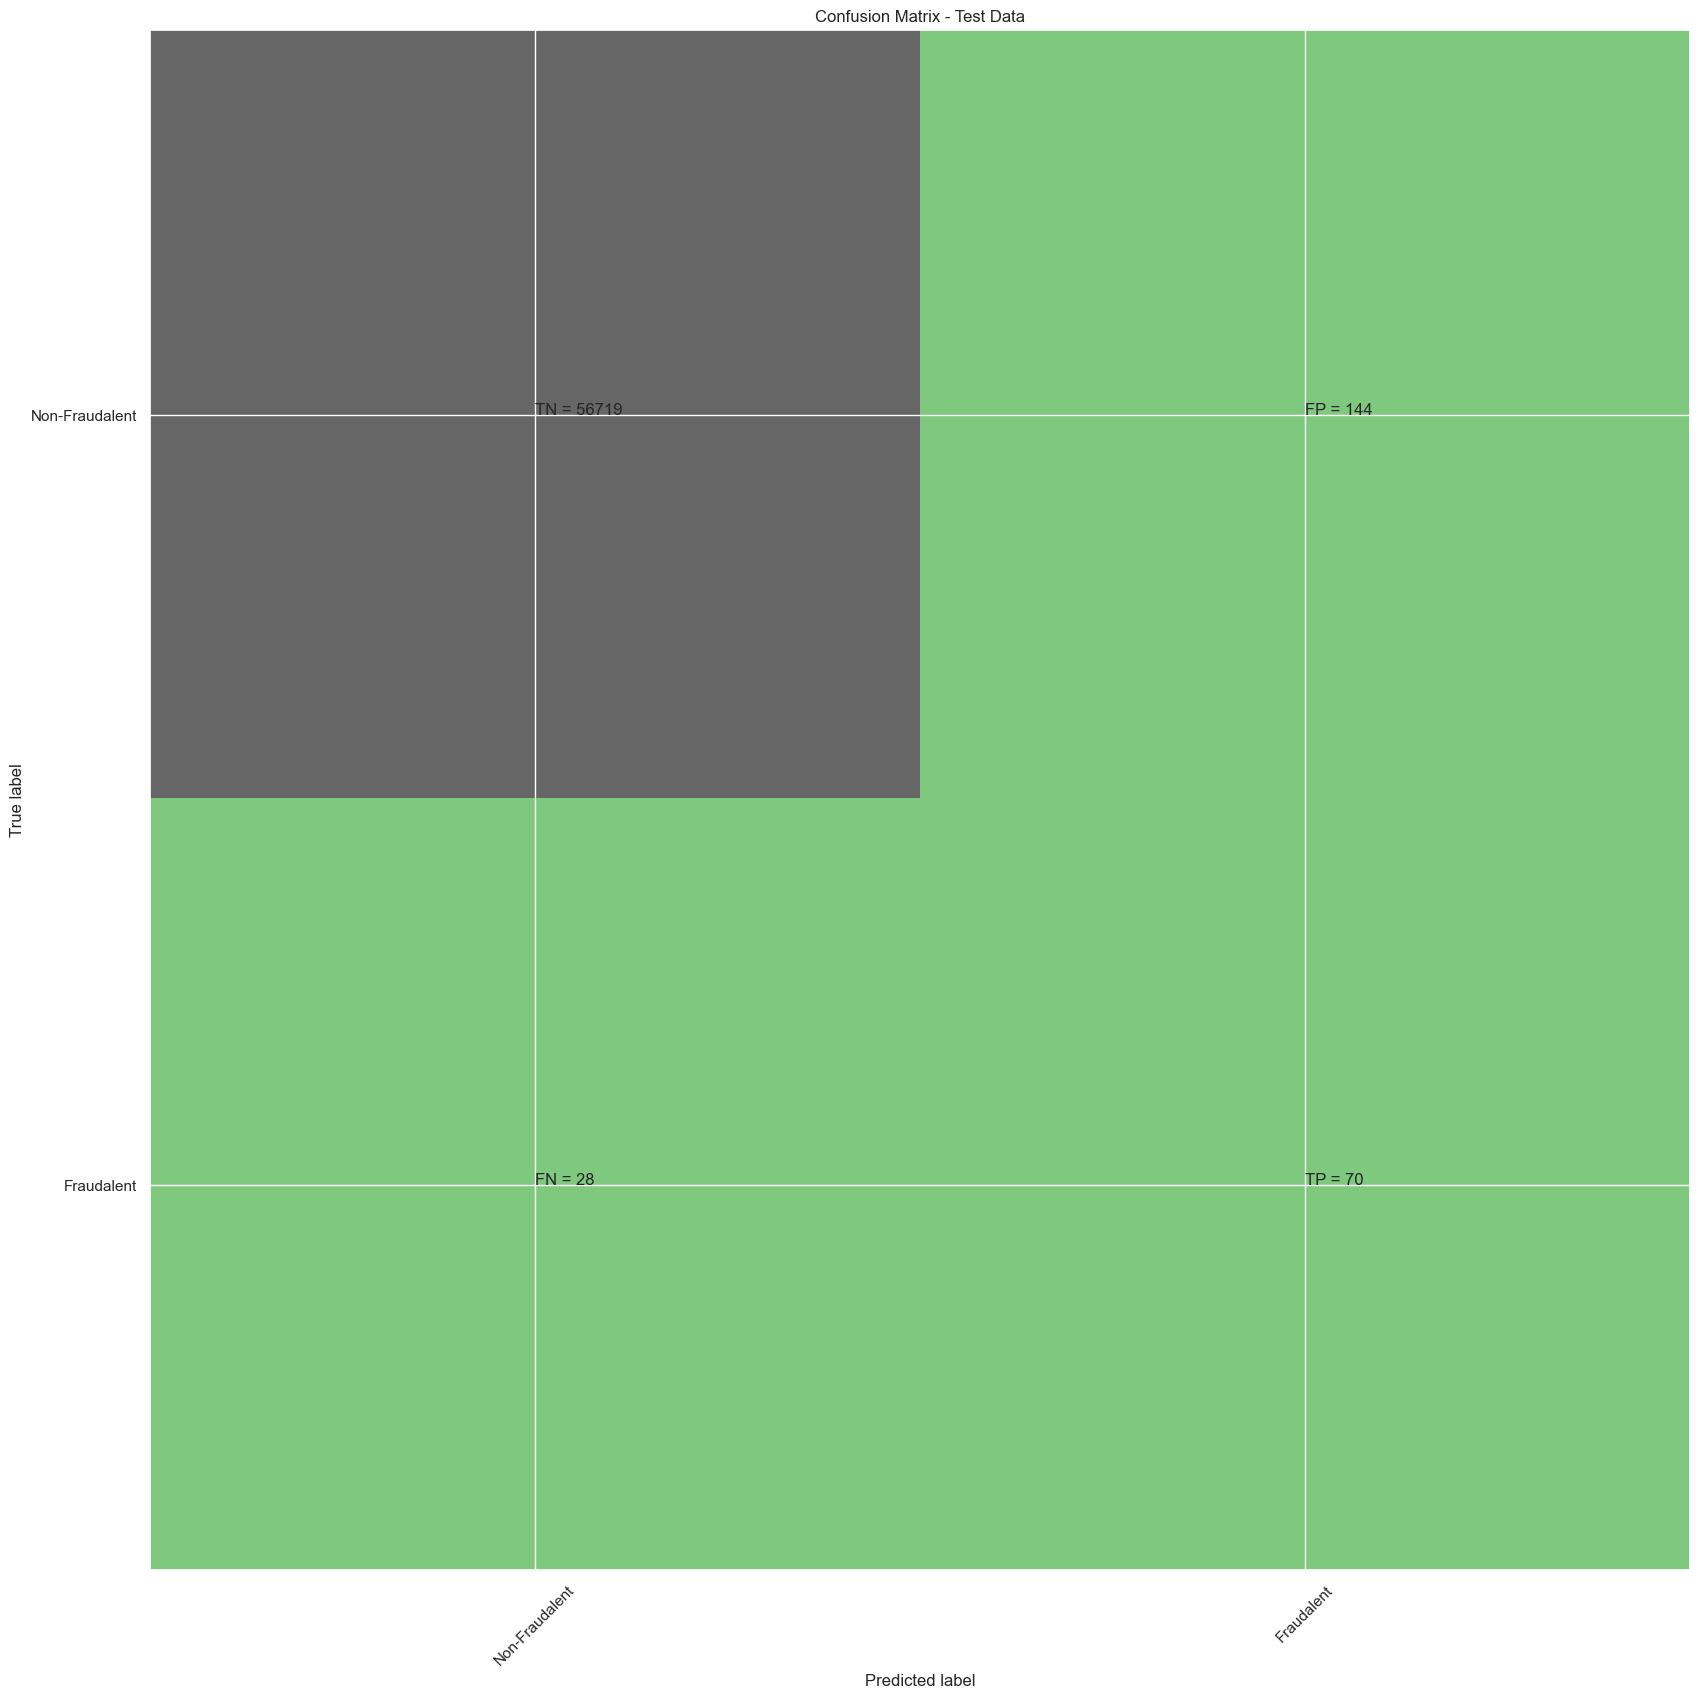

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


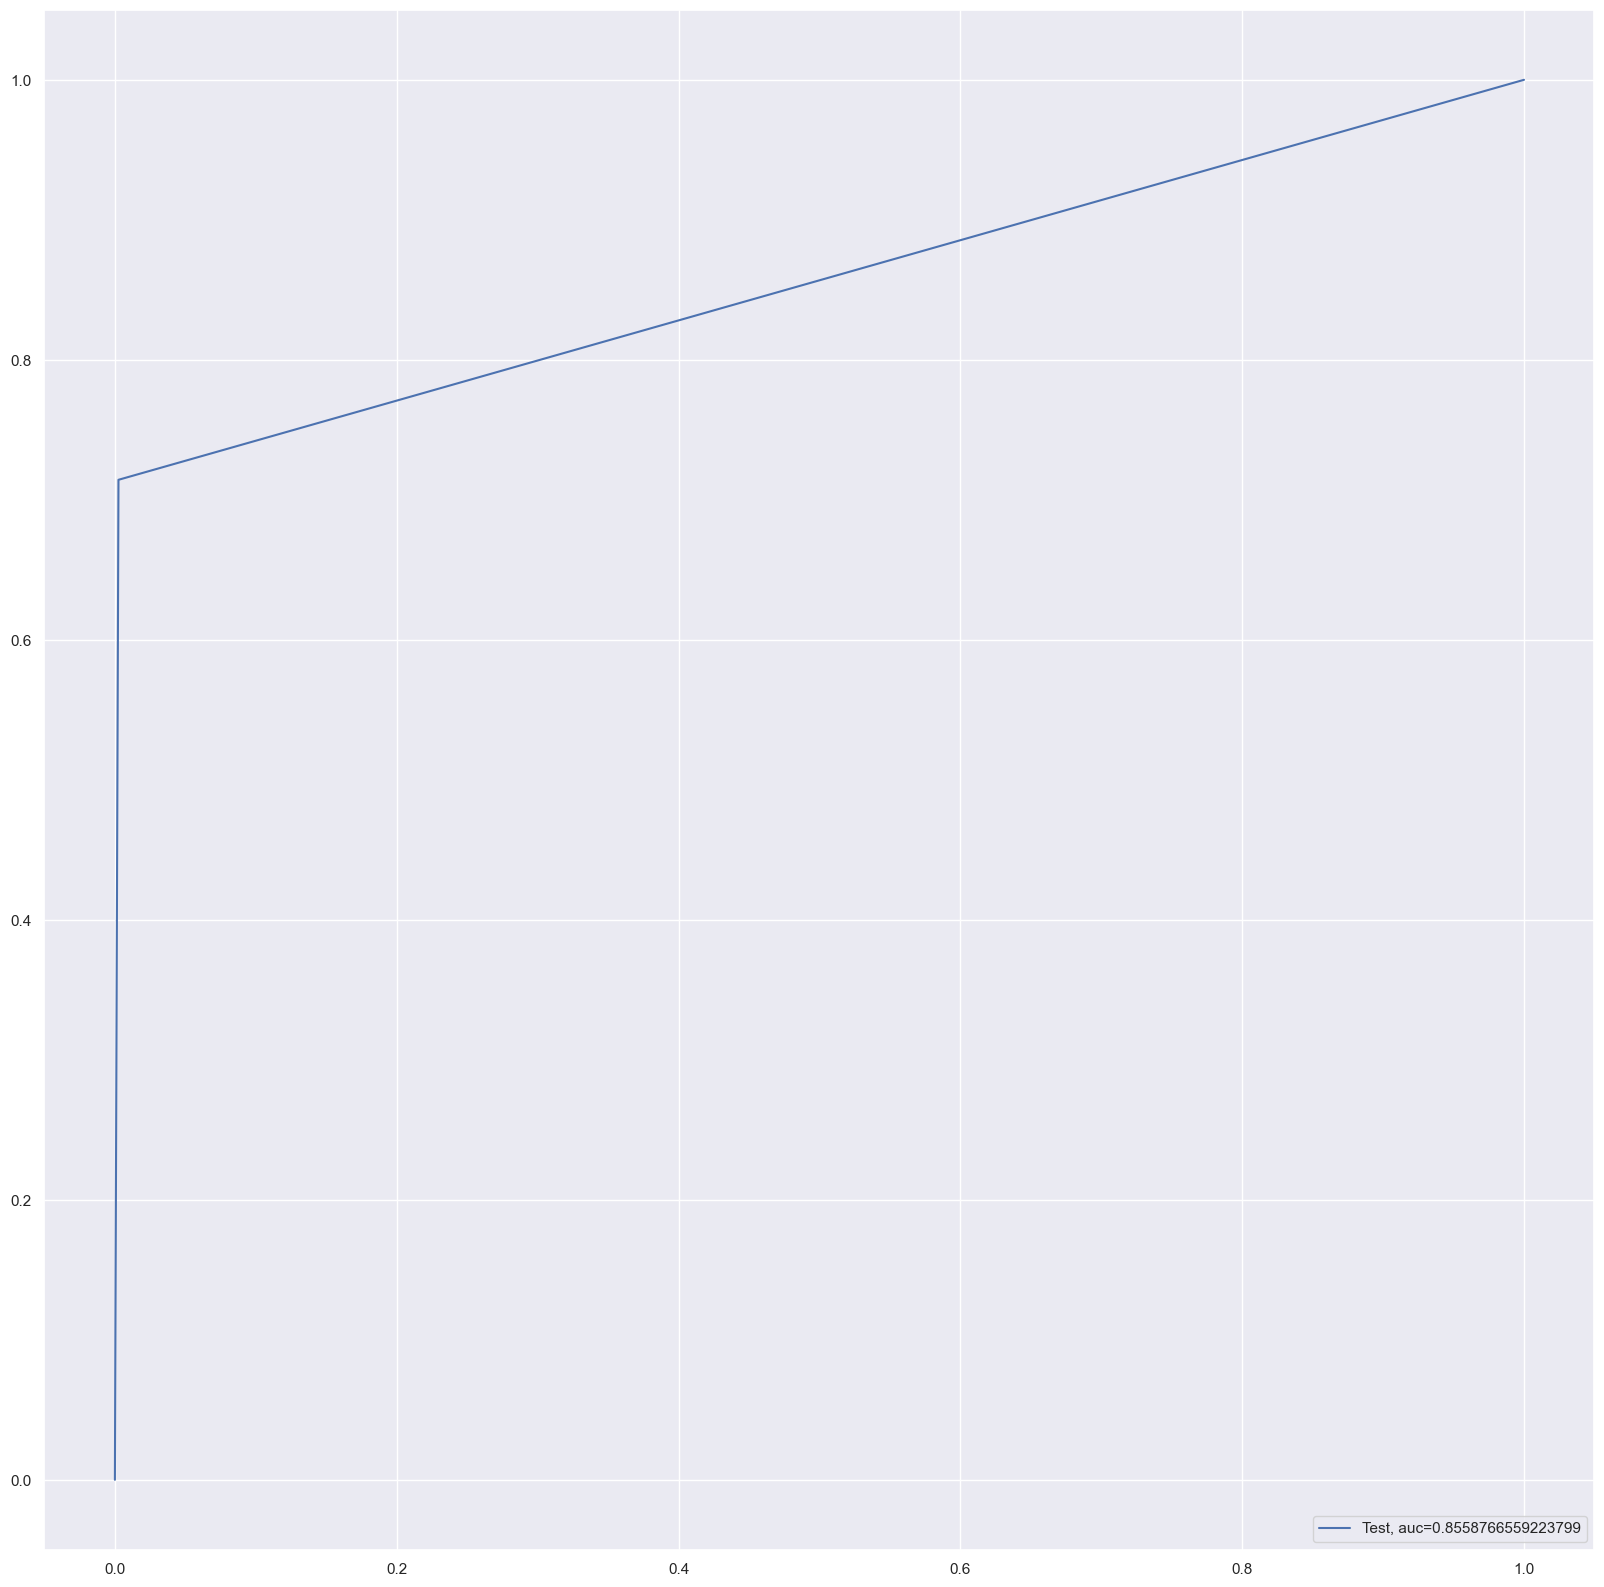

Time Taken by Model: --- 150.36503171920776 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


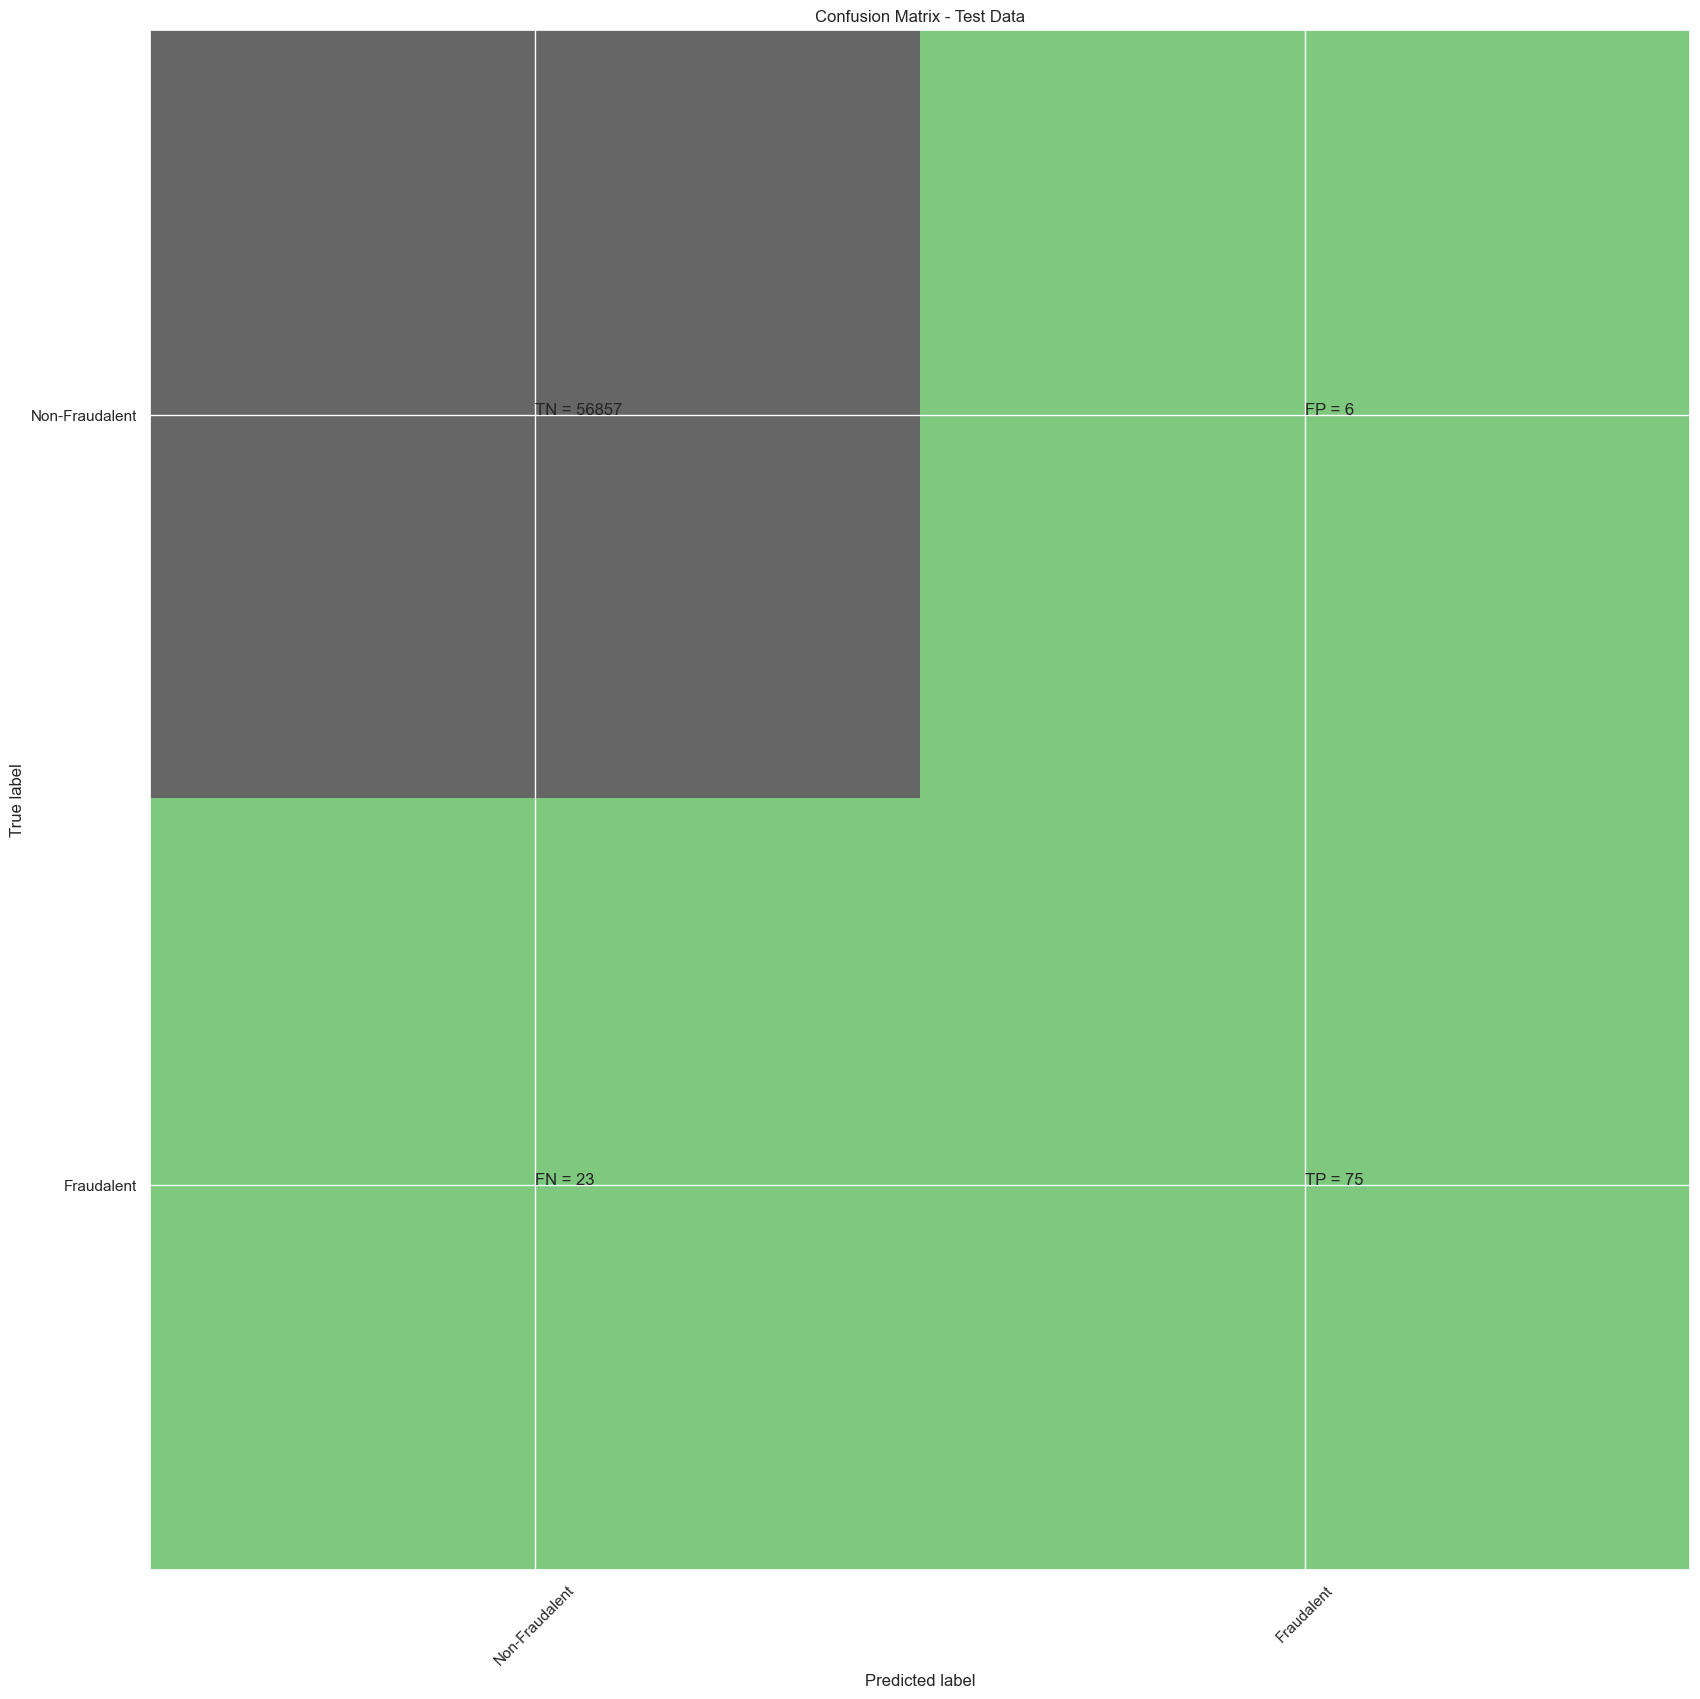

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


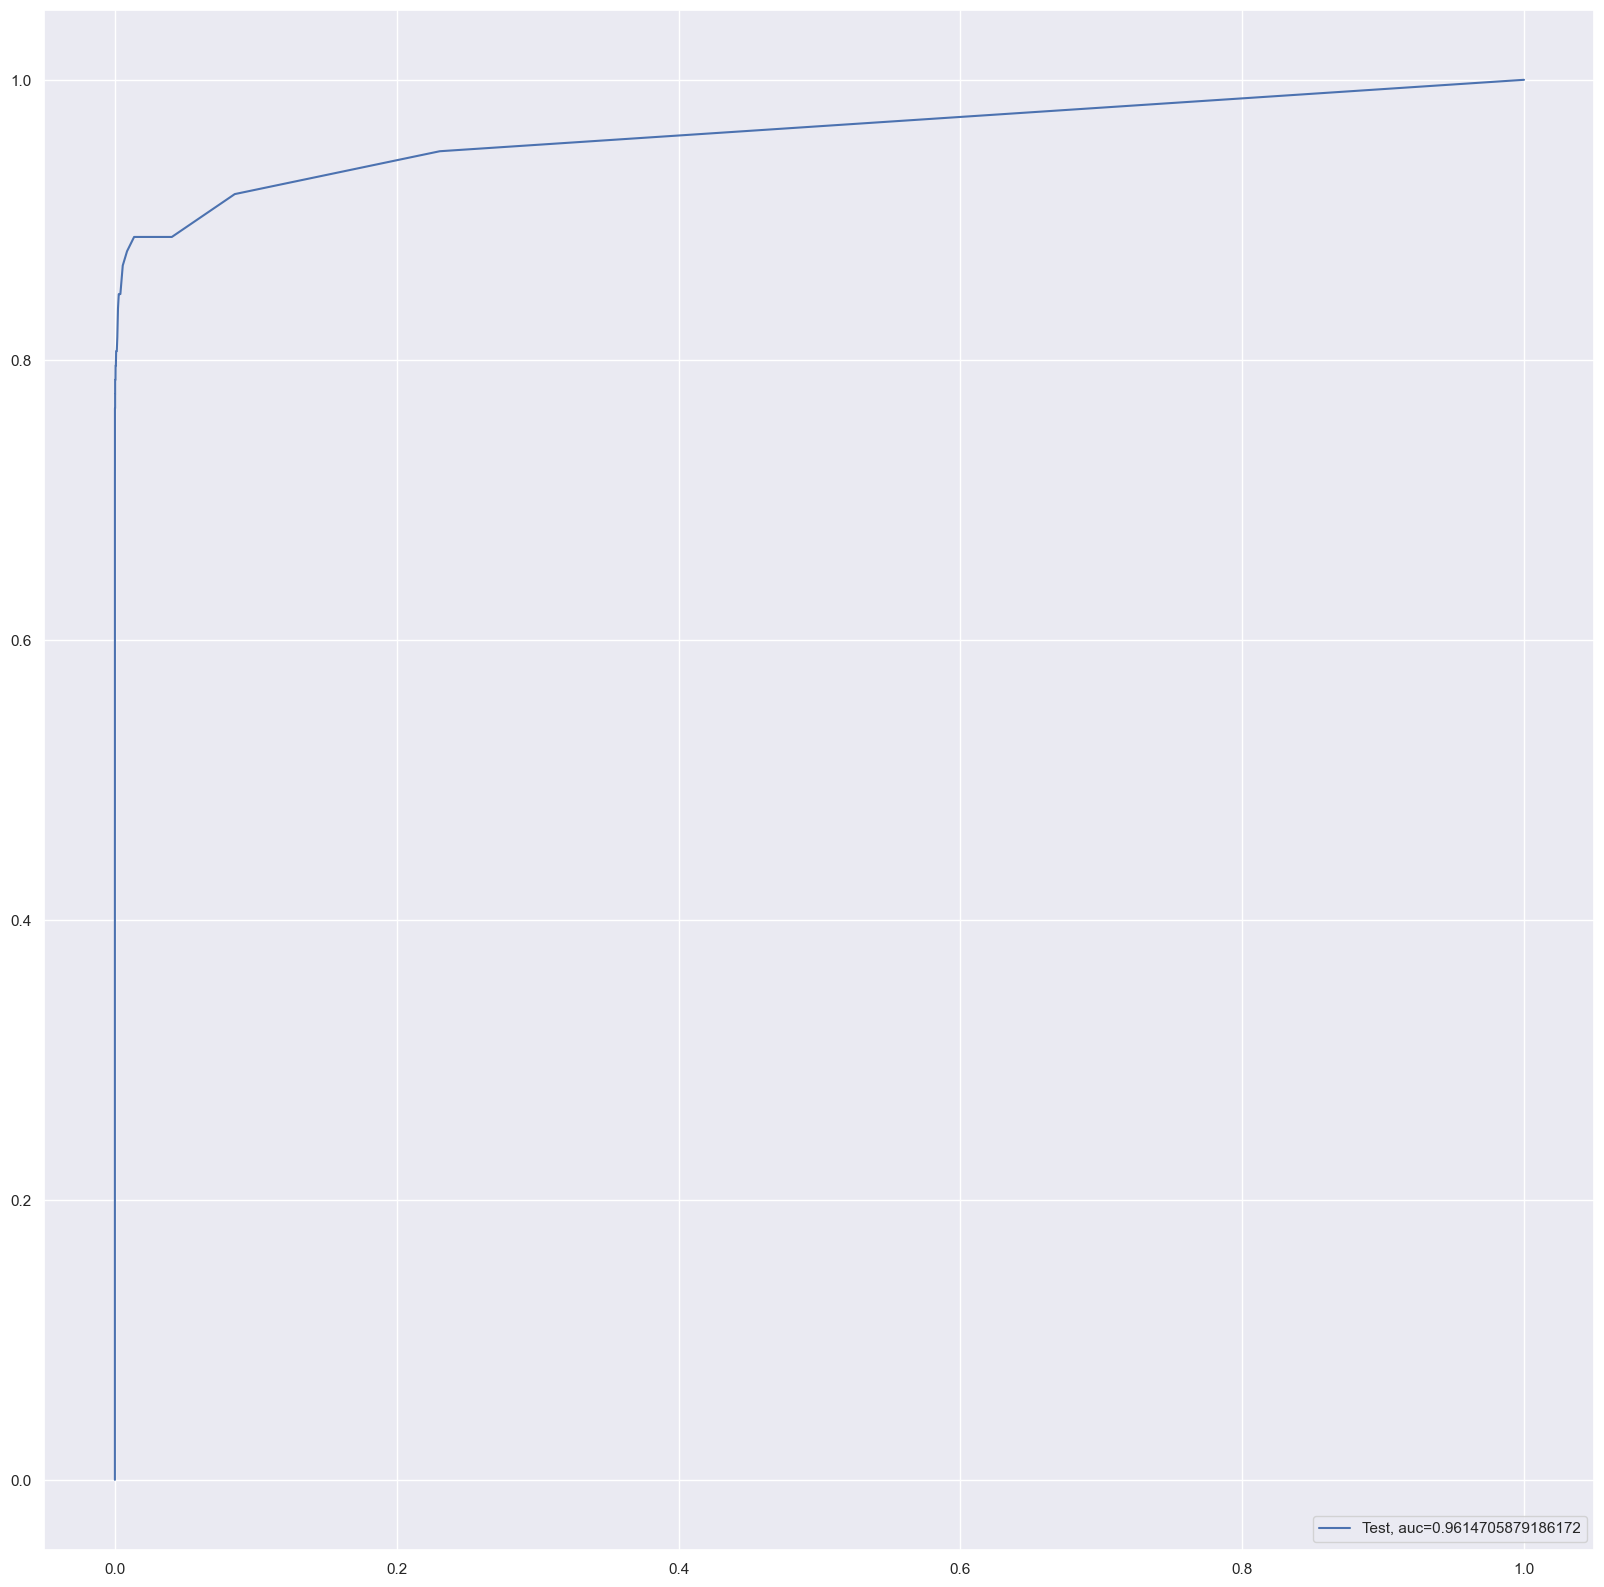

Time Taken by Model: --- 863.3103094100952 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


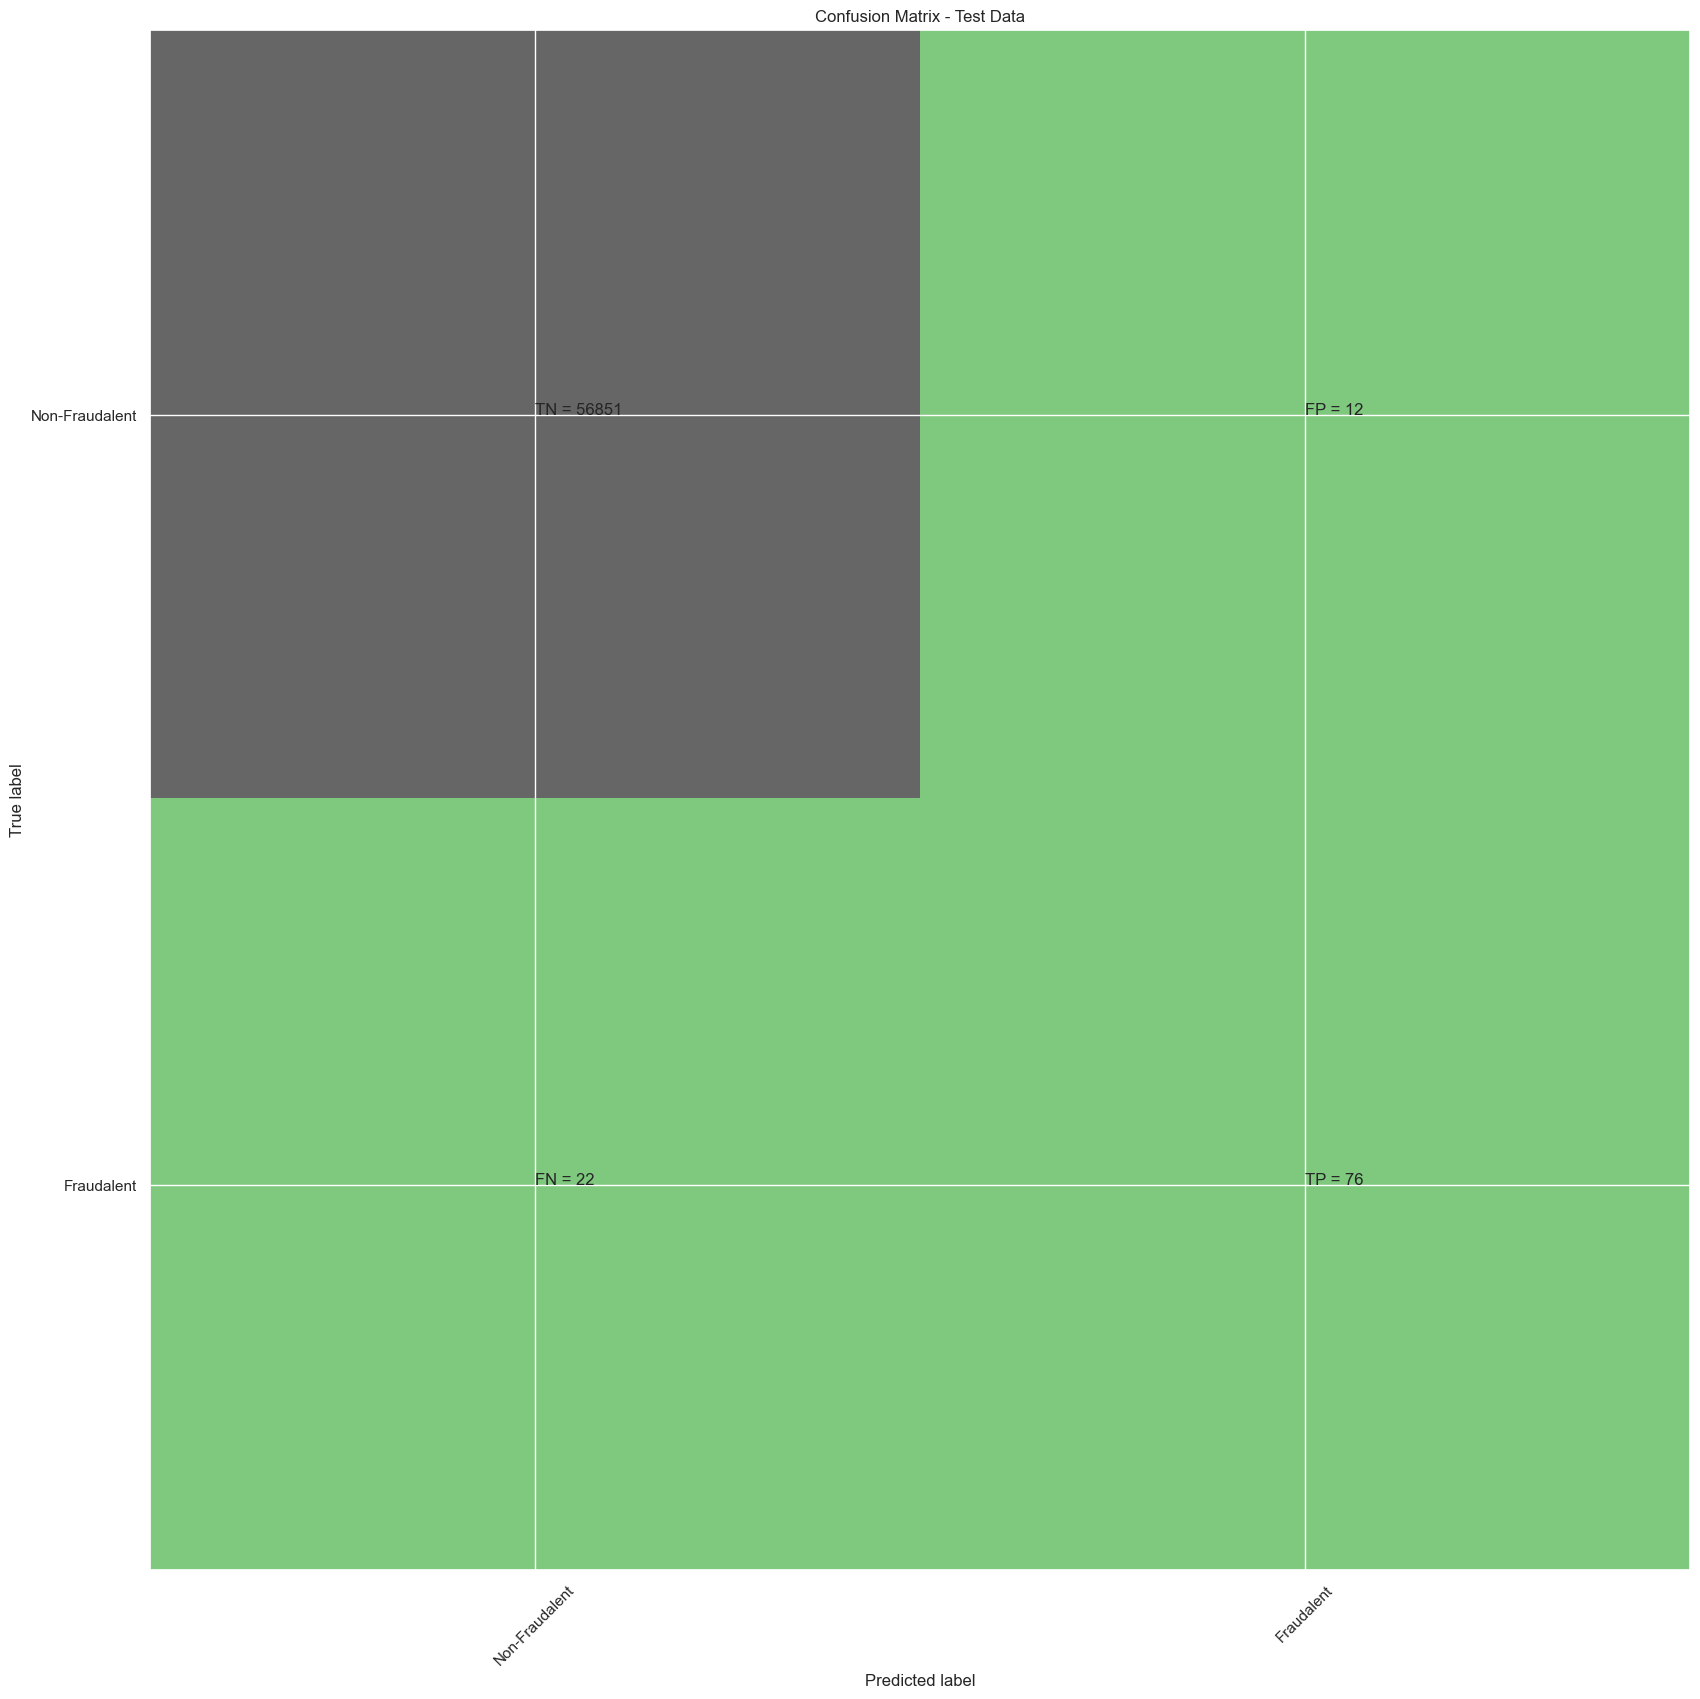

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9704734293344512
XGBoost threshold: 0.000144163059303537
ROC for the test dataset 97.0%


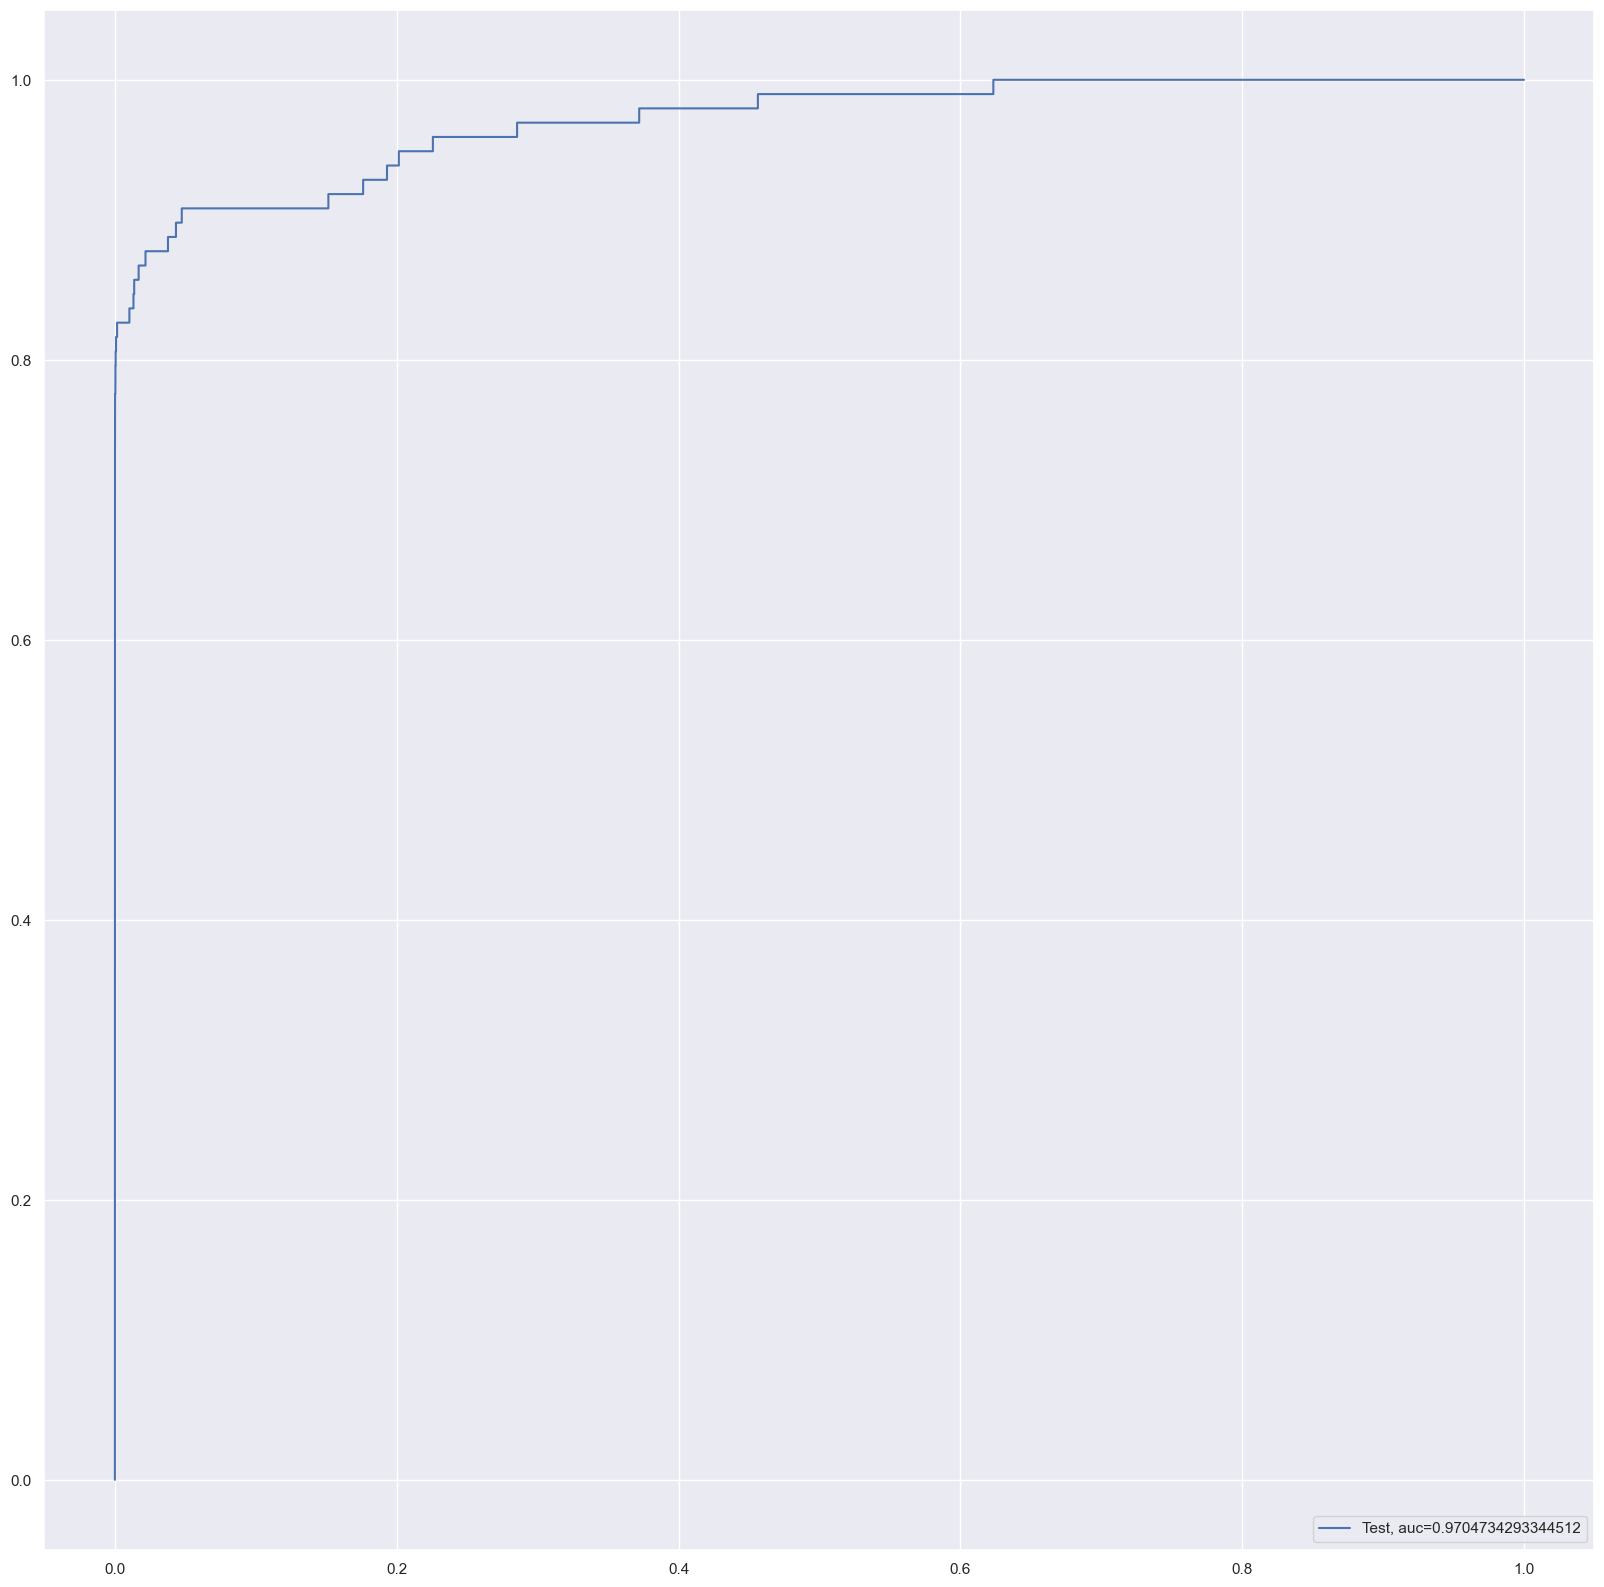

Time Taken by Model: --- 10.67953372001648 seconds ---
--------------------------------------------------------------------------------


In [112]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

##### Build models on other algorithms to see the better performing on SMOTE

In [114]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998315   0.500000   
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   
2                                          KNN  0.999298   0.900851   
3                Tree Model with gini criteria  0.998806   0.859015   
4             Tree Model with entropy criteria  0.999052   0.864337   
5                                Random Forest  0.999350   0.940564   
6                                      XGBoost  0.999386   0.977586   
7                                          SVM  0.998560   0.891340   
8   Logistic Regression with L2 Regularisation  0.998315   0.577543   
9   Logistic Regression with L1 Regularisation  0.999017   0.867717   
10                                         KNN  0.999175   0.848727   
11               Tree Model with gini criteria  0.999175   0.885197   
12            Tree Model with entropy criteria  0.999157   0.879989   
13                               Random Forest  0.999491   0.940880   
14                                     XGBoost  0.999526   0.968051   
15                                         SVM  0.997384   0.698112   
16  Logistic Regression with L2 Regularisation  0.998280   0.611162   
17  Logistic Regression with L1 Regularisation  0.998754   0.889076   
18                                         KNN  0.999192   0.805746   
19               Tree Model with gini criteria  0.998841   0.826249   
20            Tree Model with entropy criteria  0.999017   0.821244   
21               

## Results for SMOTE Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

**We will use ADASYN Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the ADASYN Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique


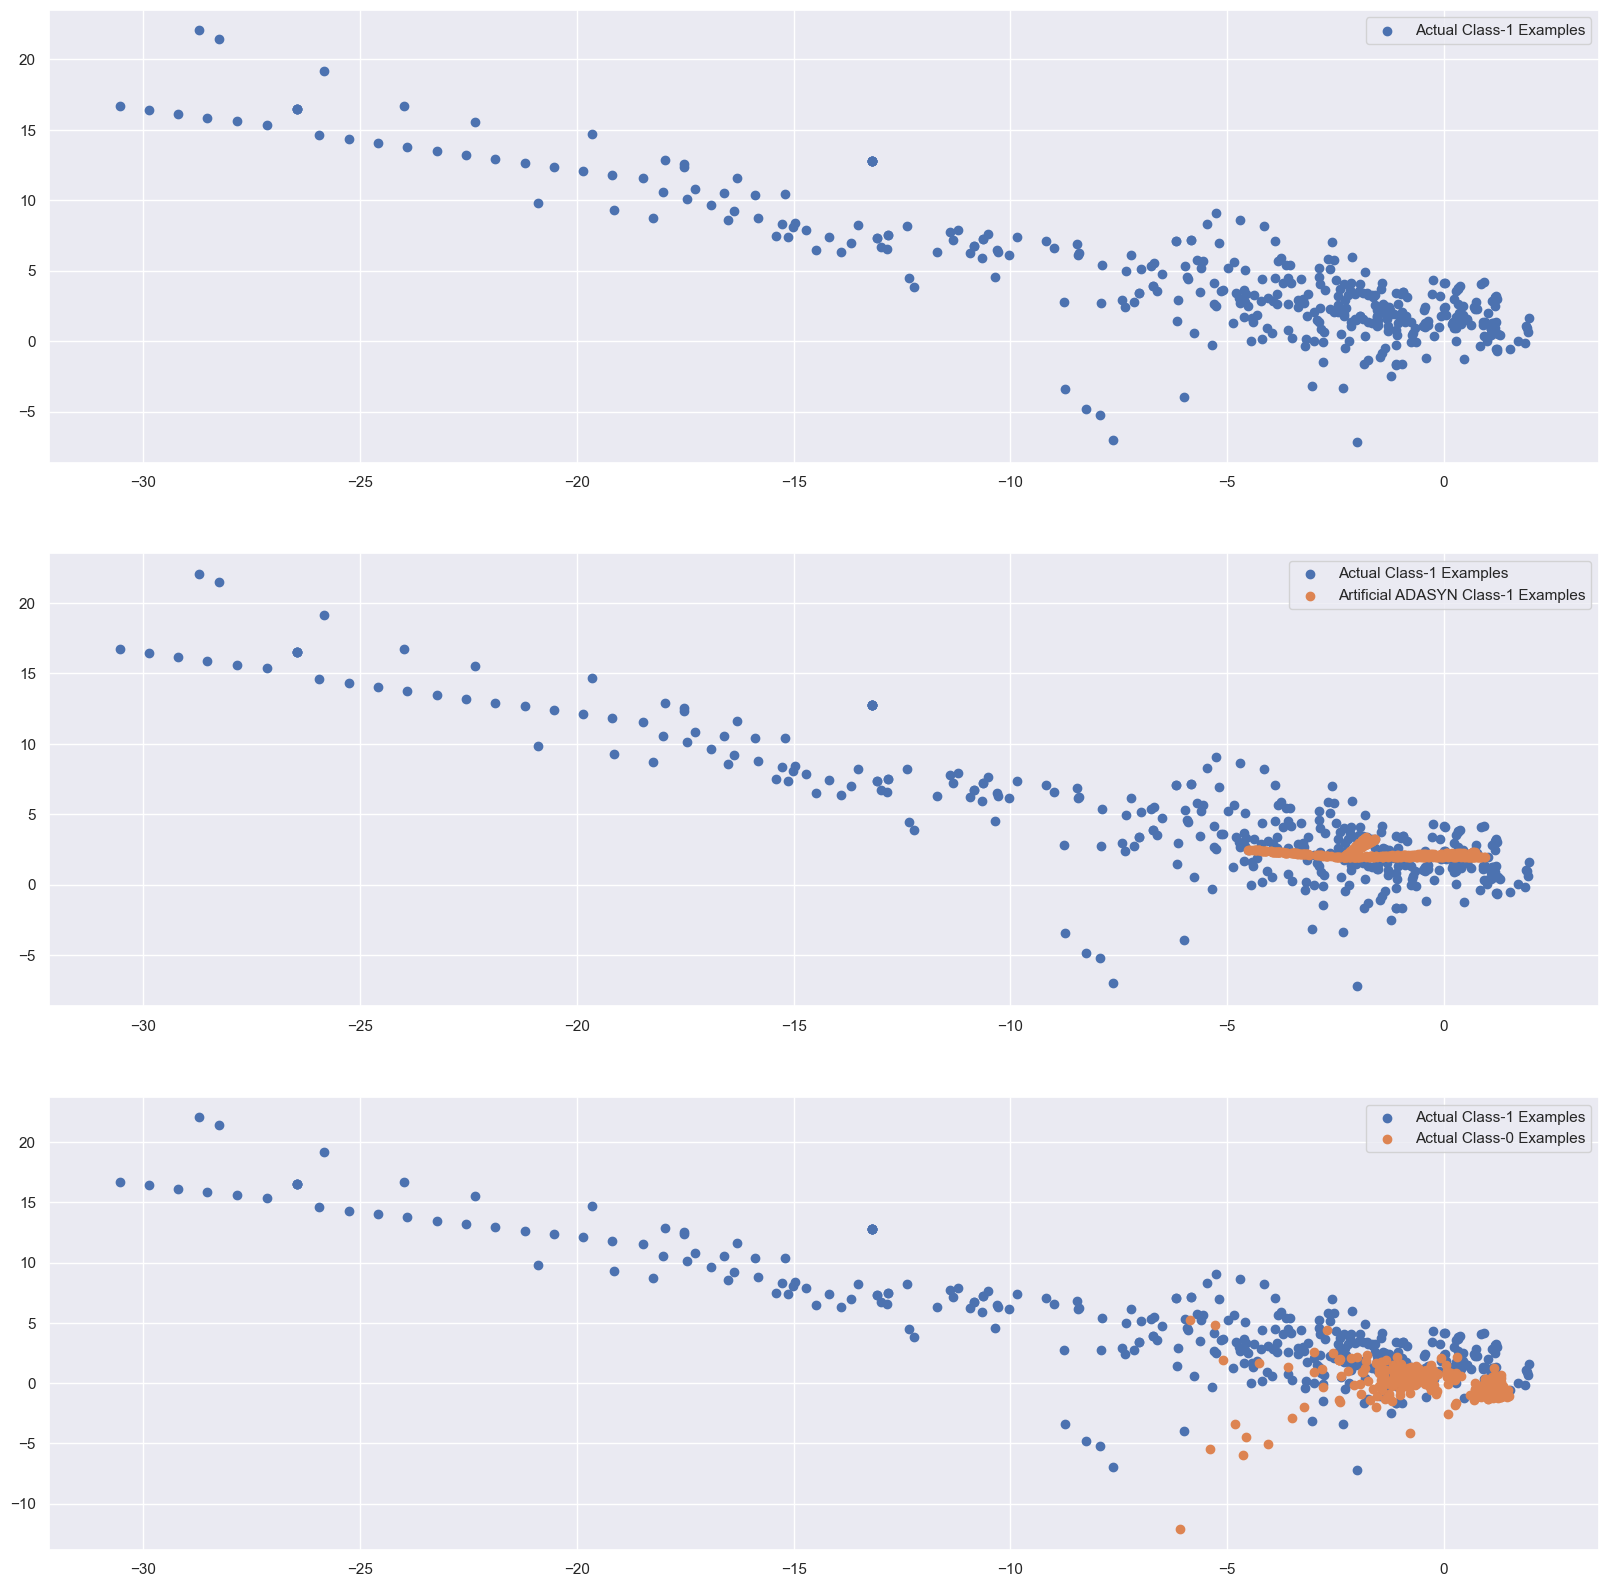

In [118]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_adasyn_1 = X_train_adasyn_1.to_numpy()
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()



In [119]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.6091741619819793
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-2.01595537e-05  1.72317688e-05 -3.64909067e-05  3.39290450e-05
  -1.46234036e-05 -8.46815505e-06 -2.20942850e-05  3.85352425e-07
  -1.34235180e-05 -3.75798463e-05  2.79794199e-05 -4.50836936e-05
  -2.12360047e-06 -5.56215470e-05  1.17193947e-06 -2.74594763e-05
  -4.06813002e-05 -1.20266028e-05  4.49719240e-06  1.33830143e-06
   6.32715682e-06  5.58244410e-07 -2.26605364e-06 -8.54000002e-07
  -5.65808664e-07 -2.03181861e-07  2.36428895e-06  7.75570254e-07
   1.29444742e-03 -2.92744751e-05]]
[-9.9952445e-07]
{1: array([[0.60589839, 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ,
        0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ,
        0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ,
        0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 , 0.6081632 ],
       [0.60637663, 0.60864573, 0.60864573, 0.60864573, 0.608

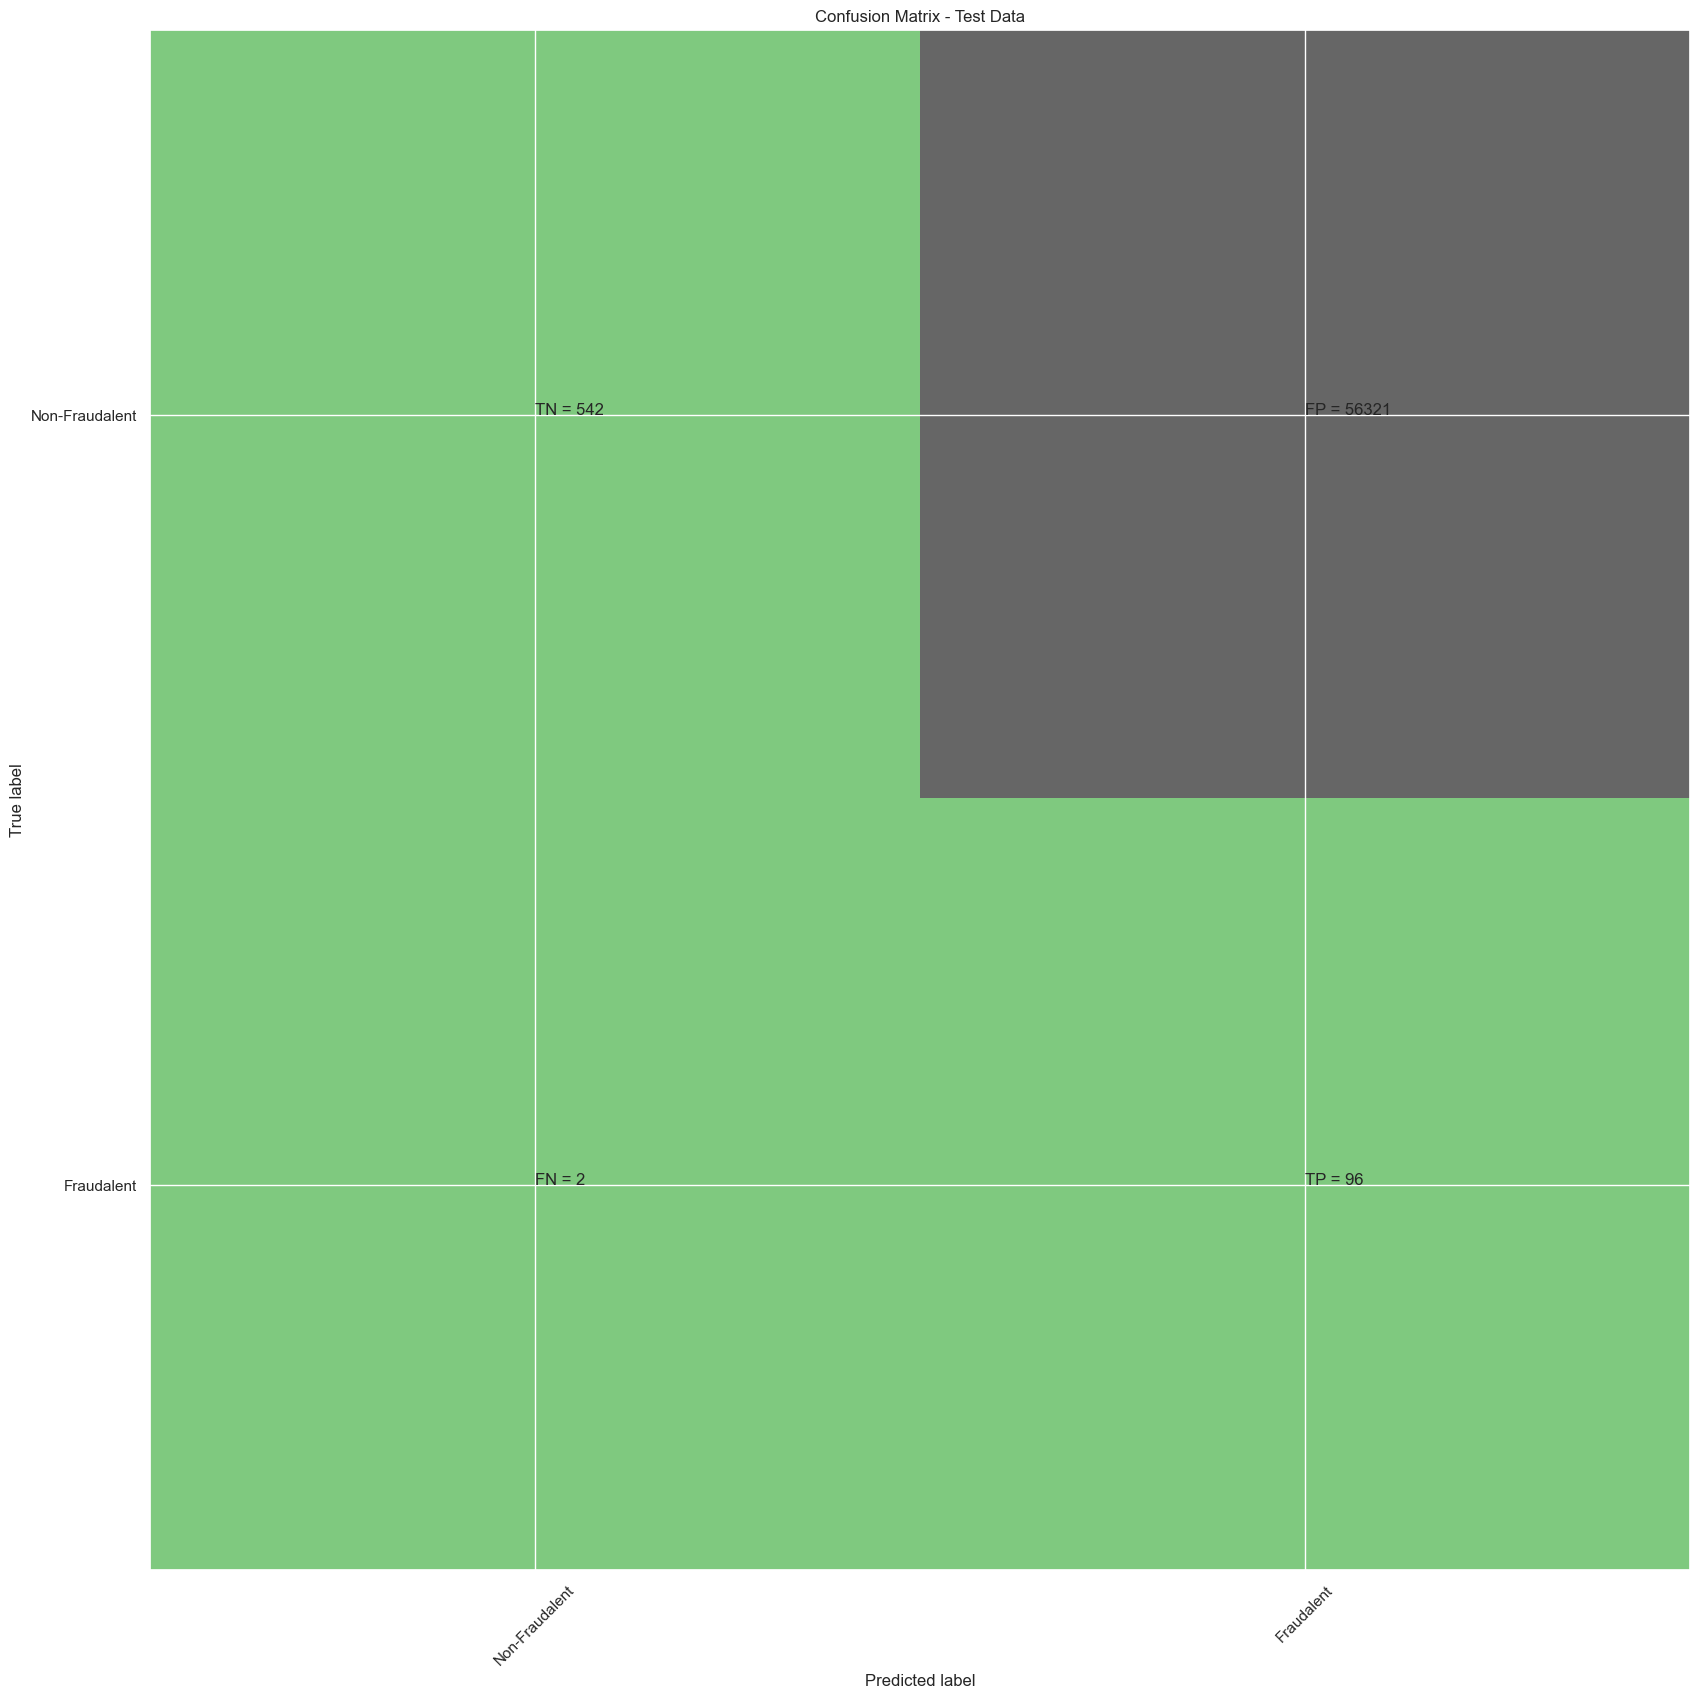

classification Report
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     56863
           1       0.00      0.98      0.00        98

    accuracy                           0.01     56961
   macro avg       0.50      0.49      0.01     56961
weighted avg       0.99      0.01      0.02     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


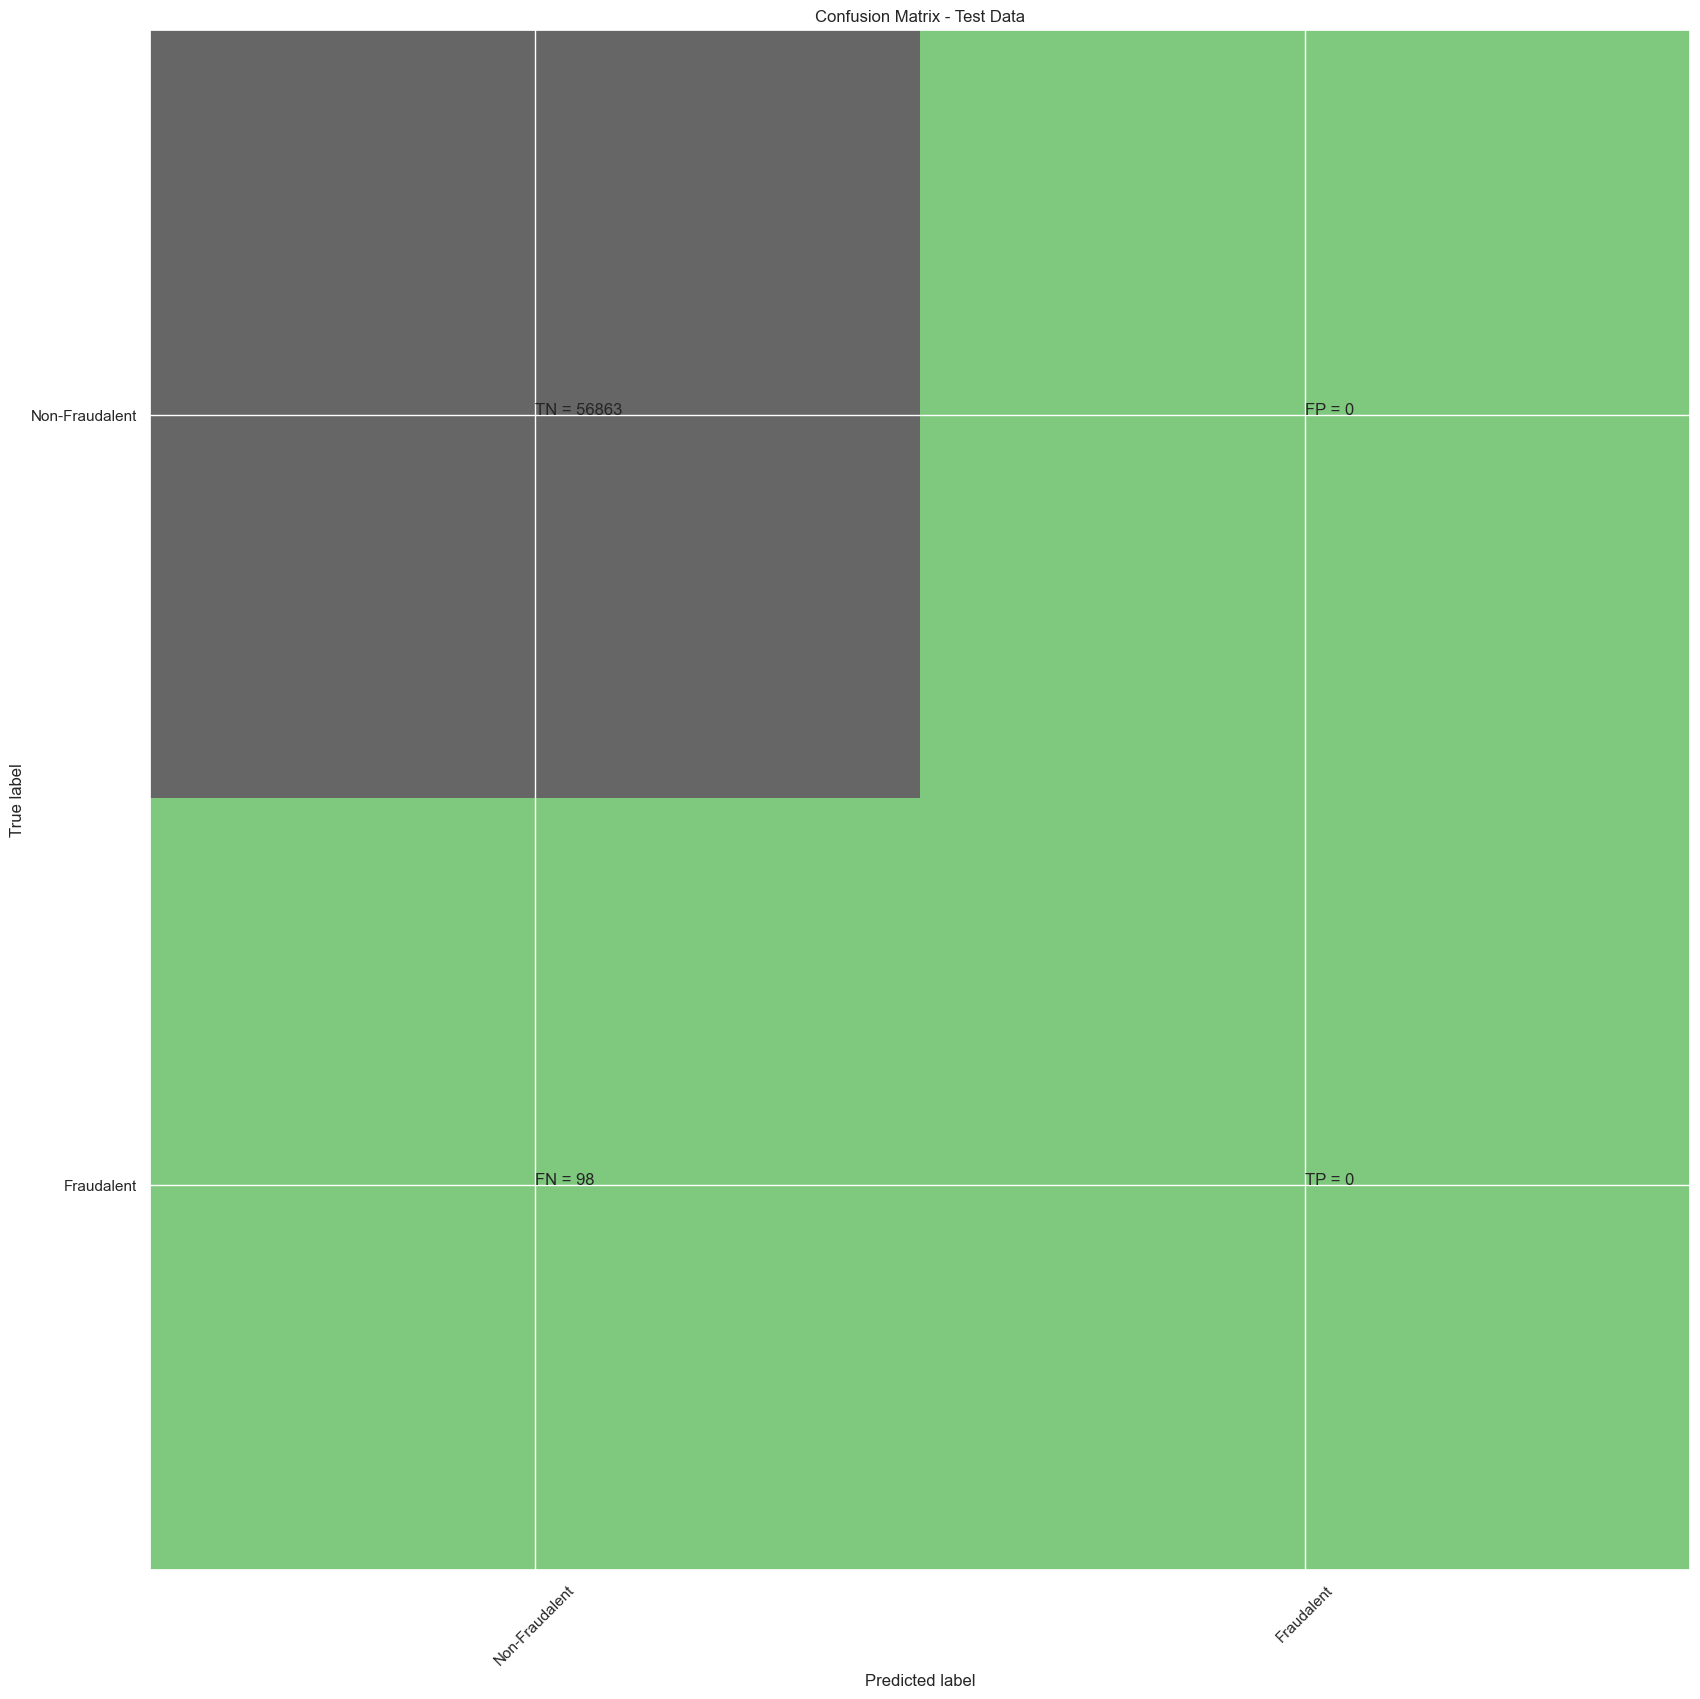

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.4511041037768184
l2 threshold: 0.5762819111863167
ROC for the test dataset 45.1%


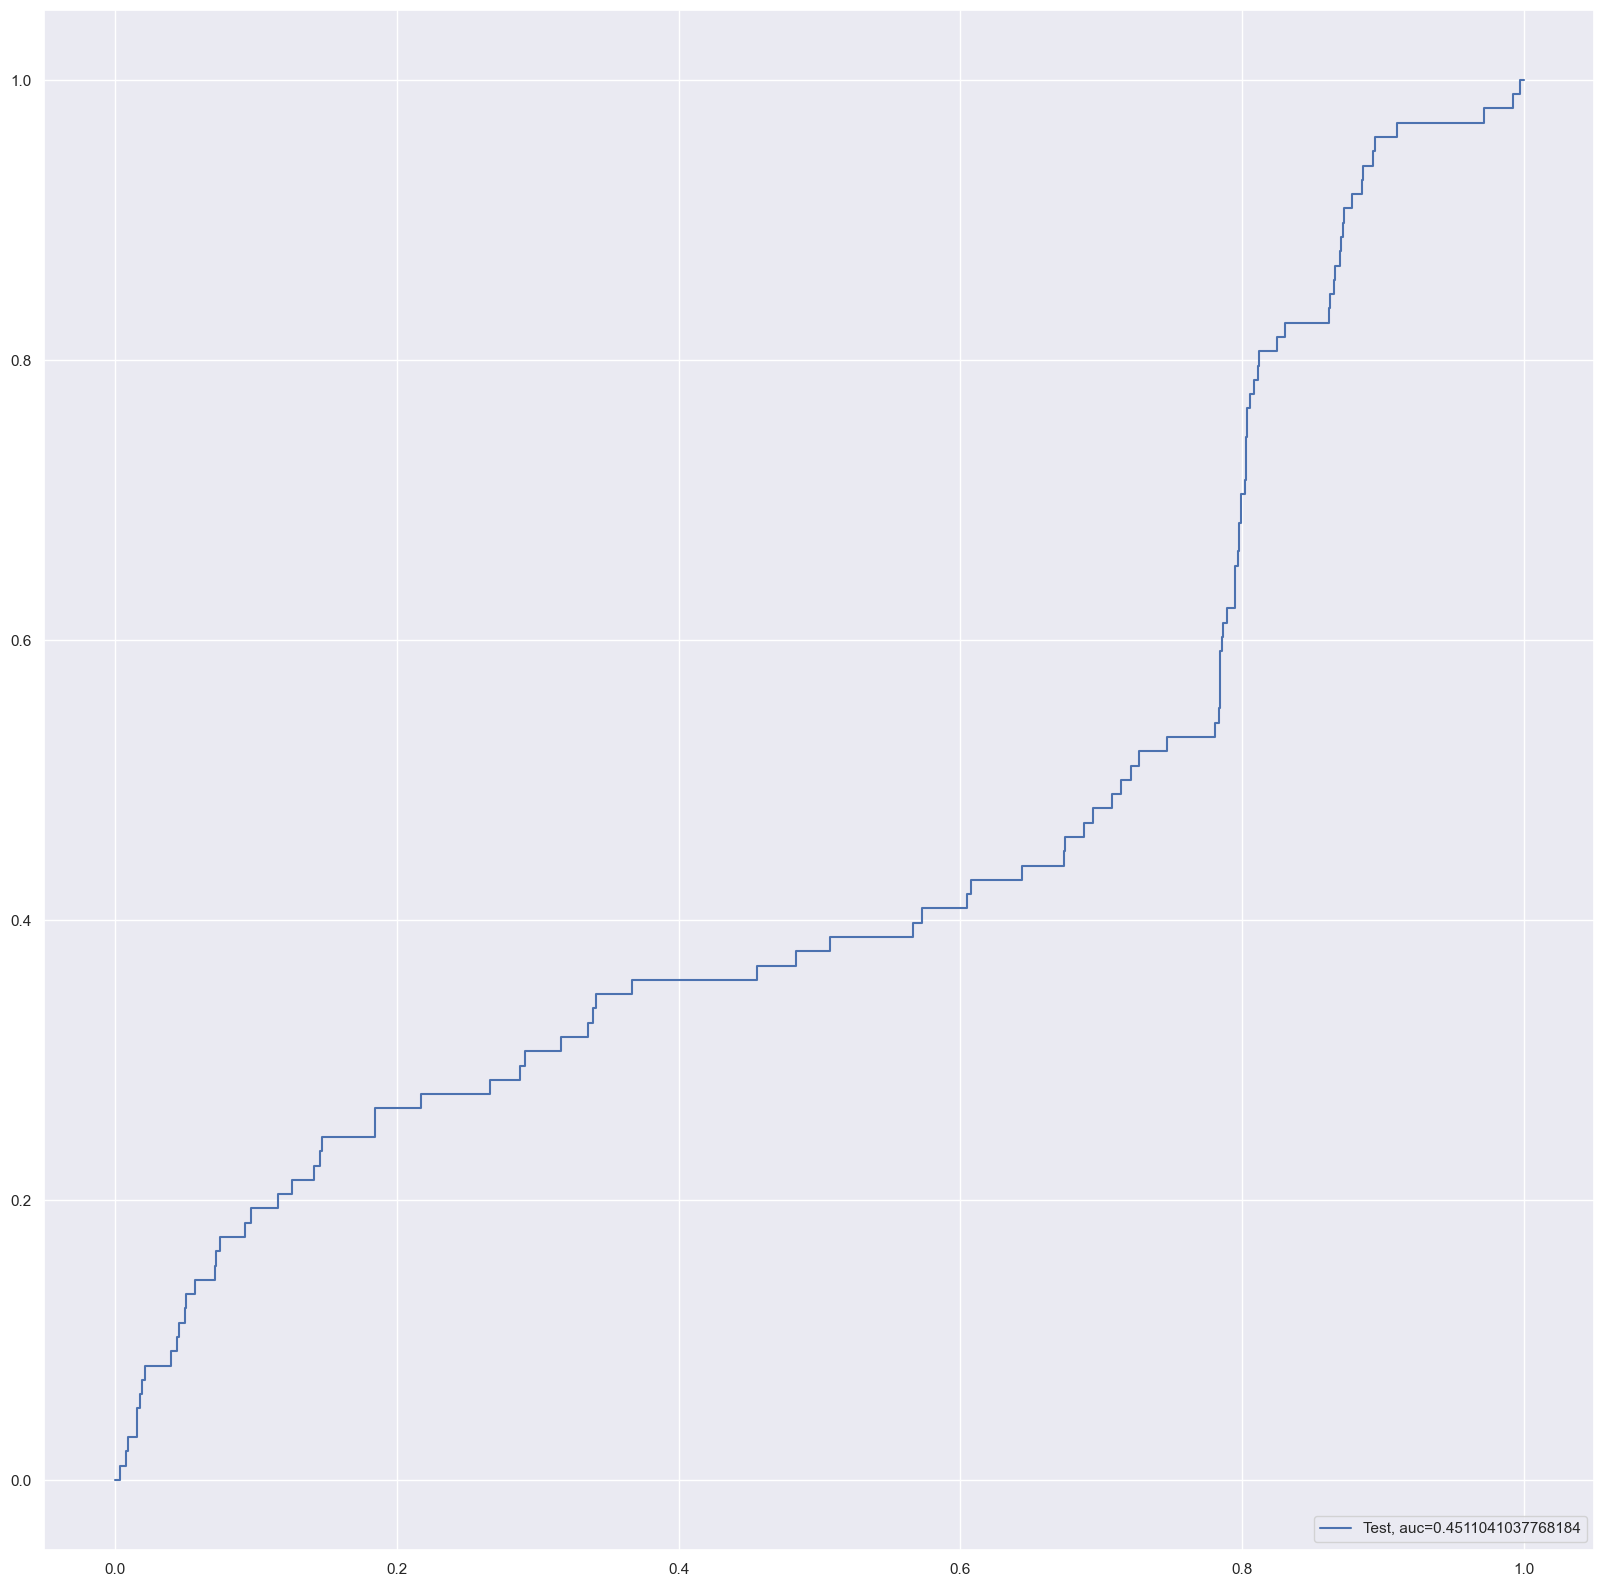

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


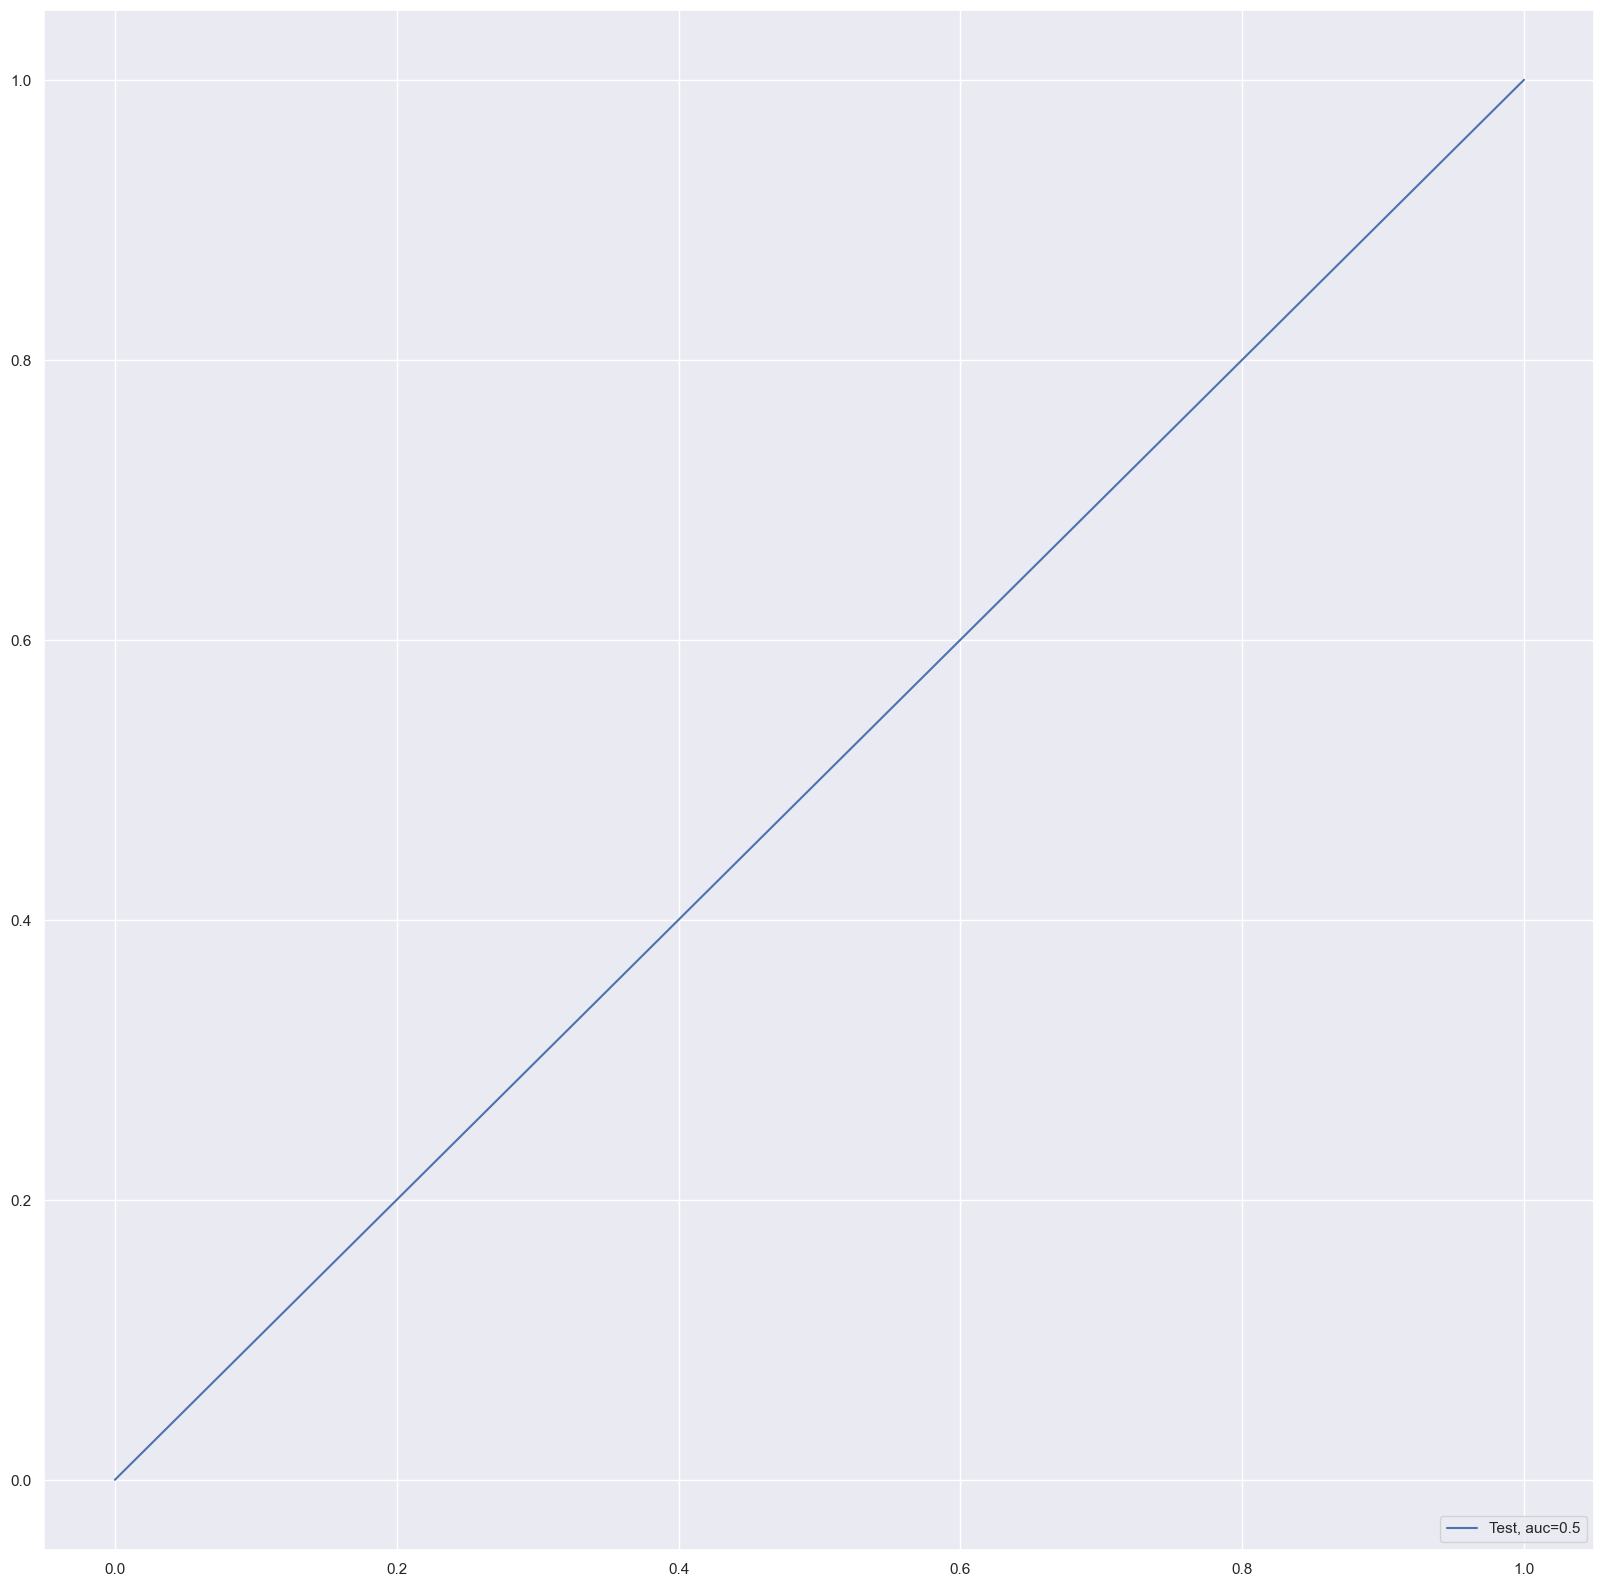

Time Taken by Model: --- 235.22825241088867 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9945050122013307
Confusion Matrix


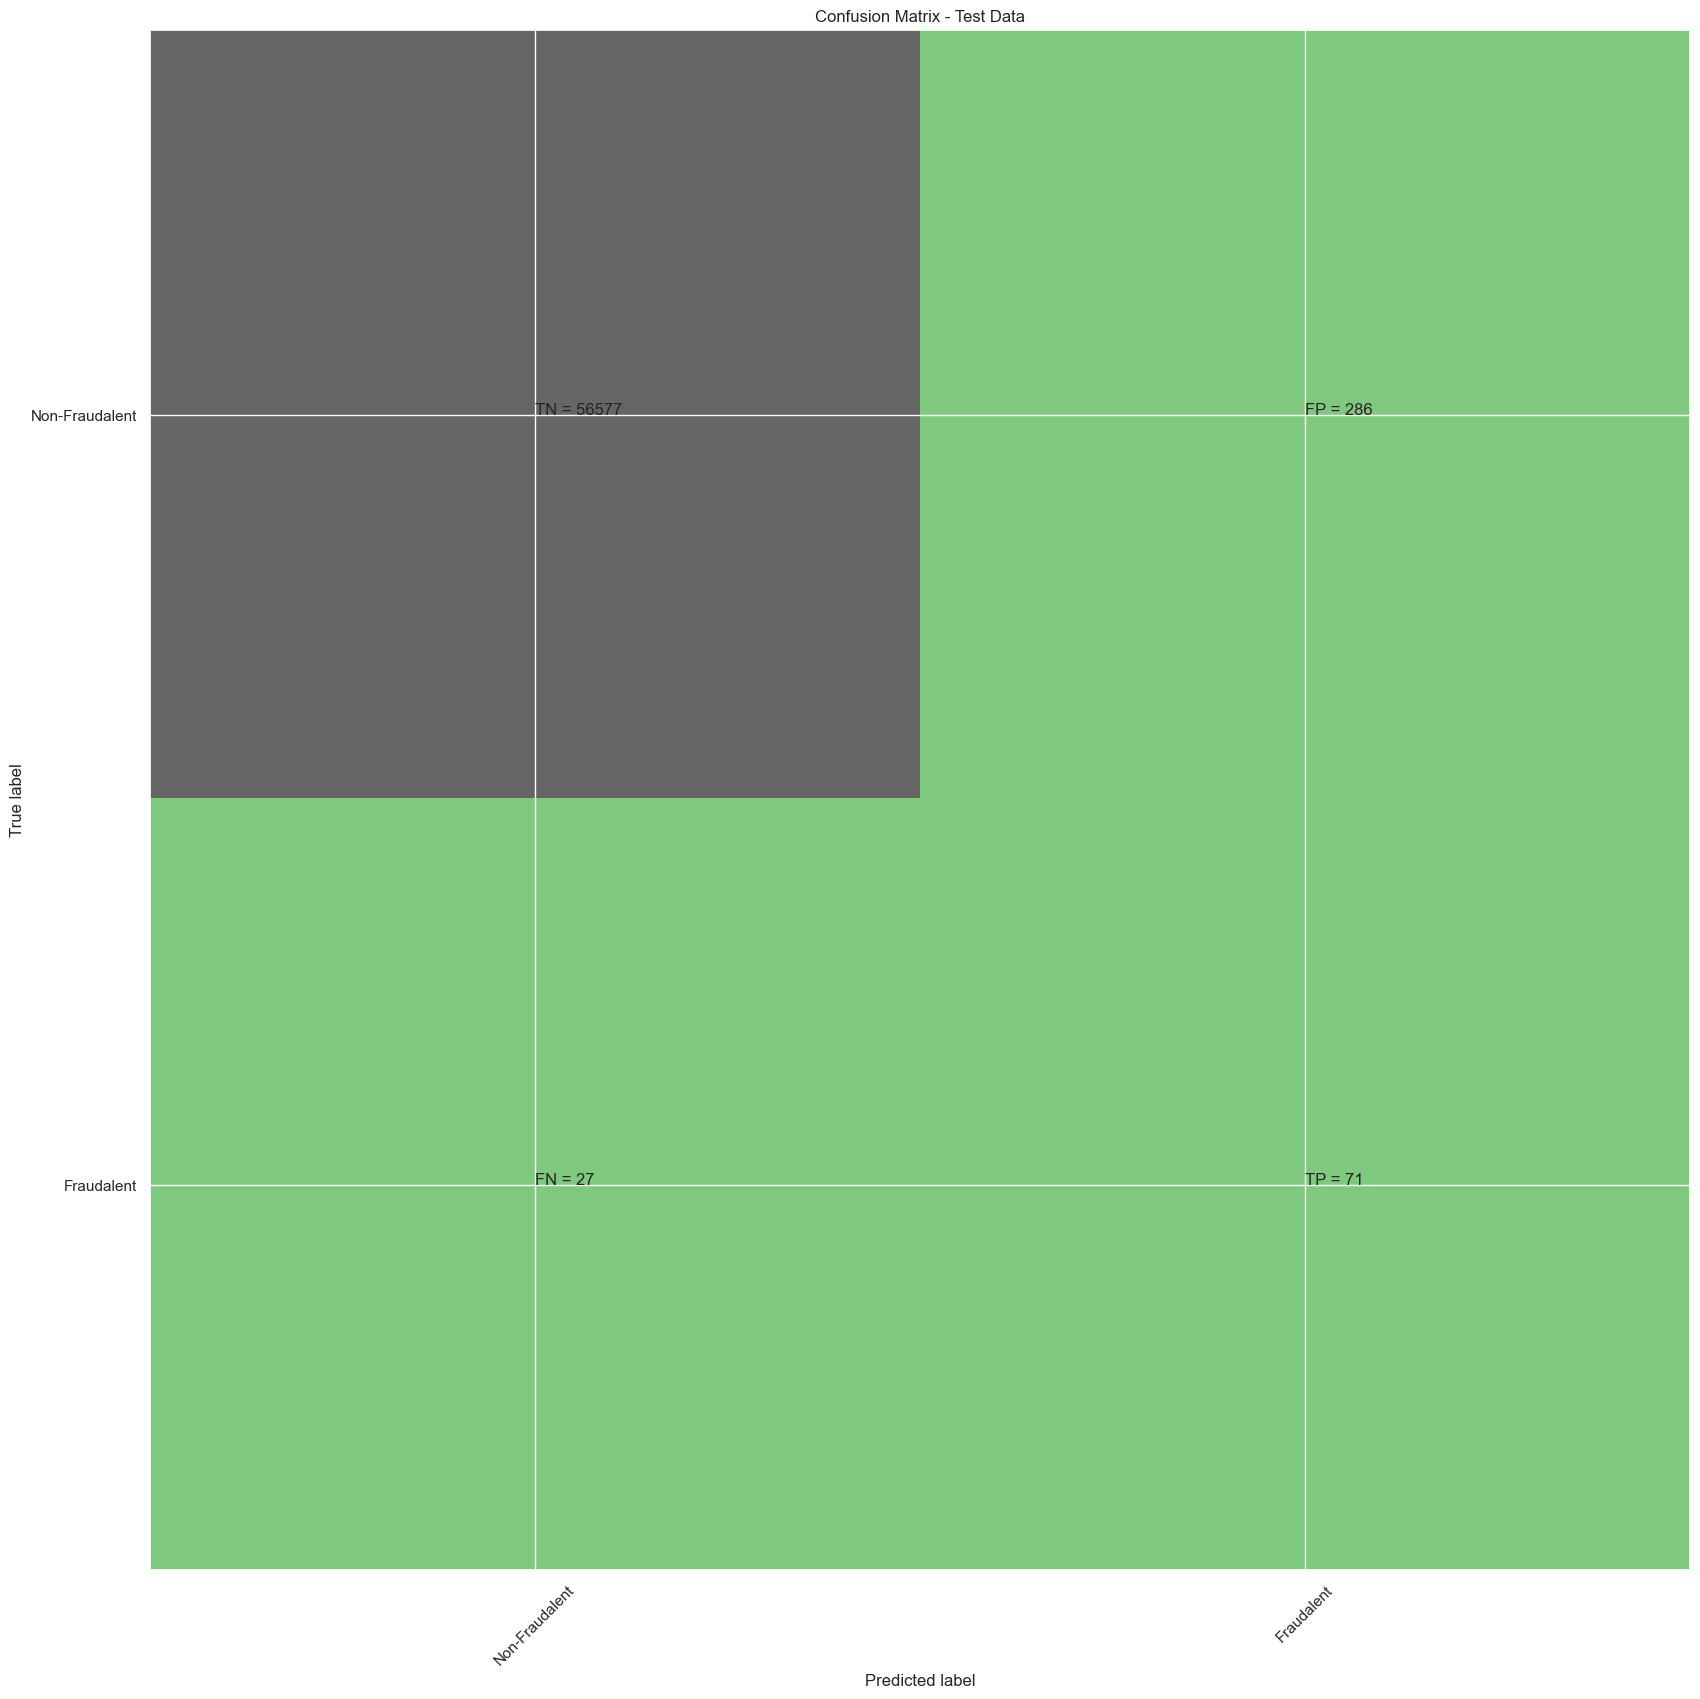

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


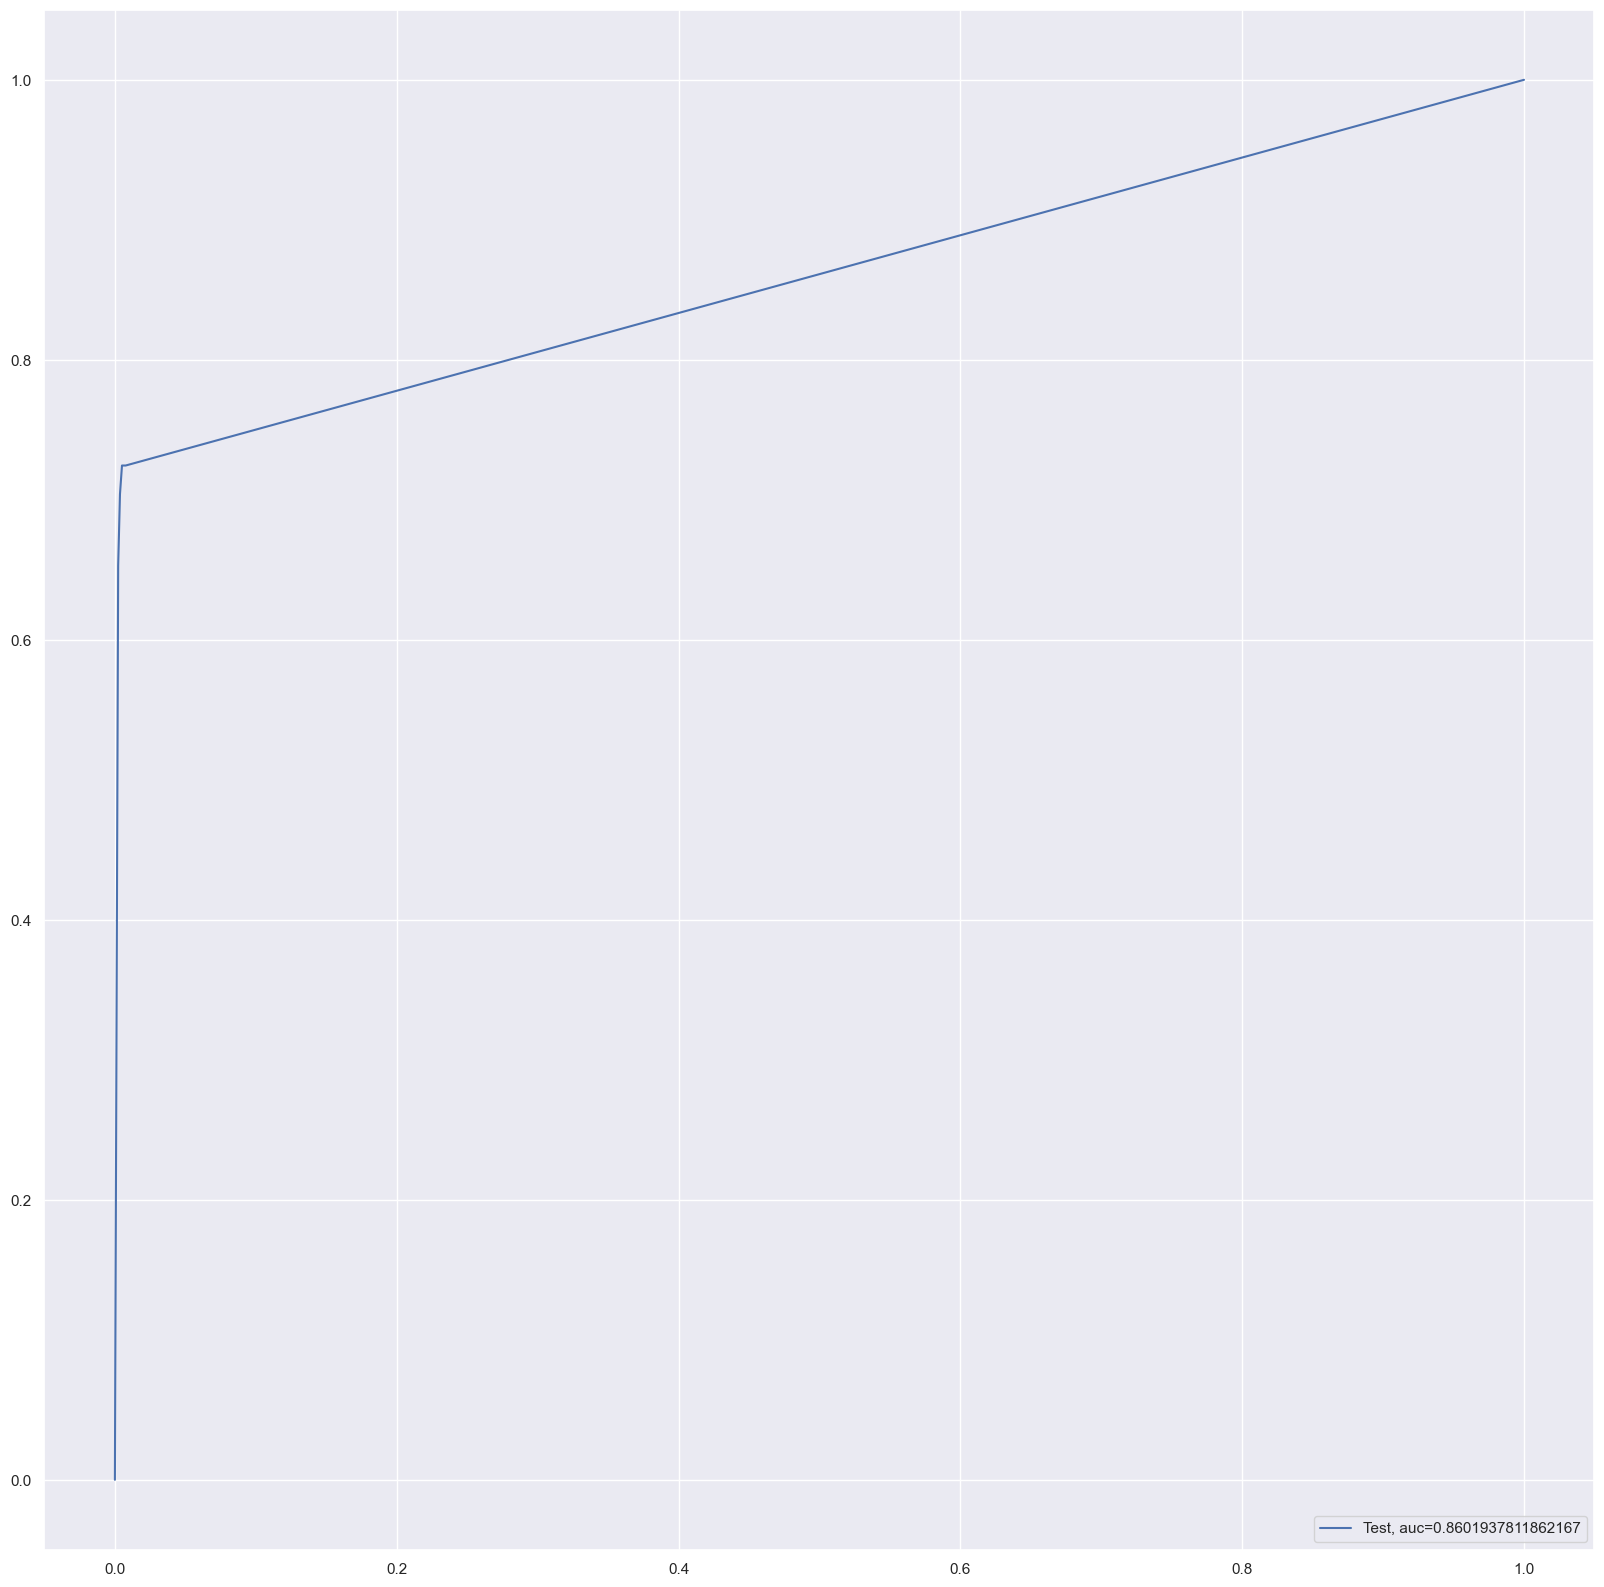

Time Taken by Model: --- 274.9600865840912 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979459630273345
Confusion Matrix


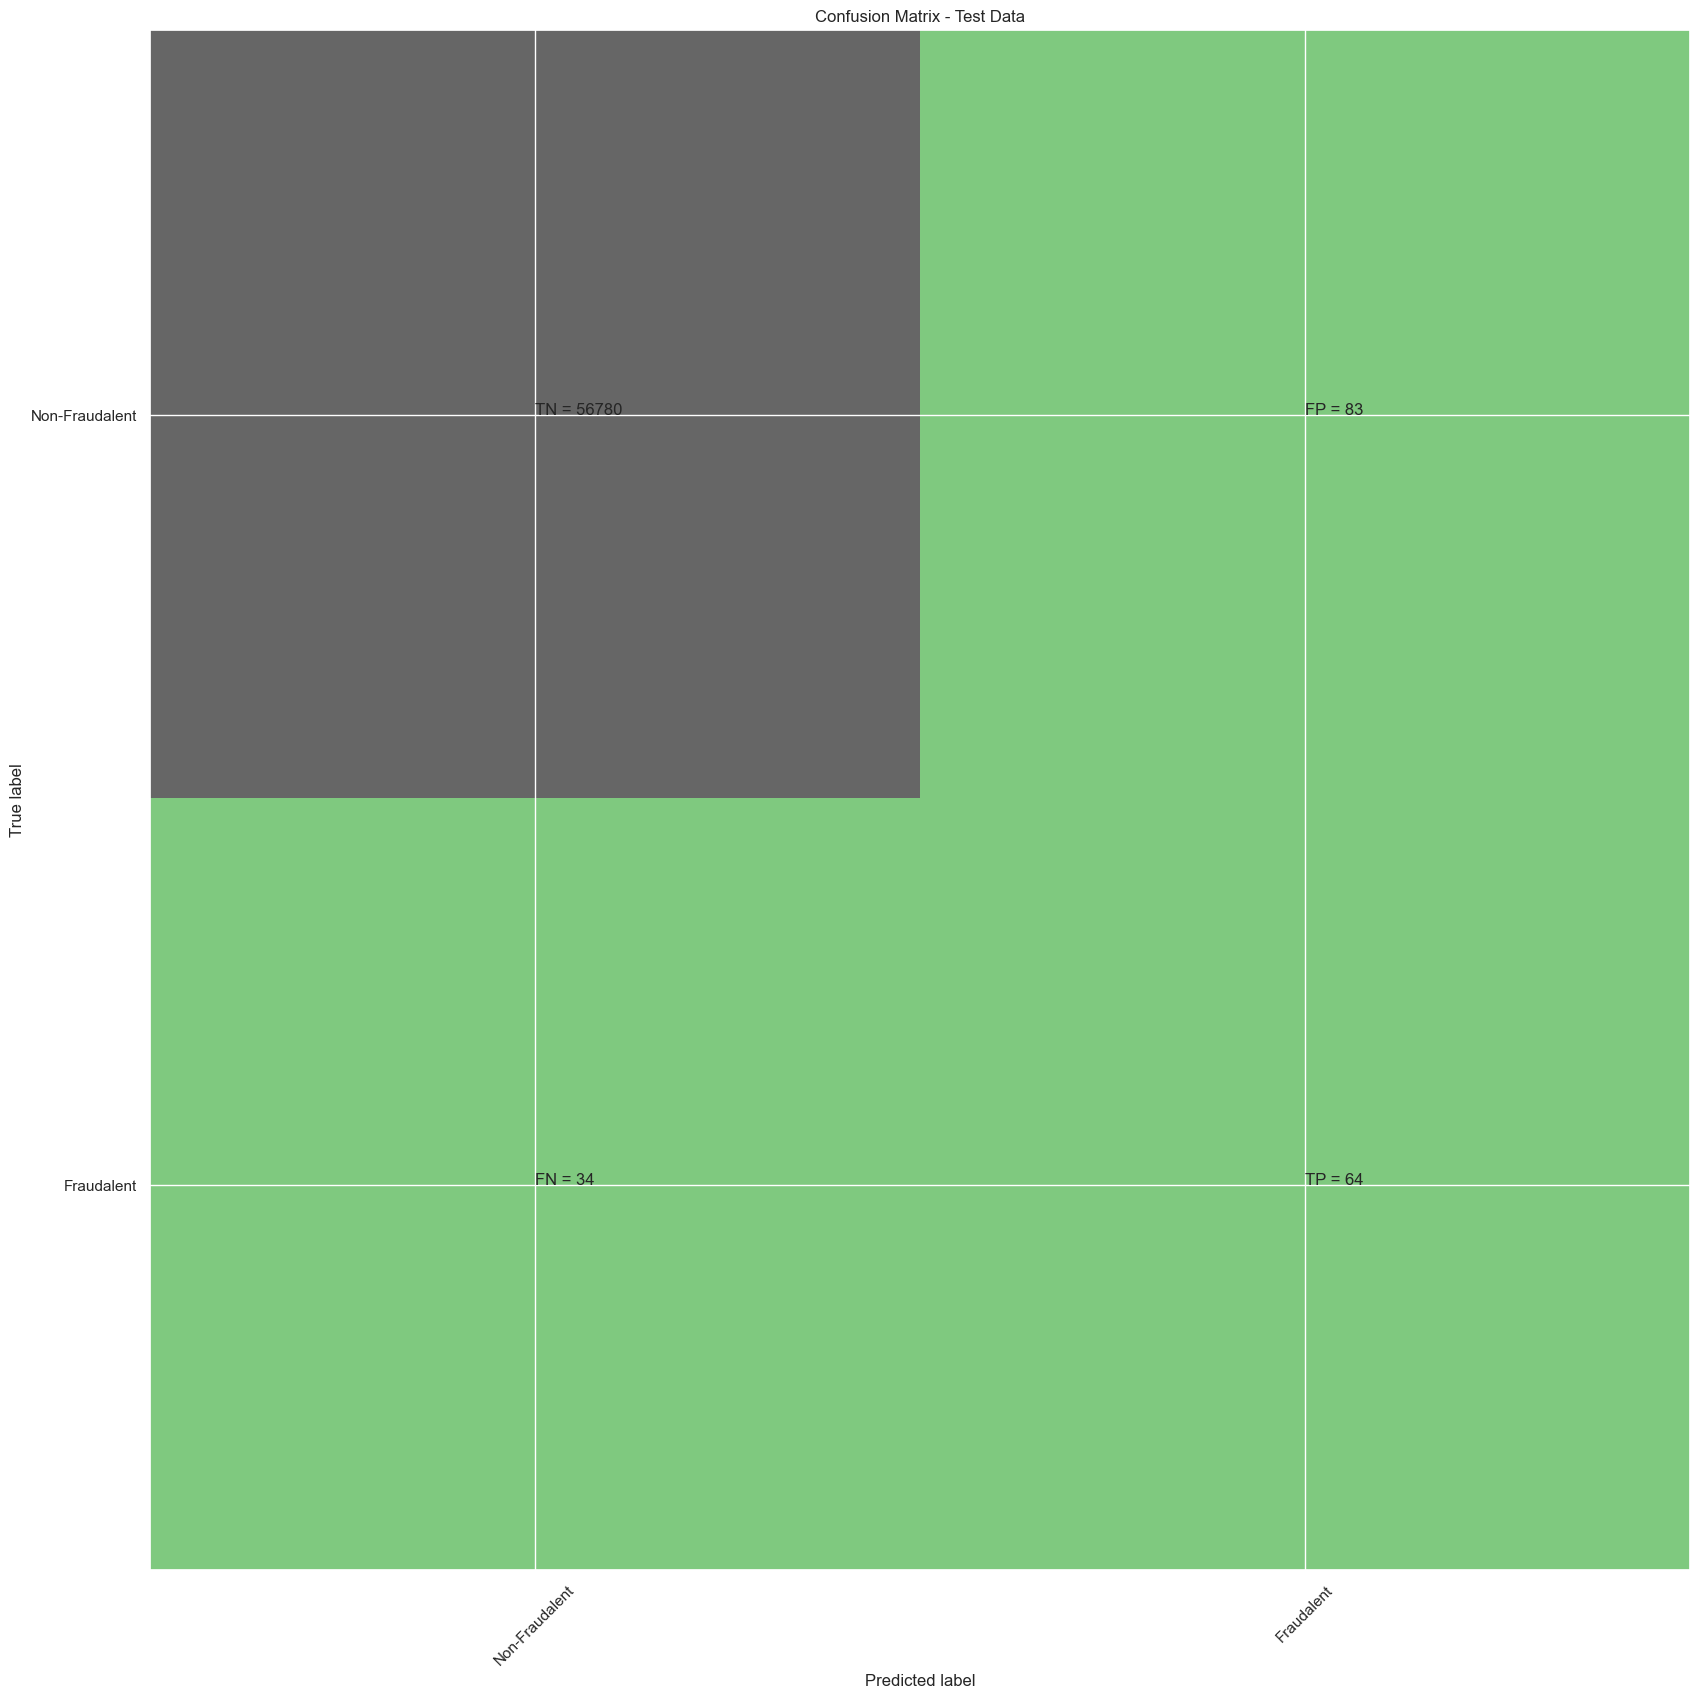

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


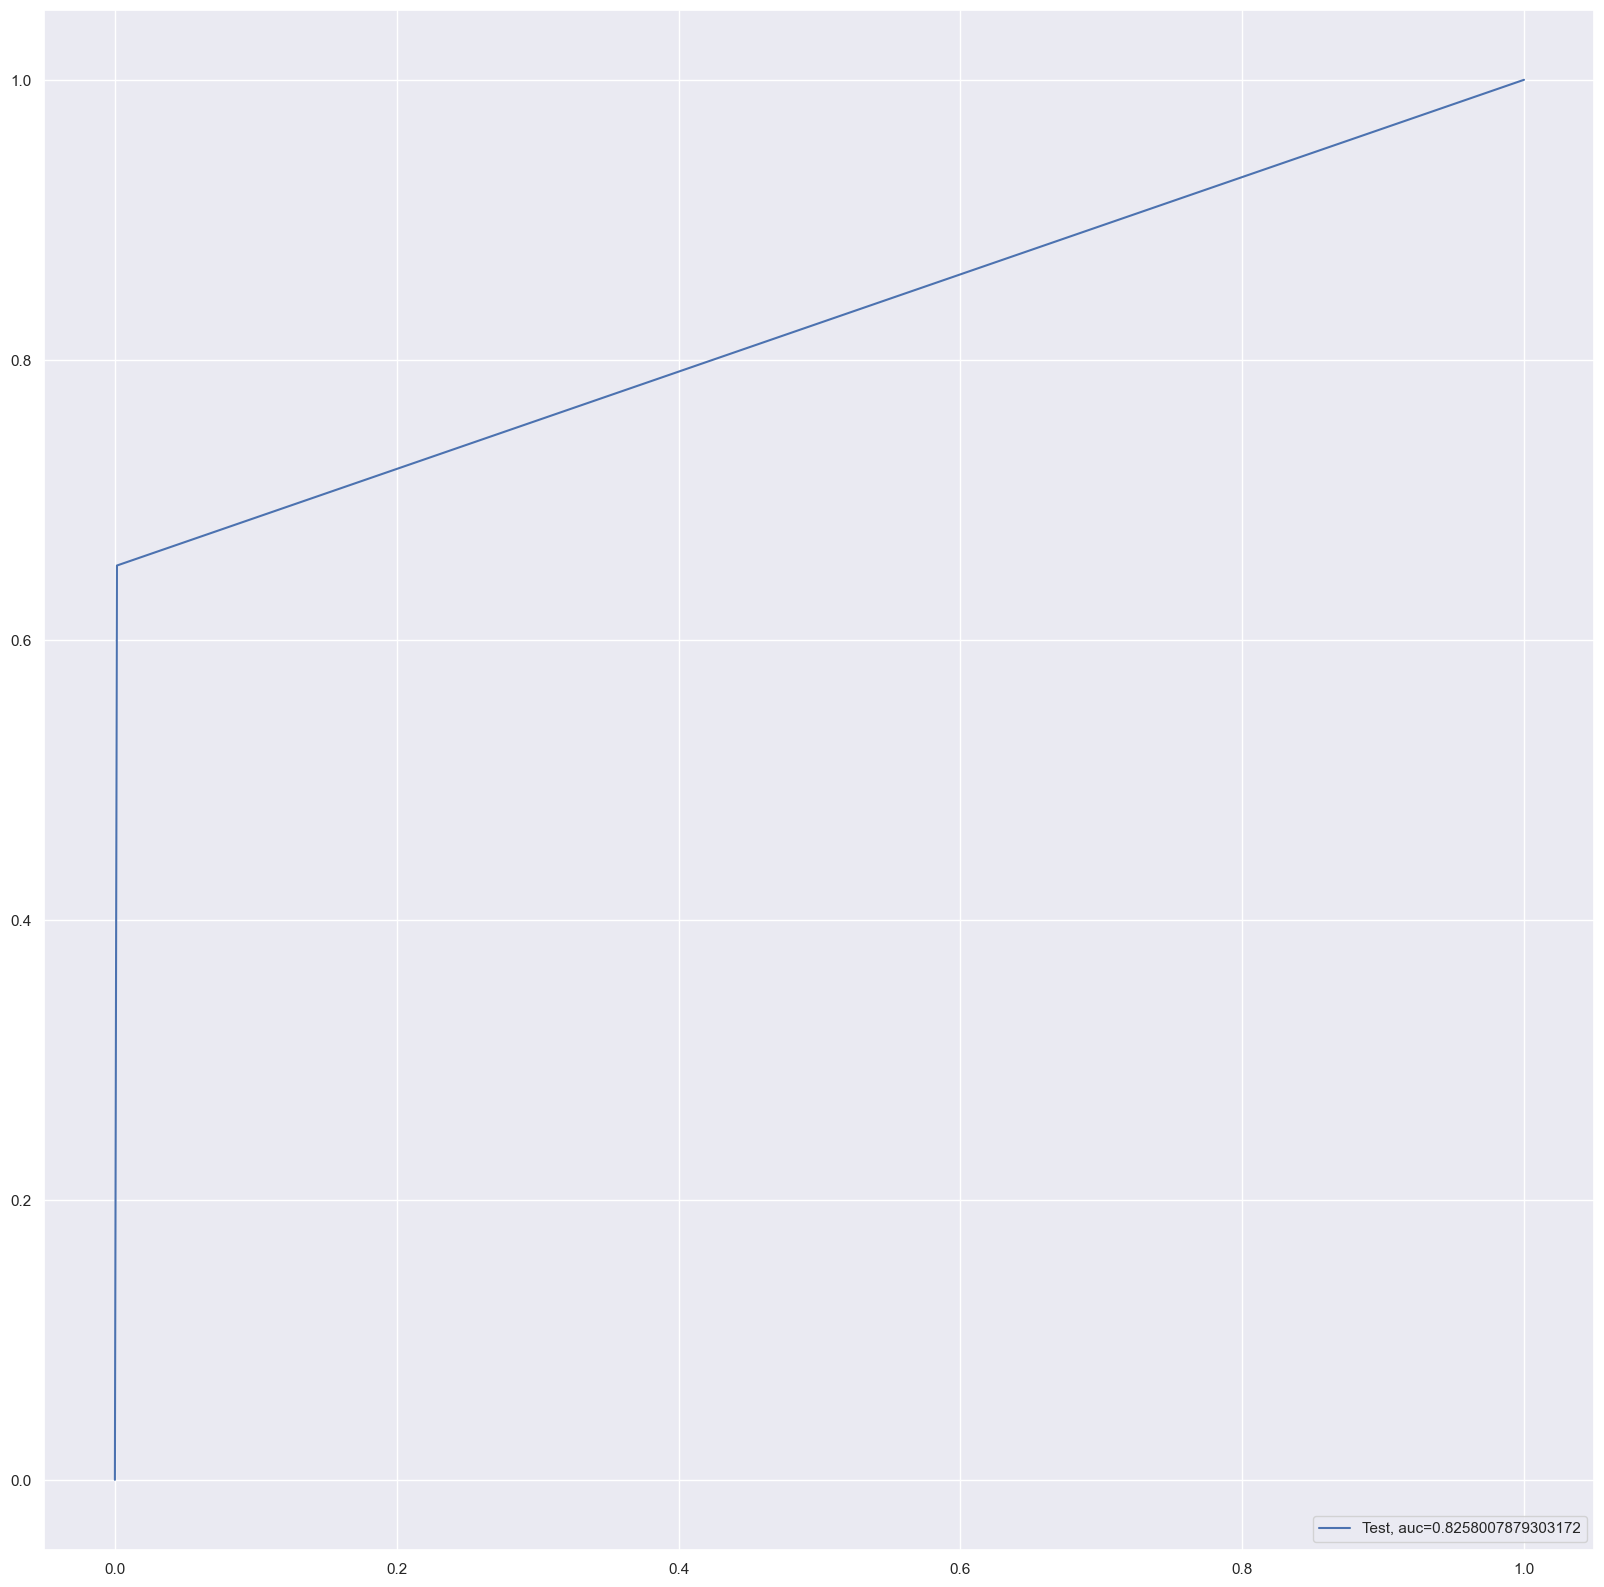

entropy score: 0.9954179175225154
Confusion Matrix


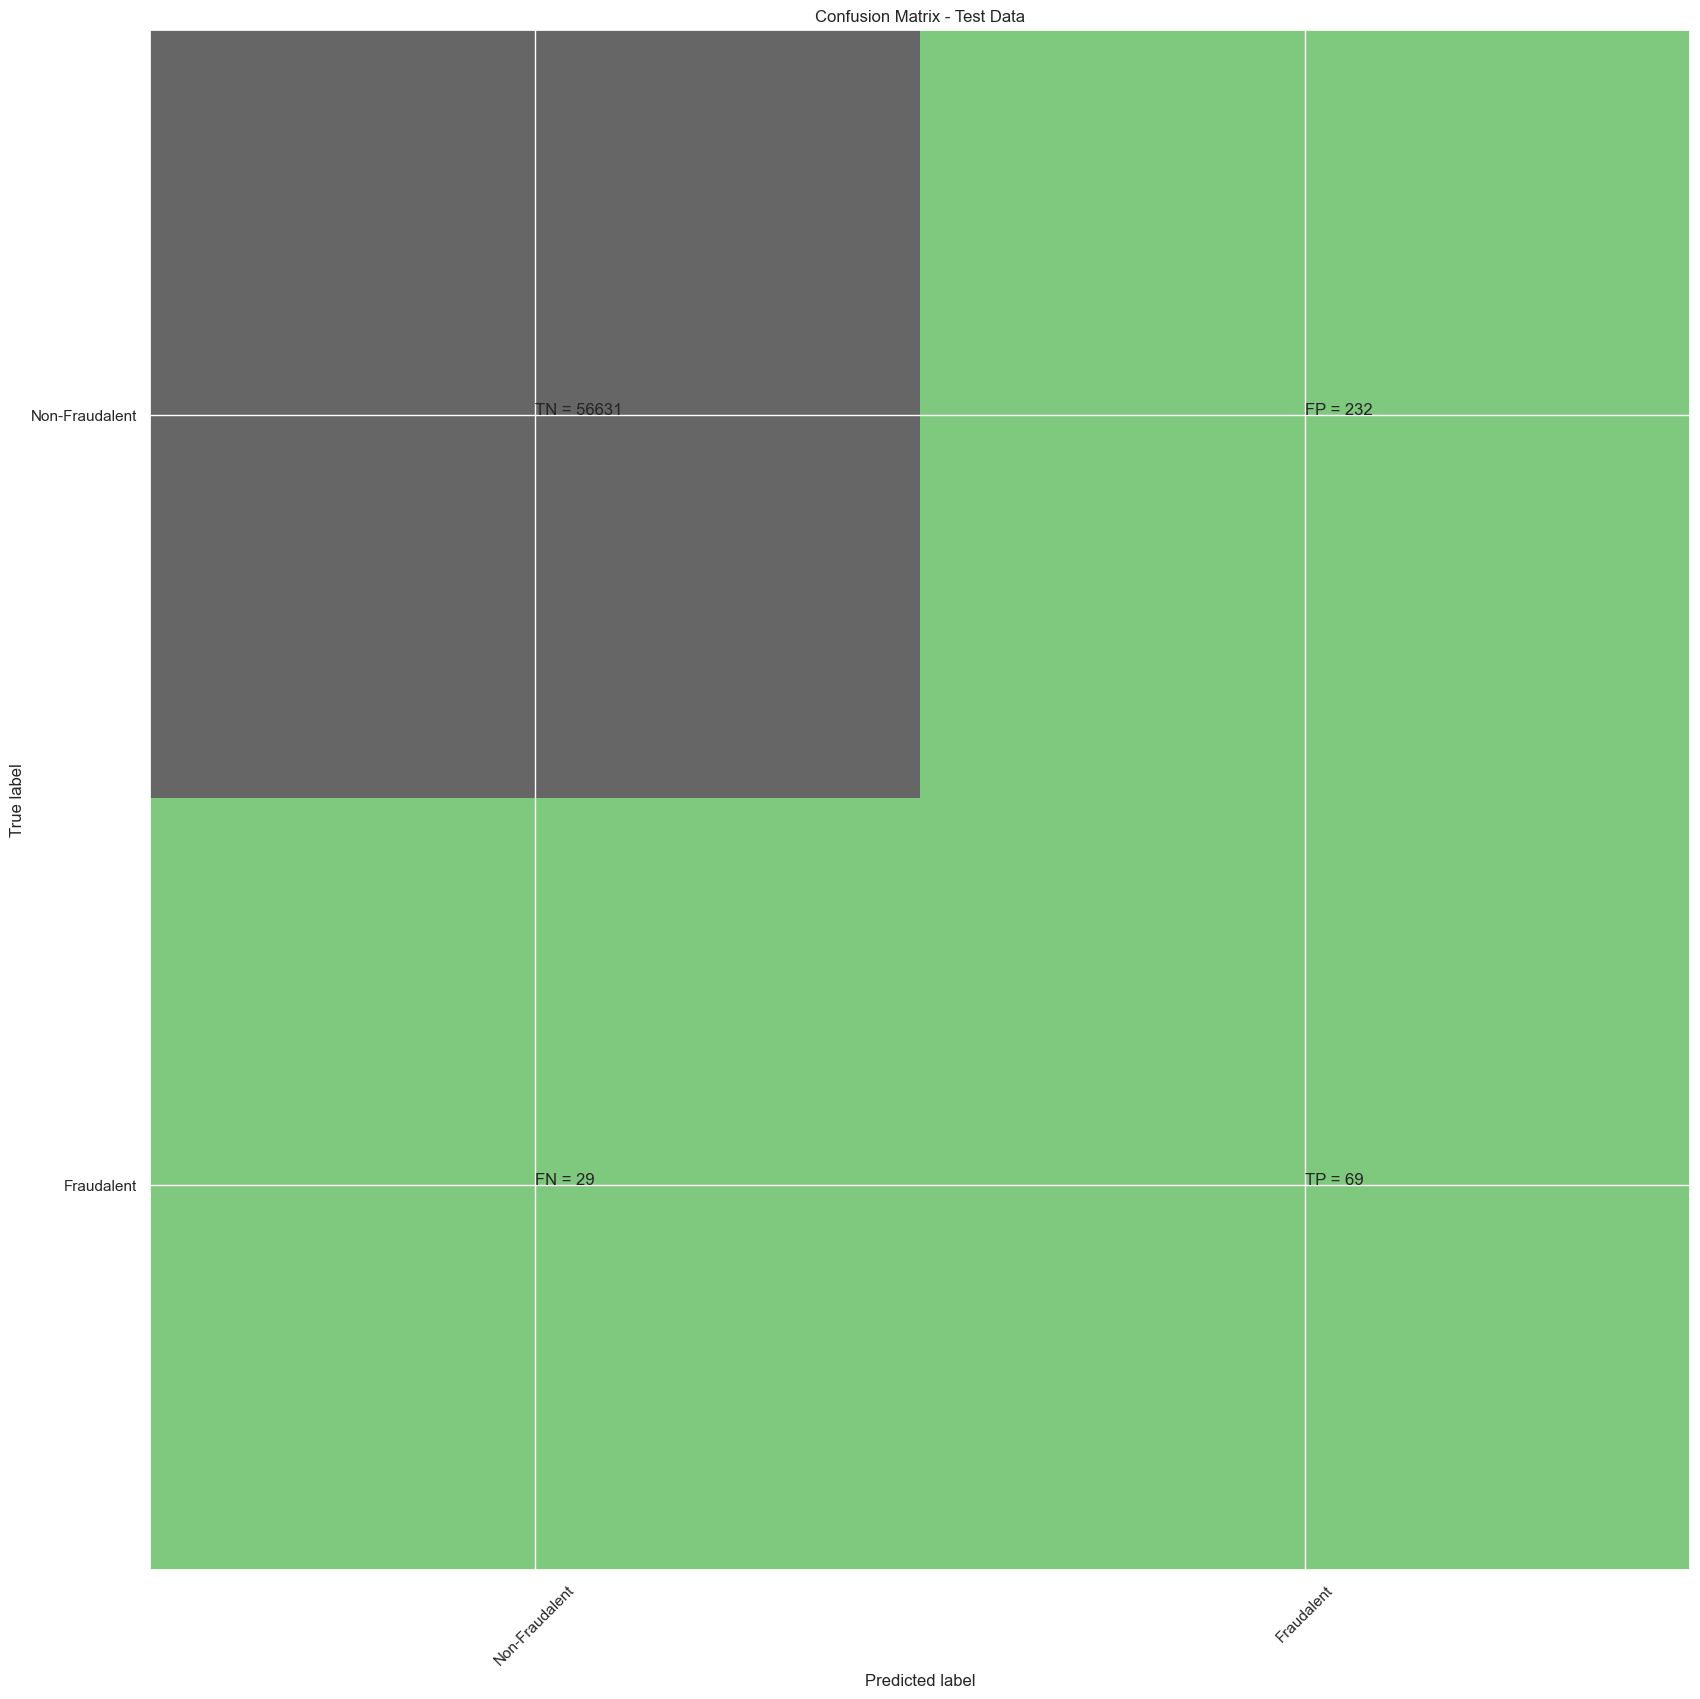

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8500008254713172
Tree threshold: 1.0
ROC for the test dataset 85.0%


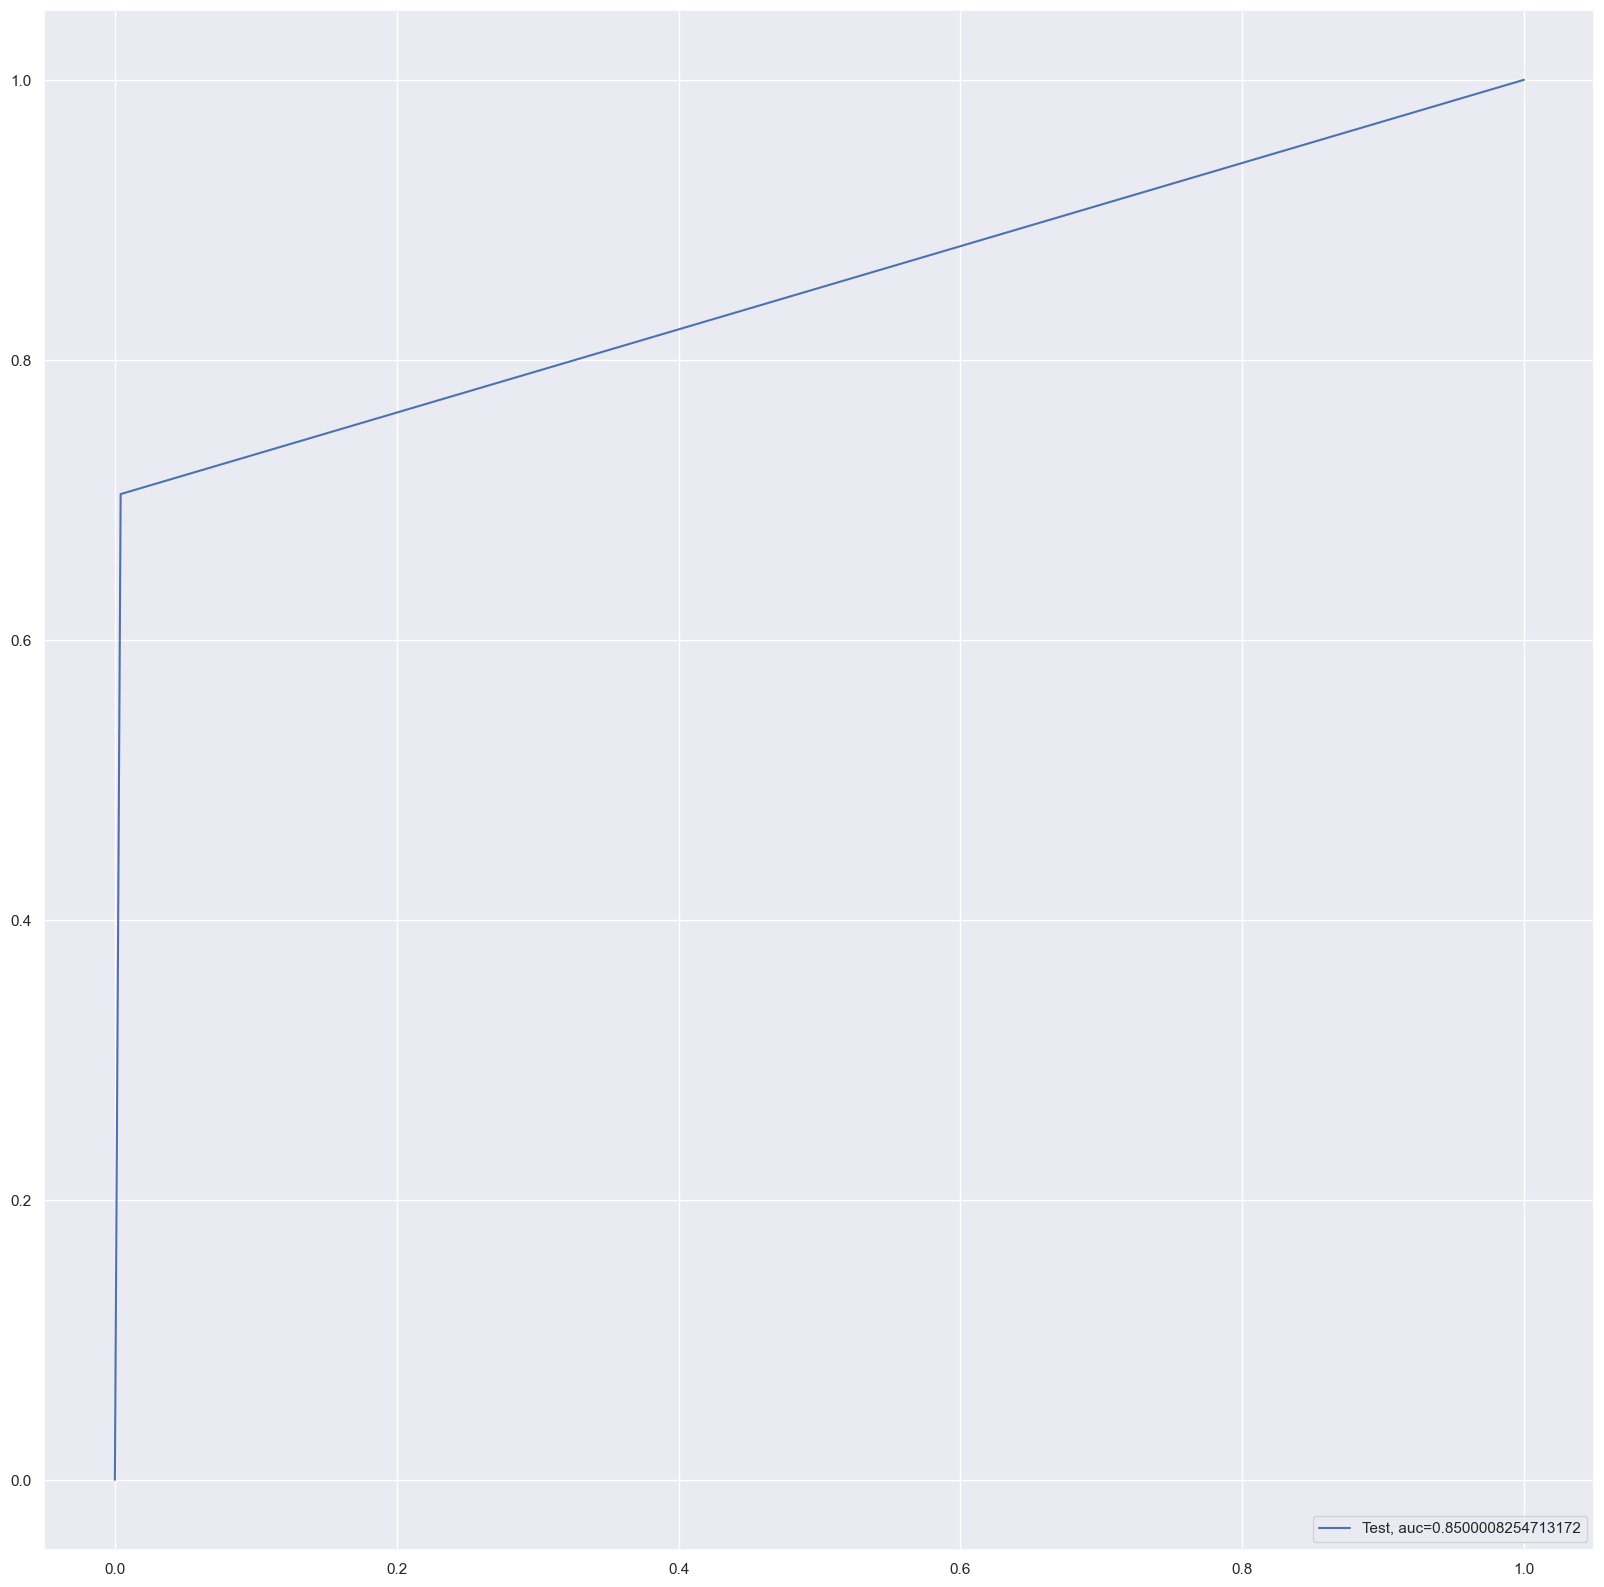

Time Taken by Model: --- 163.56806445121765 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


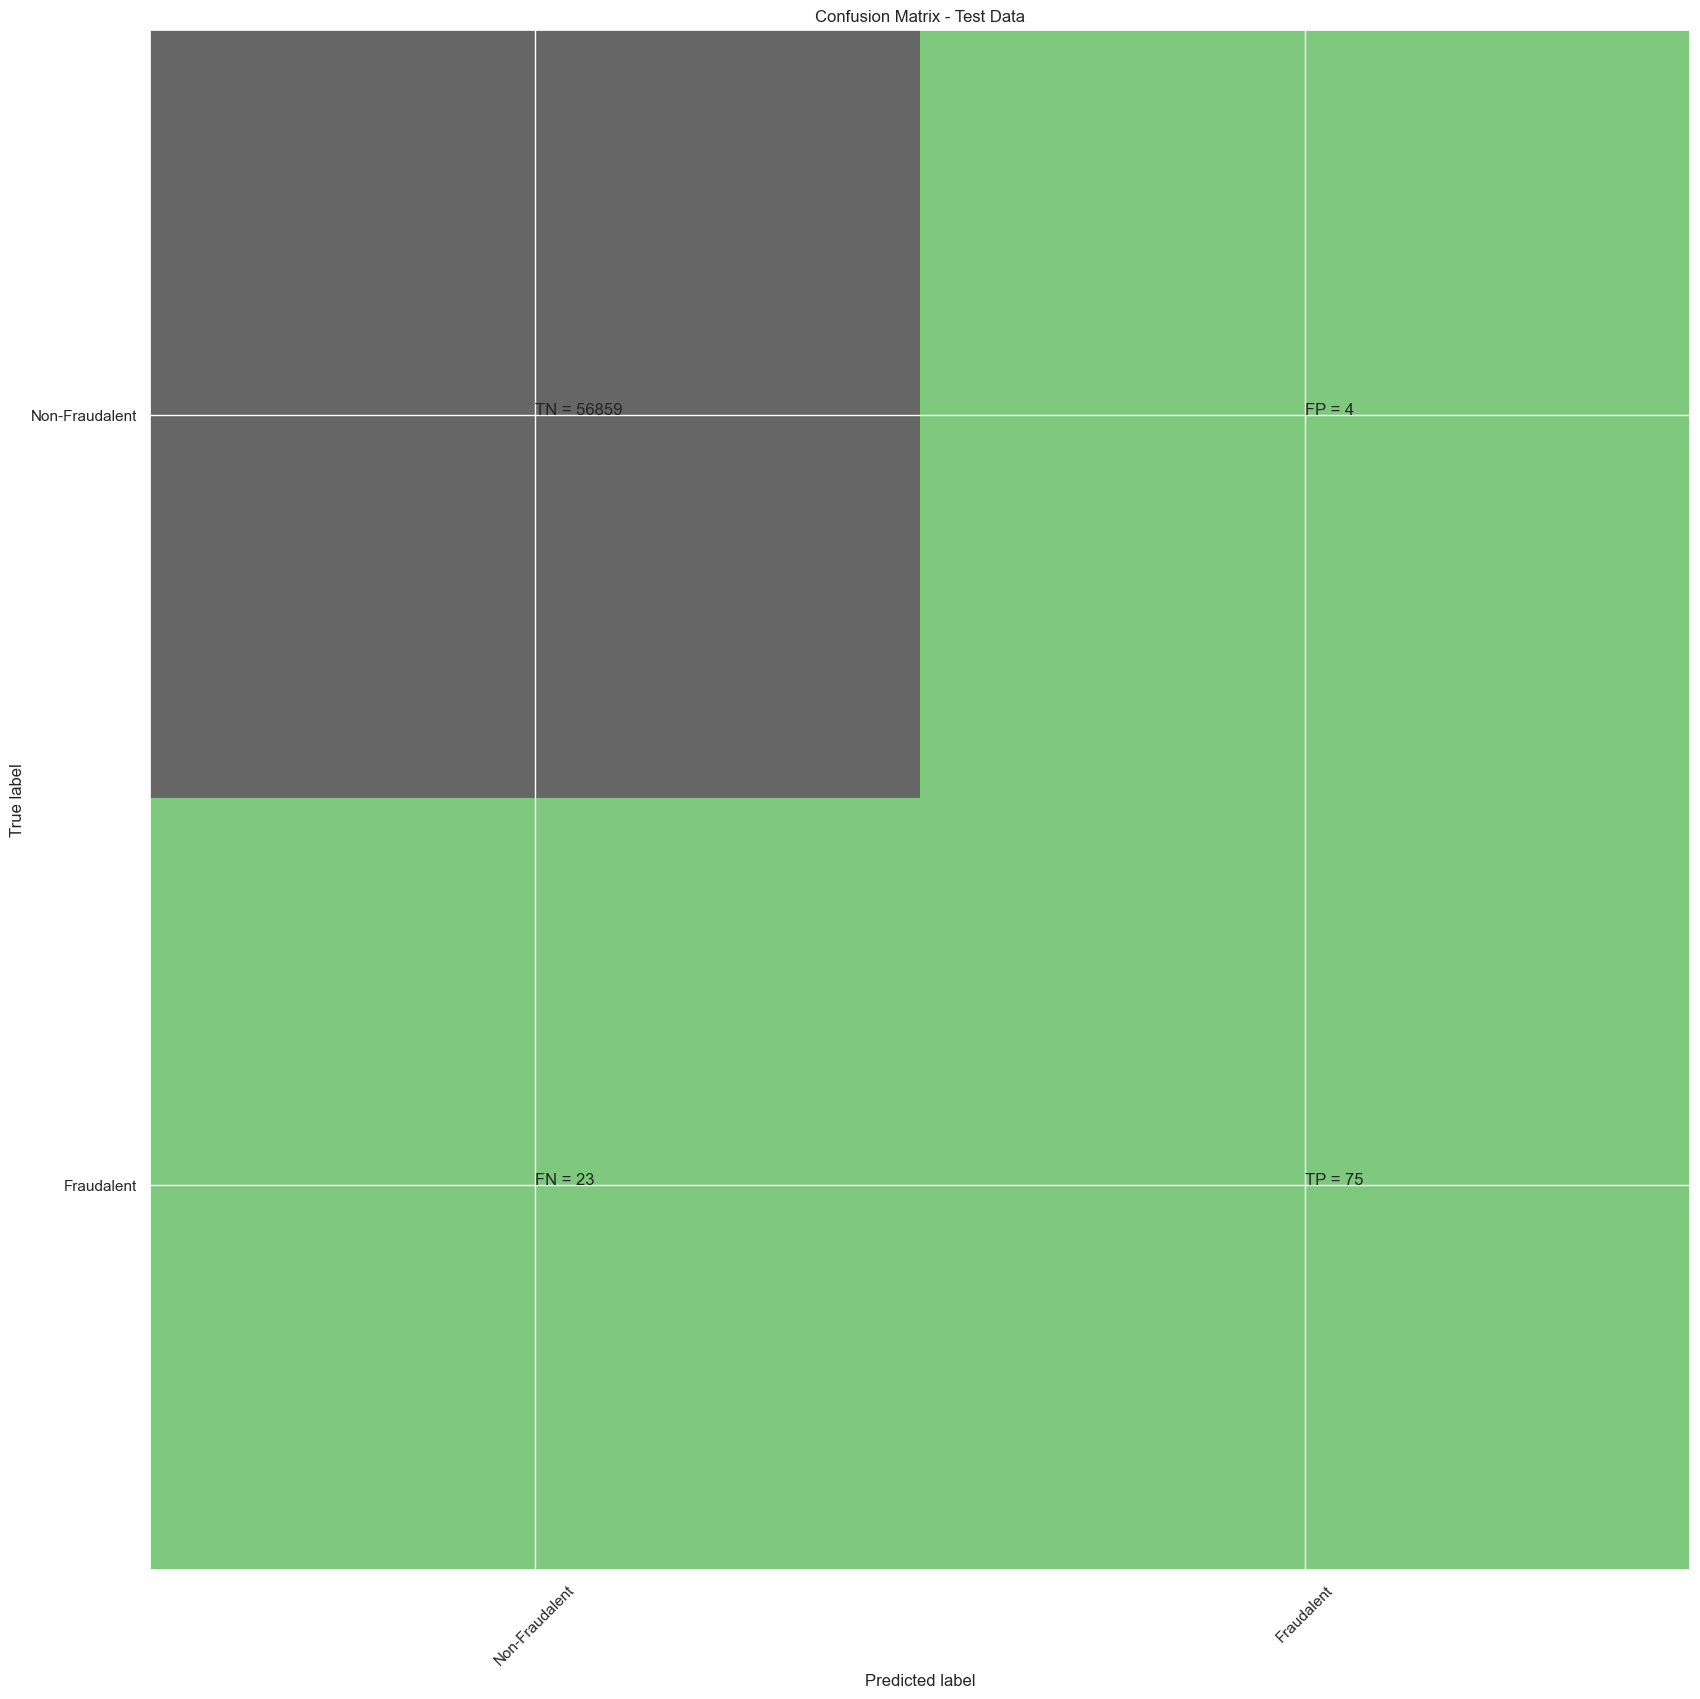

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


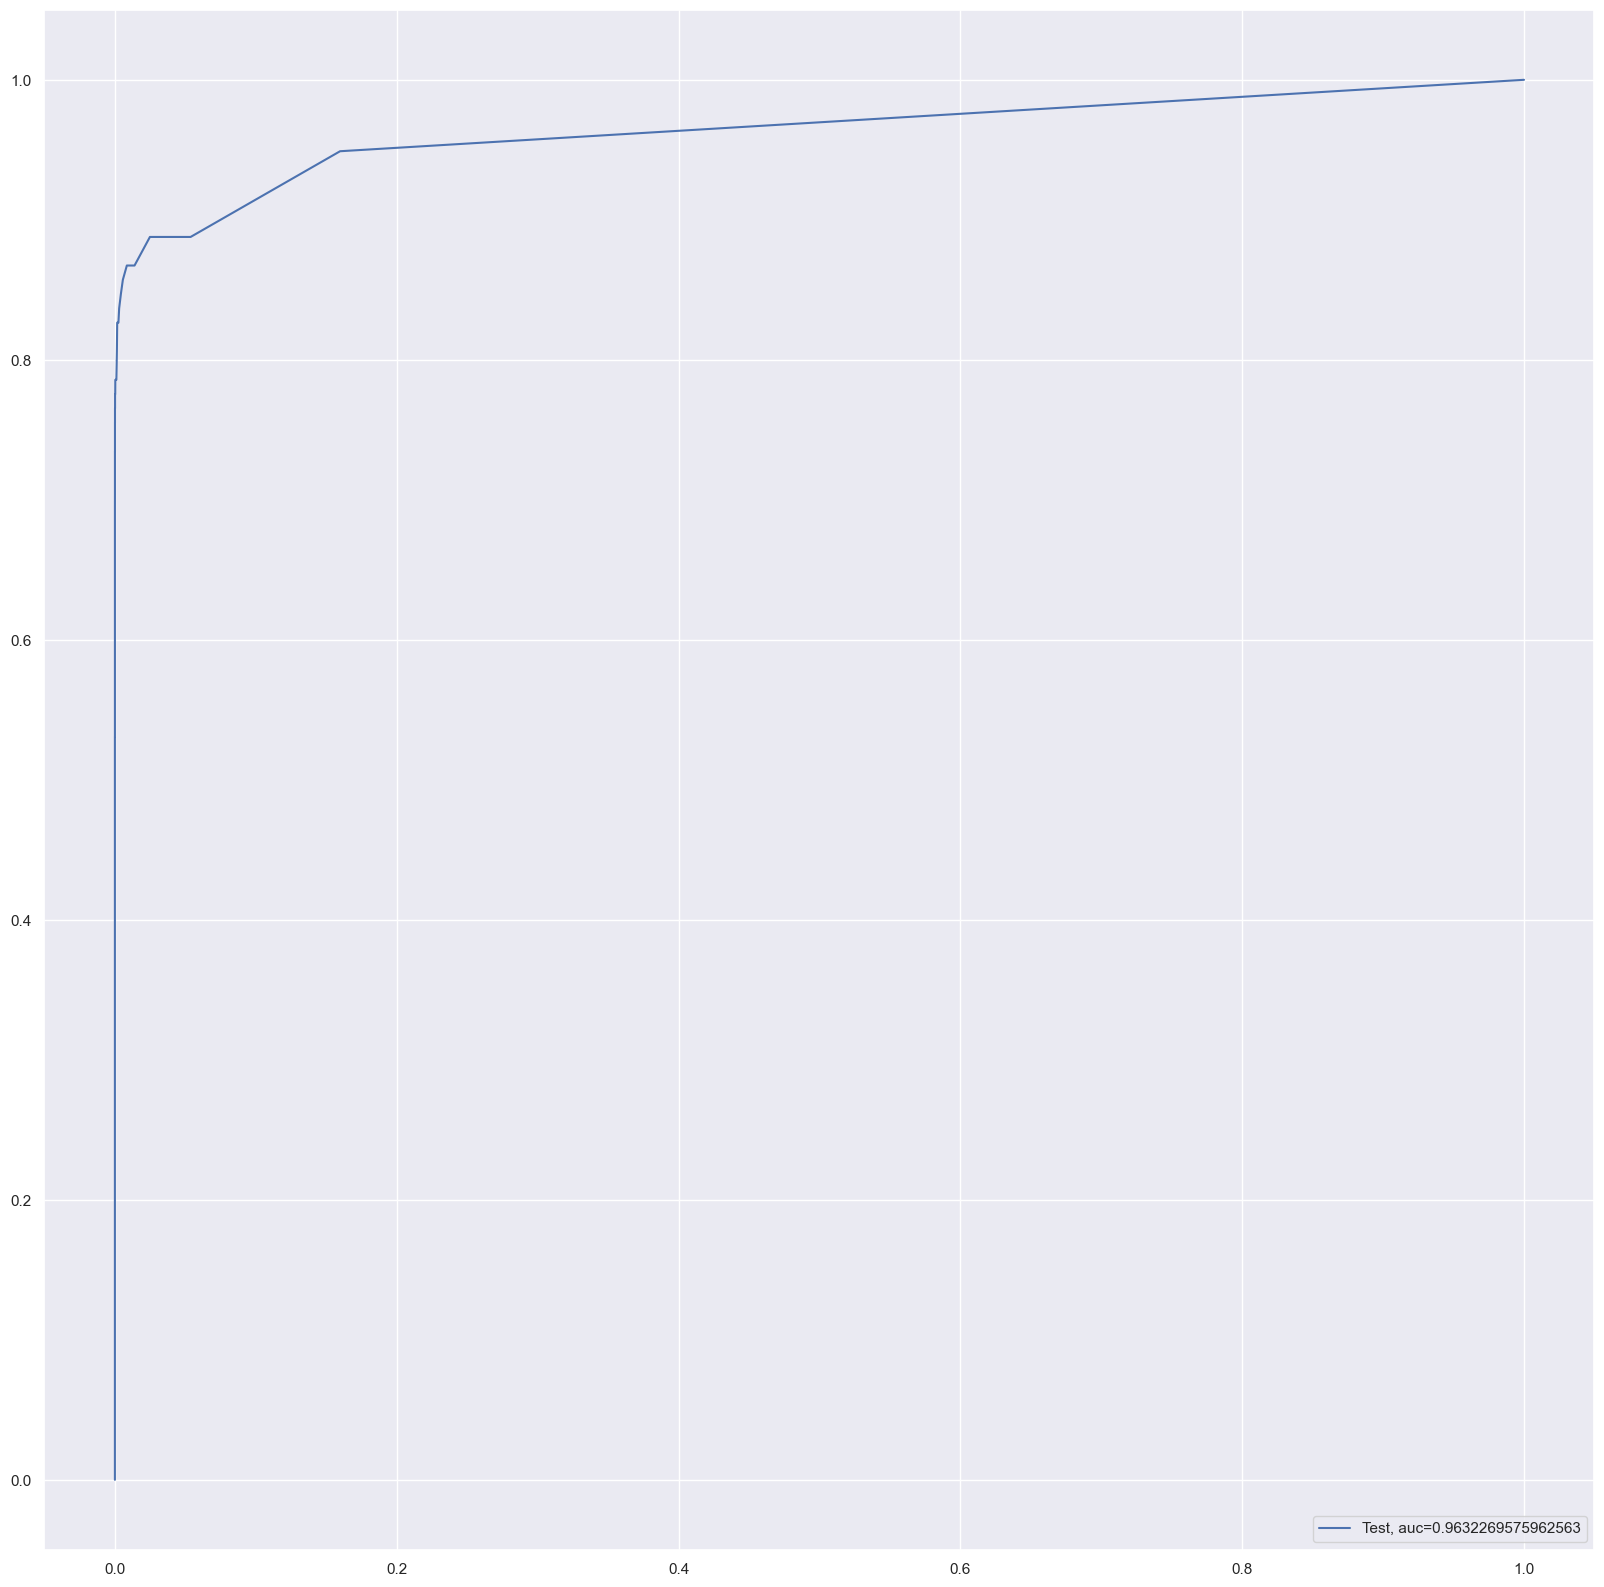

Time Taken by Model: --- 815.7234823703766 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999350432752234
Confusion Matrix


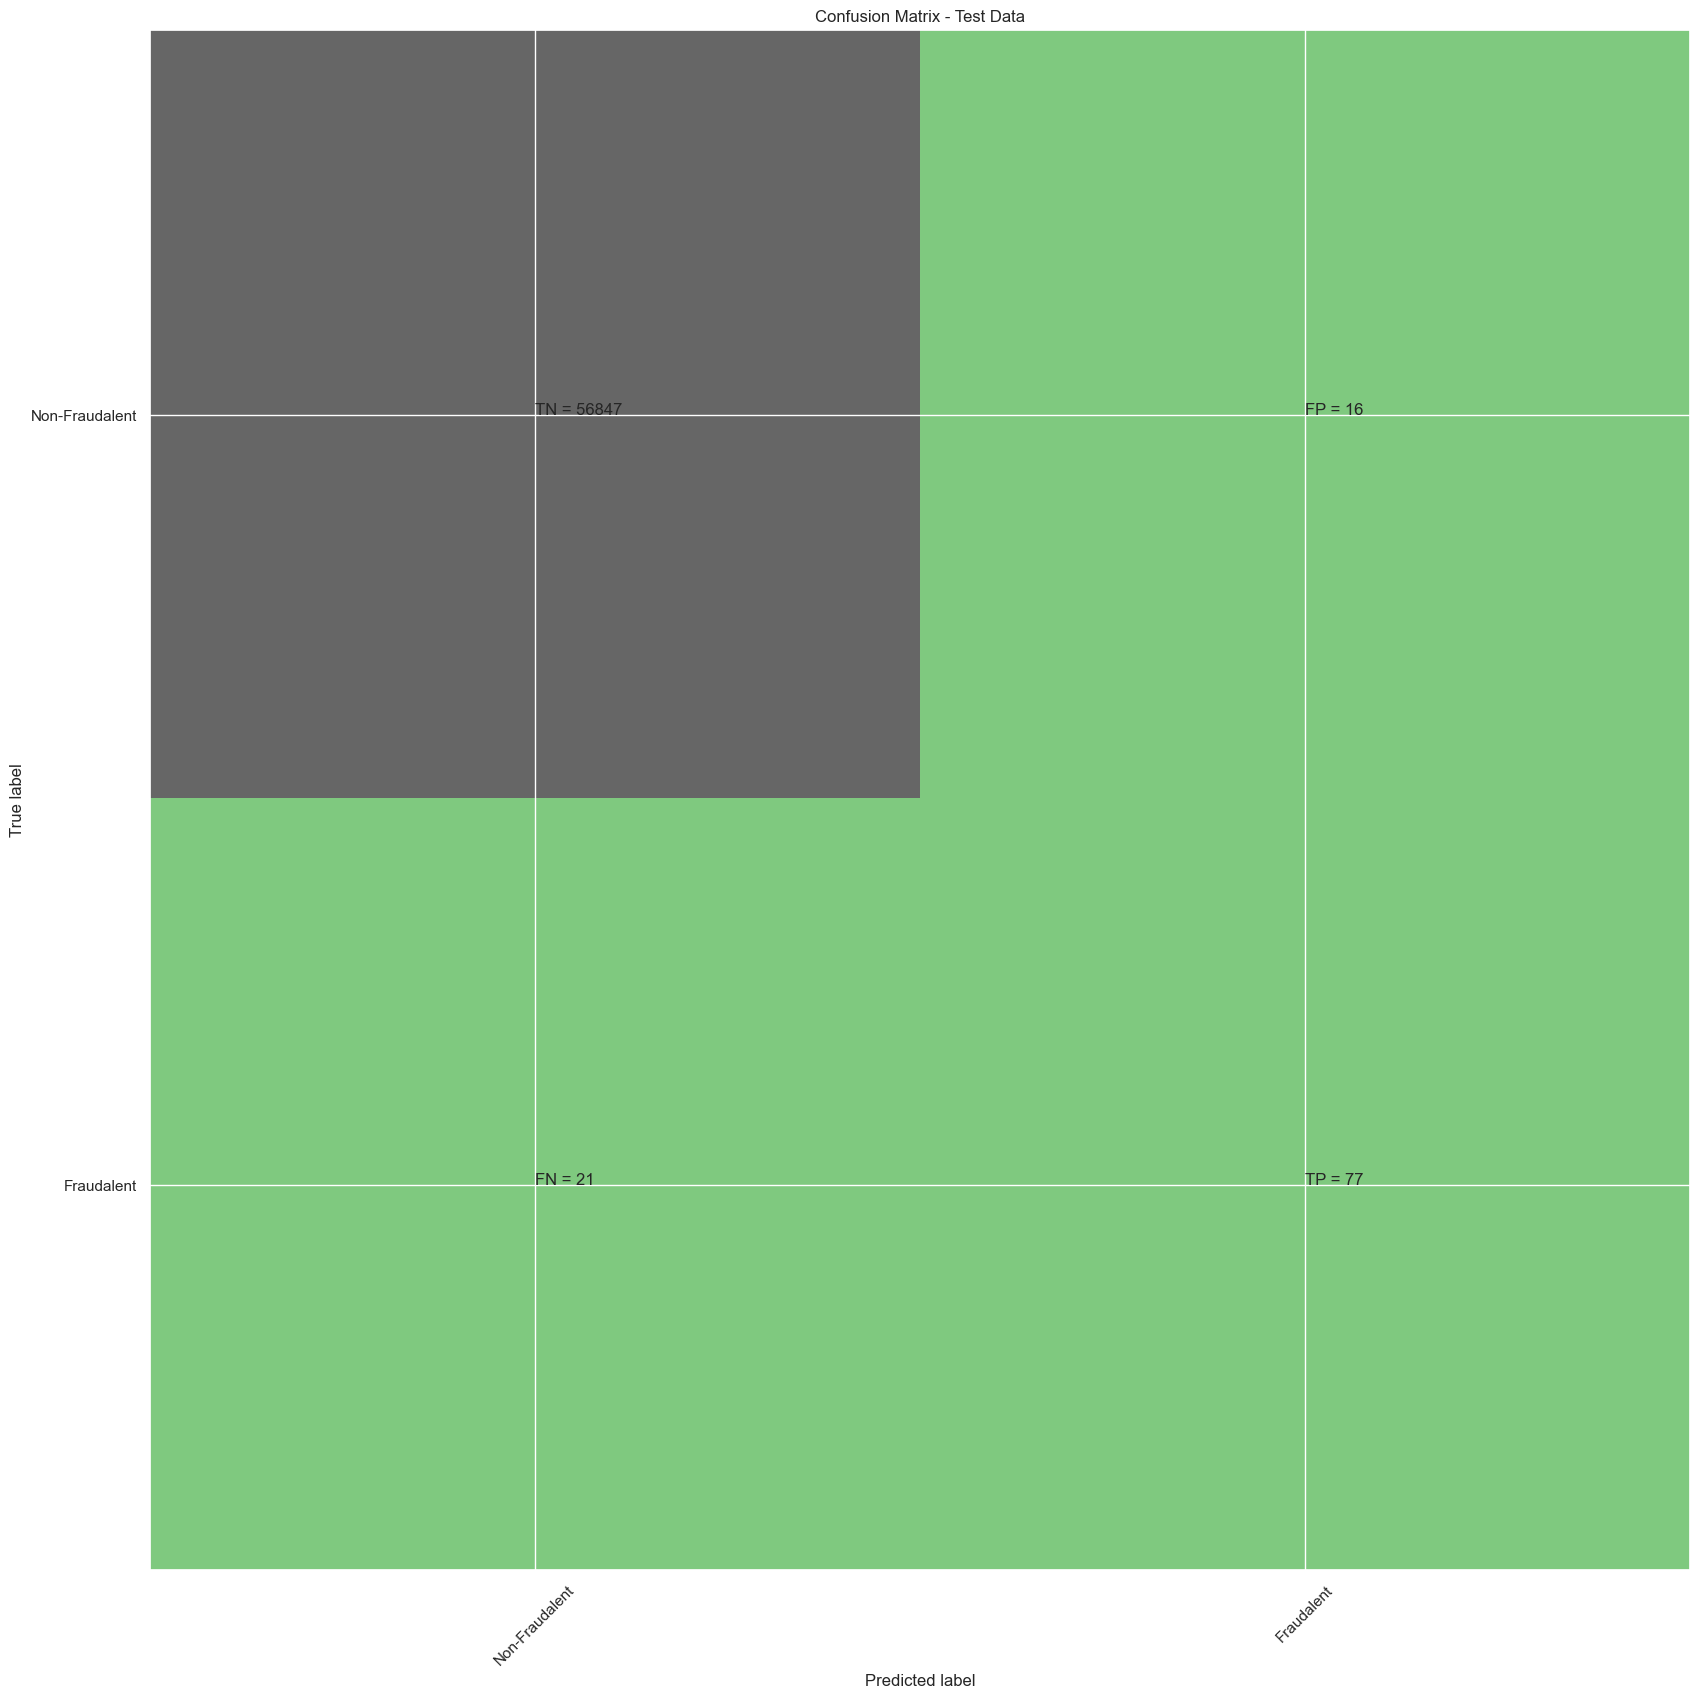

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.79      0.81        98

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9696561230052754
XGBoost threshold: 0.00012316476204432547
ROC for the test dataset 97.0%


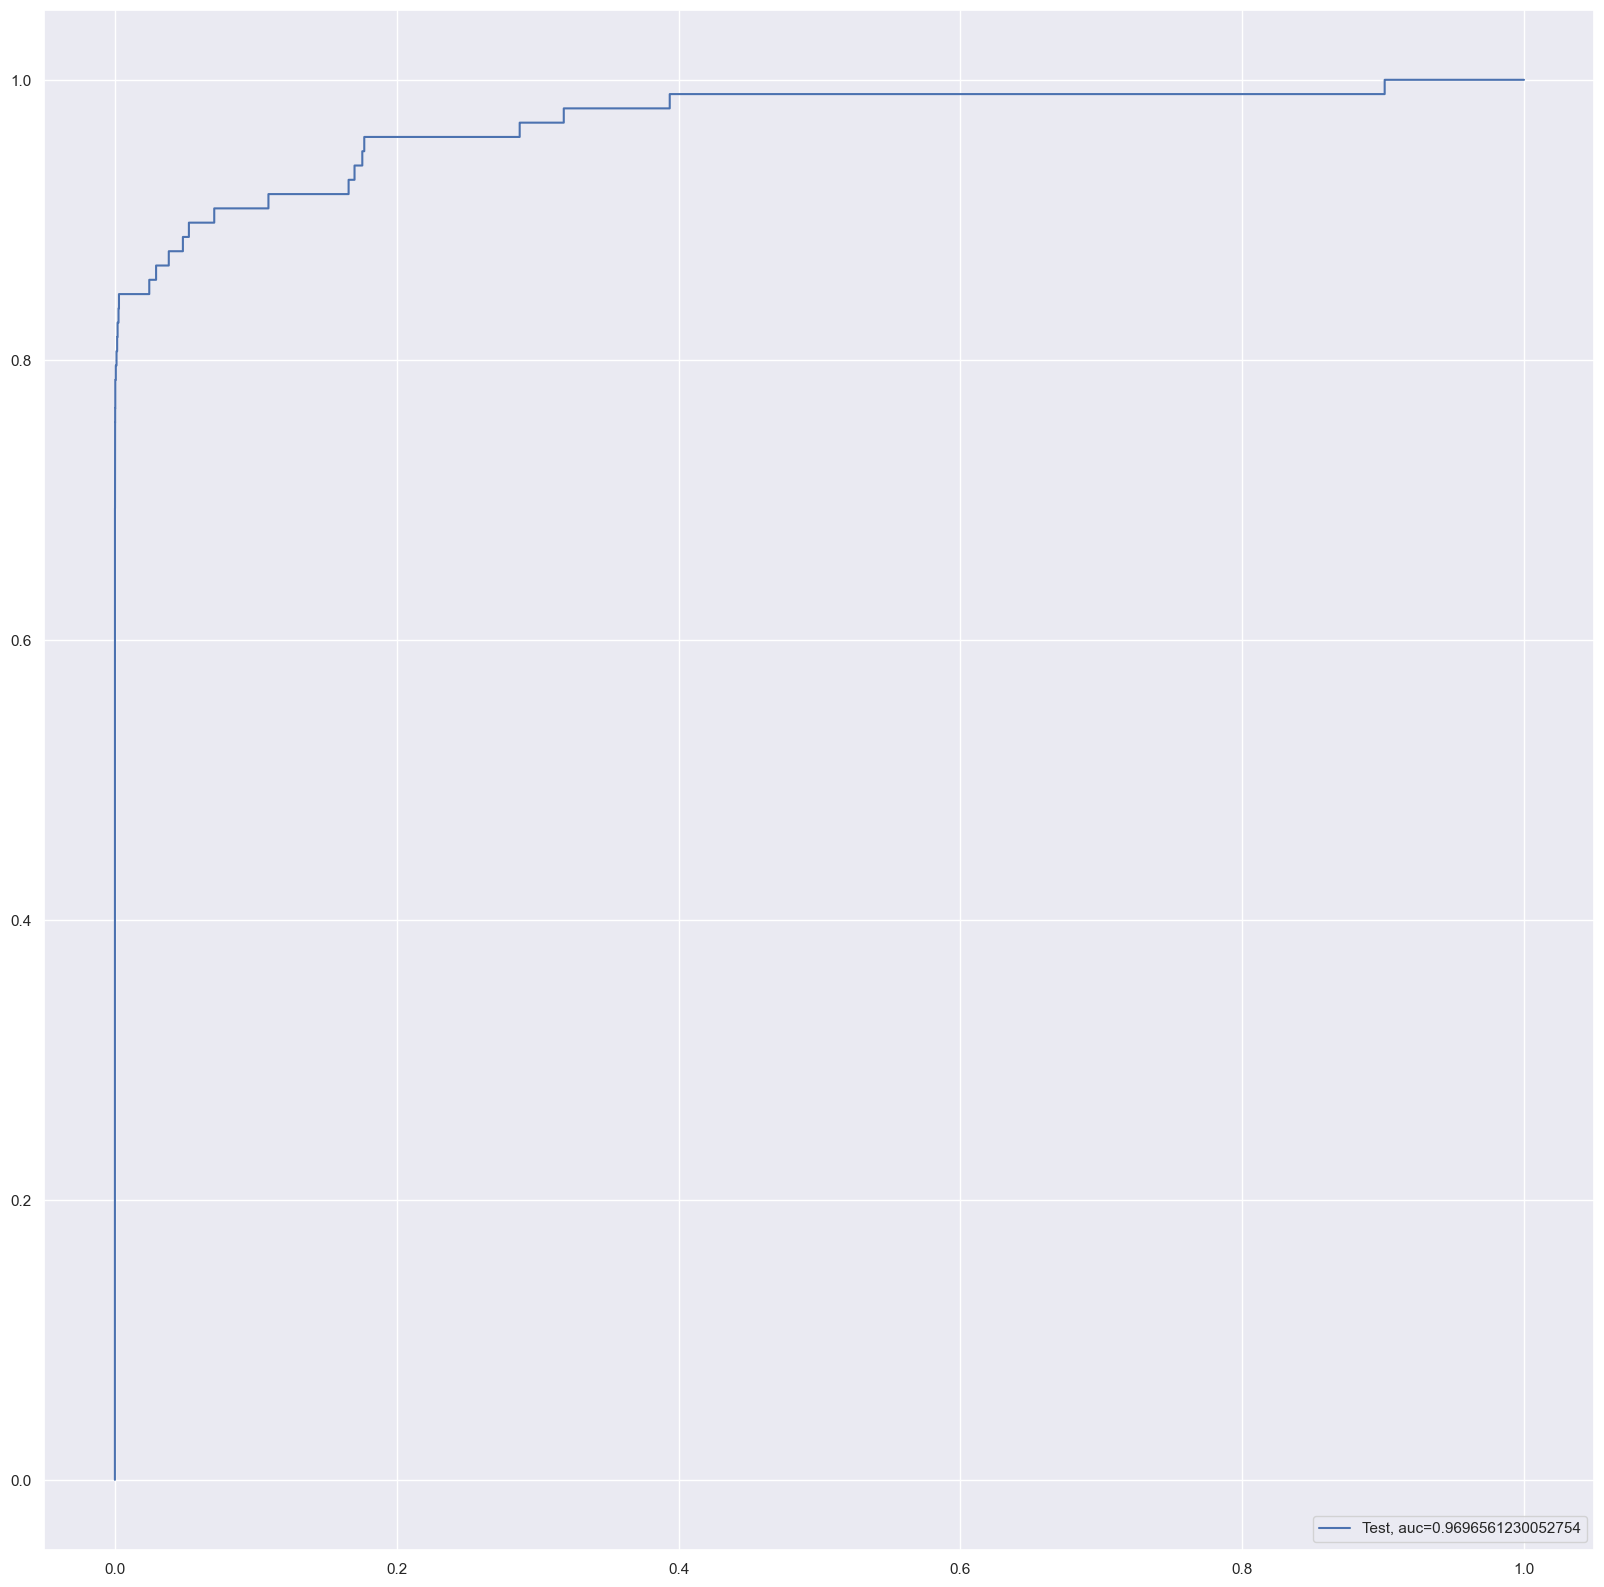

Time Taken by Model: --- 8.552134037017822 seconds ---
--------------------------------------------------------------------------------


In [121]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [122]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    
46  ADASYN Oversampling with StratifiedKFold CV    
47  ADASYN Oversampling with StratifiedKFold CV    
48  ADASYN Oversampling with StratifiedKFold CV    
49  ADASYN Oversampling with StratifiedKFold CV    
50  ADASYN Oversampling with StratifiedKFold CV    
51  ADASYN Oversampling with StratifiedKFold CV    
52  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998315   0.500000   
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   
2                                          KNN  0.999298   0.900851   
3                Tree Model with gini criteria  0.998806   0.859015   
4             Tree Model with entropy criteria  0.999052   0.864337   
5                                Random Forest  0.999350   0.940564   
6                                      XGBoost  0.999386   0.977586   
7                                          SVM  0.998560   0.891340   
8   Logistic Regression with L2 Regularisation  0.998315   0.577543   
9   Logistic Regression with L1 Regularisation  0.999017   0.867717   
10                                         KNN  0.999175   0.848727   
11               Tree Model with gini criteria  0.999175   0.885197   
12            Tree Model with entropy criteria  0.999157   0.879989   
13                               Random Forest  0.999491   0.940880   
14                                     XGBoost  0.999526   0.968051   
15                                         SVM  0.997384   0.698112   
16  Logi

## Results for ADASYN  Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


#Parameter Tuning for Final Model by Handling class imbalance

In [126]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999490879724724
XGboost roc_value: 0.9794200130855149
XGBoost threshold: 4.0624126995680854e-05


In [127]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [128]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([11.10554228, 10.03232975, 11.52248025, 13.14254627, 13.25359282,
         12.82446508, 16.05302806, 15.92486768, 15.32263083, 15.4998354 ,
         14.88017893, 13.83729424]),
  'std_fit_time': array([0.75788078, 0.42275697, 0.913743  , 0.21203803, 0.07478665,
         0.59334321, 1.26363701, 0.56078566, 0.80694491, 1.15420728,
         0.6441509 , 0.60057633]),
  'mean_score_time': array([0.04065852, 0.03469381, 0.02793913, 0.07207255, 0.03501649,
         0.03237848, 0.03798909, 0.0301867 , 0.02933297, 0.02551193,
         0.02533307, 0.02349544]),
  'std_score_time': array([0.00992166, 0.00302206, 0.00320766, 0.02401786, 0.0081083 ,
         0.00950794, 0.00787209, 0.00464151, 0.00471747, 0.00618925,
         0.0069351 , 0.00310342]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [129]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 8.15844274,  8.93906169, 12.26183624, 13.09027033, 12.38313541]),
  'std_fit_time': array([0.06690984, 0.60614304, 1.85593029, 2.38316668, 1.02692936]),
  'mean_score_time': array([0.03037248, 0.02541766, 0.04351745, 0.03186879, 0.02826161]),
  'std_score_time': array([0.0098014 , 0.00467836, 0.02799184, 0.00368406, 0.00556115]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score': array([nan, nan, n

In [130]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([10.20952215,  9.44482756, 10.13232665, 11.09872646, 11.64623442,
         12.65776772, 11.73553557, 13.45956593, 11.58661227, 11.86942925,
         12.65157852, 12.2685277 , 13.37747164, 13.31305089, 12.59761276,
         10.50958772, 11.07964191, 12.27297215, 11.78822417, 12.37231231,
         13.16910229, 11.66869402, 12.49641128, 13.14132886, 12.18443308,
         13.06731353, 13.14661555]),
  'std_fit_time': array([0.6230752 , 0.04849412, 0.25053578, 0.93499448, 1.1253537 ,
         0.93656825, 0.78525174, 0.2779592 , 0.24499915, 0.59822879,
         0.5065972 , 0.21191863, 0.43136275, 1.01594968, 0.43491348,
         0.10766808, 0.16356183, 0.33536648, 0.14068988, 0.11329996,
         0.09611933, 0.1147113 , 0.14687993, 0.21906238, 0.55275652,
         0.59802616, 0.64231478]),
  'mean_score_time': array([0.03969765, 0.03098974, 0.02647009, 0.02690744, 0.04019098,
         0.03997412, 0.03451667, 0.04031334, 0.03248258, 0.0298934 ,
         0.02947907, 0.

In [131]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([12.03924713, 11.93019457, 11.84016528, 11.92149391, 13.12203197]),
  'std_fit_time': array([0.17349657, 0.20054915, 0.14256104, 0.11848455, 1.41824626]),
  'mean_score_time': array([0.0338963 , 0.02863159, 0.02983236, 0.0287272 , 0.03058786]),
  'std_score_time': array([0.005272  , 0.00580583, 0.0112776 , 0.006561  , 0.0060871 ]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score': 

In [132]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([12.06482105, 12.32091975, 13.90223155, 14.69822812, 13.60938573]),
  'std_fit_time': array([0.20648188, 0.37545819, 1.01410137, 0.10285296, 1.02217446]),
  'mean_score_time': array([0.0334352 , 0.03192592, 0.03135576, 0.02964559, 0.0292861 ]),
  'std_score_time': array([0.00267649, 0.00586015, 0.004474  , 0.0038632 , 0.00604861]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score': array([nan, nan, nan, nan, nan]),
  'std_test_score': ar

In [133]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
# Initialize the XGBClassifier without 'missing' and 'silent' parameters

XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994031003669177
XGboost roc_value: 0.9843326441246002
XGBoost threshold: 0.0010593603365123272


In [134]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([16.40250068, 16.84667854, 18.04722505, 18.5778192 , 18.59645724,
         18.15578384, 18.01784306, 18.00958452, 17.29563661]),
  'std_fit_time': array([0.07250536, 0.87224261, 0.37216271, 0.04984064, 0.18182801,
         0.2220627 , 0.13381033, 0.22565295, 1.52401067]),
  'mean_score_time': array([0.03118   , 0.02674994, 0.03567233, 0.03506565, 0.03232899,
         0.02757454, 0.03074088, 0.03601055, 0.02704306]),
  'std_score_time': array([0.00812559, 0.00428322, 0.00582223, 0.00522902, 0.00562442,
         0.00231876, 0.0027502 , 0.00510776, 0.00355849]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False, 

In [135]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993855444953564
XGboost roc_value: 0.9837495204191097
XGBoost threshold: 0.0022170457523316145


**As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [137]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4,  n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994031003669177
XGboost roc_value: 0.9843326441246002
XGBoost threshold: 0.0010593603365123272


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


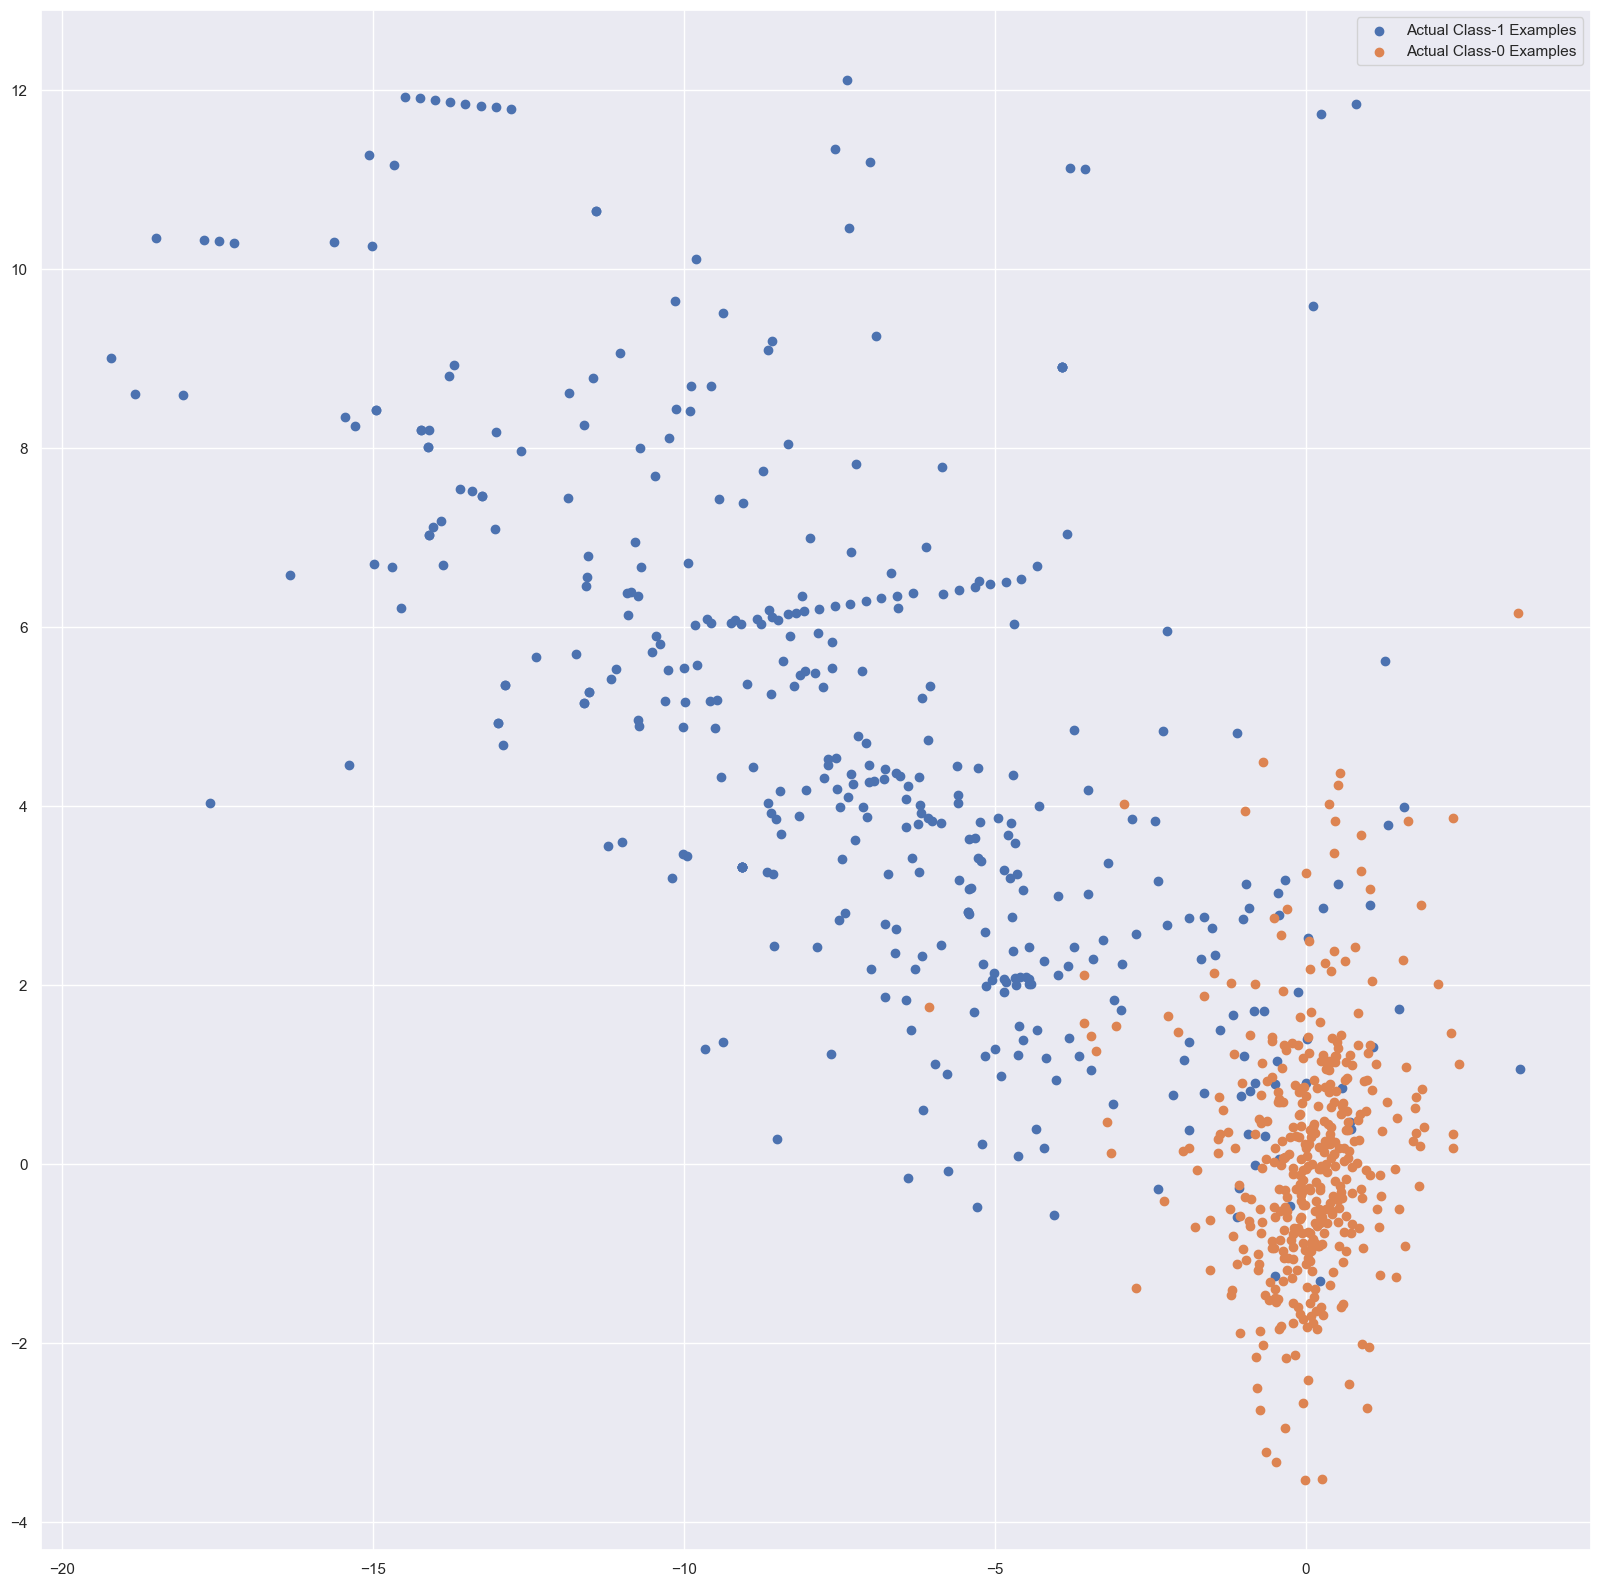

In [139]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [140]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [141]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9843326441246002
XGBoost threshold: 0.0010593603365123272


## Model Selection:
## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Undersampling and Random Oversampling with StratifiedKFold CVV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 

####Model
Model Accuracy: 0.999490879724724

XGboost roc_value: 0.979420013085514

XGBoost threshold: 0.000041
4272

### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.



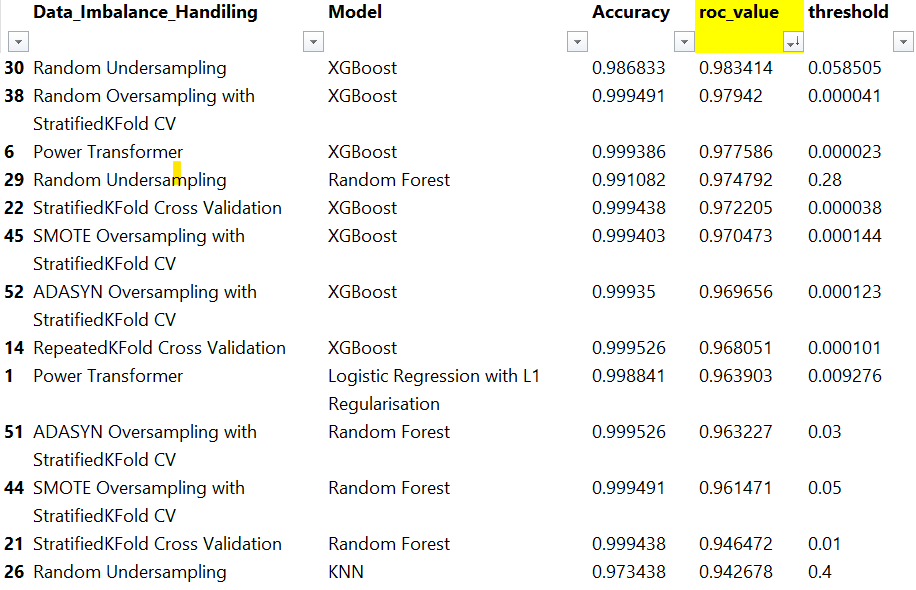